<img align="centre" width="300" height="300" src="AnguilVanier_Alejandra_DA201_Assignment_Logo NHS.png">


<h1><center>NHS Diagnostic Analysis</center></h1>

## BACKGROUND AND CONTEXT 

The National Health Services (NHS), a publicly funded healthcare system in England, incurs in significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood.
Reducing or eliminating missed appointments would be beneficial financially as well as socially. At this stage of the project the two main questions posed by the NHS are:
-	Has there been adequate staff and capacity in the networks?
-	What was the actual utilisation of resources?

dAtaAnalysisAV has been asked to look into the information about scheduled activity and usage of general practice (GP) appointments within primary care that NHS Digital produces monthly (containing information about the previous 30 months, where available), to help inform the government how best to handle this problem. 

This Notebook is the collection of all Python codes applied to uncover trends and patterns on the datasets provided by NHS:
- actual_duration (ad)
- appointments_regional (ar)
- national_categories (nc)
- tweets

#### Please follow the link below to the GitHub repository where this Jypiter Notebook, the Executive Summary and the Presentation are stored, along with all the supporting files:

#### [Alejandra Anguil Vanier GitHub repository](https://github.com/AlejandraAnguilVanier/AnguilVanier_Alejandra_DA201_Assignment)

<img align="right" width="250" height="250" src="AnguilVanier_Alejandra_DA201_Assignment_Logo AAV.png">

# 

## ANALYTICAL APPROACH

## 1. Data Ingestion

### Prepare the workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Import the datasets 

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('AnguilVanier_Alejandra_DA201_Assignment_files/actual_duration.csv') 

# View the DataFrame.
ad

sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and North Cumbria ICB - 00L    E54000050   
4       NHS North East and North Cumbria ICB - 00L    E54000050   
...                                            ...          ...   
137788              NHS West Yorkshire ICB - X2C4Y    E54000054   
137789              NHS West Yorkshire ICB - X2C4Y    E54000054   
137790              NHS West Yorkshire ICB - X2C4Y    E54000054   
137791              NHS West Yorkshire ICB - X2C4Y    E54000054   
137792              NHS West Yorkshire ICB - X2C4Y    E54000054   

       region_ons_code appointment_date         actual_duration  \
0            E40000012        01-Dec-21           31-60 Minutes   
1            E40000012        01-Dec-21           21-30 Minutes   
2            E40000012        01-Dec-21            6-10 Minutes   
3            E40000012        01-Dec-21  Unknown / Data Quality   
4            E40000012        01-Dec-21           16-20 Minutes   
...                ...              ...                     ...   
137788       E40000012        30-Jun-22           31-60 Minutes   
137789       E40000012        30-Jun-22           21-30 Minutes   
137790       E40000012        30-Jun-22           16-20 Minutes   
137791       E40000012        30-Jun-22           11-15 Minutes   
137792       E40000012        30-Jun-22             1-5 Minutes   

        count_of_appointments  
0                         364  
1                         619  
2                        1698  
3                        1277  
4                         730  
...                       ...  
137788                    430  
137789                    751  
137790                    921  
137791                   1439  
137792                   1739  

[137793 rows x 8 columns]

In [3]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('AnguilVanier_Alejandra_DA201_Assignment_files/appointments_regional.csv')

# View the DataFrame.
ar

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
0                        8107  
1                        6791  
2                       20686  
3                        4268  
4                       11971  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[596821 rows x 7 columns]

In [4]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('AnguilVanier_Alejandra_DA201_Assignment_files/national_categories.xlsx')

# View the DataFrame.
nc

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

> We can see all the datasets have the same number of columns and rows as per the raw data, therefore we can continue with this exercise. 

## 2. Descriptive Statistical Analysis 

### Actual Duration (ad) dataset

In [5]:
# Determine whether there are missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [6]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# Determine the descriptive statistics of the data set.
ad.describe().round(2)

count_of_appointments
count              137793.00
mean                 1219.08
std                  1546.90
min                     1.00
25%                   194.00
50%                   696.00
75%                  1621.00
max                 15400.00

### Appointments Regional (ar) dataset

In [8]:
# Determine whether there are missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [9]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the descriptive statistics of the data set.
ar.describe().round(2)

count_of_appointments
count              596821.00
mean                 1244.60
std                  5856.89
min                     1.00
25%                     7.00
50%                    47.00
75%                   308.00
max                211265.00

### National Categories (nc) dataset

In [11]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [12]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
nc.describe().round(2)

count_of_appointments
count              817394.00
mean                  362.18
std                  1084.58
min                     1.00
25%                     7.00
50%                    25.00
75%                   128.00
max                 16590.00

> From this preliminary description of the data, we can already extract a few characteristics:
> - There are no missing values, however lots of them have an "Unknown" or "Unmapping" value, which we will need to explore further.
> - There is only one column as integer on each dataset, the count of appointments. 
> - Not all the date columns have the correct data type applied and we will need to correct this.

## 3. Data Wrangling 

### 3a. Identify which columns are not needed for this analysis and which columns we would like to add

- We will proceed to remove sub_icb_location_code, sub_icb_location_ons_code and region_ons_code columns from ad as we don't need all these codes.
- We will add the Commissioning Region Names to all three datasets, which could give us a better understanding of possible trens by the NHS regions in England. Information found on the NHS website https://cms.nhsbsa.nhs.uk/sicbls-icbs-and-other-providers/organisation-and-prescriber-changes/icbs. We have performed some data wrangling to the raw file in Excel to be able to link it to our data sets (remove unwanted columns, change the column name to sub_icb_location_name so the unique identifier has the same name and uncapitalize the Sub ICB Location Names). The cleaned file has been added to this pack of information, under the name "Website Names Lookup_cleaned". 
- We will add appointment month to the ad dataset.
- We will add weekday names to the ad and nc datasets.

In [14]:
# Drop the unwanted columns from ad and sense-check the updated dataframe.
ad = ad.drop(['sub_icb_location_code', 'sub_icb_location_ons_code', 'region_ons_code'], axis=1)
ad.head()

sub_icb_location_name icb_ons_code appointment_date  \
0  NHS North East and North Cumbria ICB - 00L    E54000050        01-Dec-21   
1  NHS North East and North Cumbria ICB - 00L    E54000050        01-Dec-21   
2  NHS North East and North Cumbria ICB - 00L    E54000050        01-Dec-21   
3  NHS North East and North Cumbria ICB - 00L    E54000050        01-Dec-21   
4  NHS North East and North Cumbria ICB - 00L    E54000050        01-Dec-21   

          actual_duration  count_of_appointments  
0           31-60 Minutes                    364  
1           21-30 Minutes                    619  
2            6-10 Minutes                   1698  
3  Unknown / Data Quality                   1277  
4           16-20 Minutes                    730

In [15]:
# Import and sense-check the cleaned file with the name of the regions as per NHS description. Descriptive name: region_names.
region_names = pd.read_excel('AnguilVanier_Alejandra_DA201_Assignment_files/Website Names Lookup_cleaned.xlsx')
region_names

sub_icb_location_name  \
0    NHS Bath and North East Somerset Swindon and W...   
1    NHS Bedfordshire Luton and Milton Keynes ICB -...   
2                NHS Birmingham and Solihull ICB - 15E   
3                        NHS Black Country ICB - D2P2L   
4    NHS Bristol North Somerset and South Glouceste...   
..                                                 ...   
101                       NHS West Yorkshire ICB - 02T   
102                       NHS West Yorkshire ICB - 03R   
103                       NHS West Yorkshire ICB - 15F   
104                       NHS West Yorkshire ICB - 36J   
105                     NHS West Yorkshire ICB - X2C4Y   

                                       Region Name  
0                  SOUTH WEST COMMISSIONING REGION  
1             EAST OF ENGLAND COMMISSIONING REGION  
2                    MIDLANDS COMMISSIONING REGION  
3                    MIDLANDS COMMISSIONING REGION  
4                  SOUTH WEST COMMISSIONING REGION  
..                                             ...  
101  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
102  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
103  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
104  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
105  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  

[106 rows x 2 columns]

In [16]:
# Link the region names into the ad dataset and sense-check the updated dataframe.
ad = pd.merge(ad, region_names, how='left', on='sub_icb_location_name')
ad

sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and North Cumbria ICB - 00L    E54000050   
4       NHS North East and North Cumbria ICB - 00L    E54000050   
...                                            ...          ...   
137788              NHS West Yorkshire ICB - X2C4Y    E54000054   
137789              NHS West Yorkshire ICB - X2C4Y    E54000054   
137790              NHS West Yorkshire ICB - X2C4Y    E54000054   
137791              NHS West Yorkshire ICB - X2C4Y    E54000054   
137792              NHS West Yorkshire ICB - X2C4Y    E54000054   

       appointment_date         actual_duration  count_of_appointments  \
0             01-Dec-21           31-60 Minutes                    364   
1             01-Dec-21           21-30 Minutes                    619   
2             01-Dec-21            6-10 Minutes                   1698   
3             01-Dec-21  Unknown / Data Quality                   1277   
4             01-Dec-21           16-20 Minutes                    730   
...                 ...                     ...                    ...   
137788        30-Jun-22           31-60 Minutes                    430   
137789        30-Jun-22           21-30 Minutes                    751   
137790        30-Jun-22           16-20 Minutes                    921   
137791        30-Jun-22           11-15 Minutes                   1439   
137792        30-Jun-22             1-5 Minutes                   1739   

                                          Region Name  
0       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
1       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
2       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
3       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
4       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
...                                               ...  
137788  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
137789  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
137790  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
137791  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
137792  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  

[137793 rows x 6 columns]

In [17]:
# Link the region names into the nc dataset and sense-check the updated dataframe.
nc = pd.merge(nc, region_names, how='left', on='sub_icb_location_name')
nc

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  \
0                           3           2021-08   
1                           7           2021-08   
2                          79           2021-08   
3                         725           2021-08   
4                           2           2021-08   
...                       ...               ...   
817389                     12           2022-06   
817390                      4           2022-06   
817391                     92           2022-06   
817392                      4           2022-06   
817393                     19           2022-06   

                                          Region Name  
0       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
1       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
2       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
3       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
4       NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
...                                               ...  
817389  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
817390  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
817391  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
817392  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
817393  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  

[817394 rows x 9 columns]

#### To be able to do this operation on the ar dataset, which doesn't have the sub_icb_location_name column, we will extract the necessary columns from the ns dataset and merge them.

In [18]:
# Create a temporary dataframe with the required columns.
nc_temp = nc[['icb_ons_code', 'Region Name', 'service_setting']]

# Group it by the required columns.
nc_temp = nc_temp.groupby([nc_temp['icb_ons_code'], nc_temp['Region Name']])\
[['service_setting']].count().reset_index()

# Merge it with the ar dataset.
ar = pd.merge(ar, nc_temp, how='left', on='icb_ons_code')

# Drop unwanted columns.
ar = ar.drop(['service_setting'], axis=1)

# Sense-check the updated dataframe
ar

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments                                    Region Name  
0                        8107                SOUTH EAST COMMISSIONING REGION  
1                        6791                SOUTH EAST COMMISSIONING REGION  
2                       20686                SOUTH EAST COMMISSIONING REGION  
3                        4268                SOUTH EAST COMMISSIONING REGION  
4                       11971                SOUTH EAST COMMISSIONING REGION  
...                       ...                                            ...  
596816                     21  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
596817                      8  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
596818                     28  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
596819                     17  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
596820                     10  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  

[596821 rows x 8 columns]

### 3c. Fix inconsistencies: data types on the date columns

In [19]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_name            object
icb_ons_code                     object
appointment_date         datetime64[ns]
actual_duration                  object
count_of_appointments             int64
Region Name                      object
dtype: object


sub_icb_location_name icb_ons_code appointment_date  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
1  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
2  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
3  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
4  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   

          actual_duration  count_of_appointments  \
0           31-60 Minutes                    364   
1           21-30 Minutes                    619   
2            6-10 Minutes                   1698   
3  Unknown / Data Quality                   1277   
4           16-20 Minutes                    730   

                                     Region Name  
0  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
1  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
2  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
3  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
4  NORTH EAST AND YORKSHIRE COMMISSIONING REGION

In [20]:
# We are going to add a column with the appointment month for future analysis.
ad['appointment_month'] = pd.to_datetime(ad['appointment_date']).dt.to_period('M')
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137793 entries, 0 to 137792
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   sub_icb_location_name  137793 non-null  object        
 1   icb_ons_code           137793 non-null  object        
 2   appointment_date       137793 non-null  datetime64[ns]
 3   actual_duration        137793 non-null  object        
 4   count_of_appointments  137793 non-null  int64         
 5   Region Name            137793 non-null  object        
 6   appointment_month      137793 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(4), period[M](1)
memory usage: 8.4+ MB


In [21]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
Region Name                      object
dtype: object


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month                                    Region Name  
0           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
1           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
2           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
3           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
4           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION

> The appointment_date in the nc dataframe was already in the correct format, but we include the code here to future proof that if someone changes the native file our calculations will still work.

#### We can already envisage that some studies on the busiest day of the week could be benefitial, therefore we are also going to add a weekday to both the ad and the nc datasets. We can't do it on the ar dataset as it doesn't contain this information. 

In [22]:
# Add the weekday column to the ad dataset.
ad['weekday'] = ad['appointment_date'].dt.strftime('%A')

# Check the output
ad.head()

sub_icb_location_name icb_ons_code appointment_date  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
1  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
2  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
3  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
4  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   

          actual_duration  count_of_appointments  \
0           31-60 Minutes                    364   
1           21-30 Minutes                    619   
2            6-10 Minutes                   1698   
3  Unknown / Data Quality                   1277   
4           16-20 Minutes                    730   

                                     Region Name appointment_month    weekday  
0  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
1  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
2  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
3  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
4  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday

In [23]:
# Add the weekday column to the nc dataset.
nc['weekday'] = nc['appointment_date'].dt.strftime('%A')

# Check the output
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month                                    Region Name weekday  
0           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
1           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
2           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
3           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
4           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday

### 3d. Identify and deal with outliers

#### Outliers in ad

In [24]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count_of_appointments'>

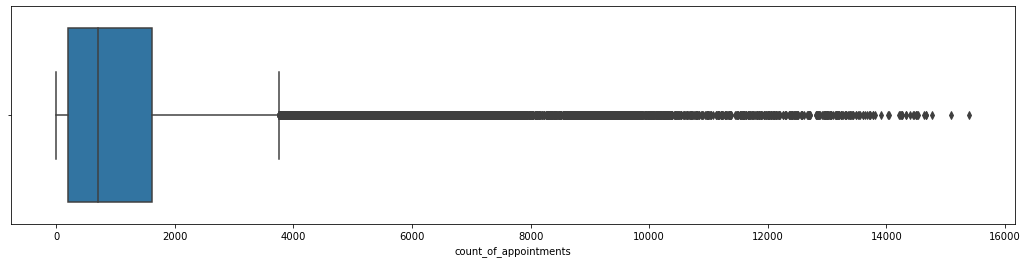

In [25]:
# Create a boxplot to check possible outliers in the data set
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=ad, x='count_of_appointments')

In [26]:
# Calculate quantiles and IQR.
ad_Q1 = ad['count_of_appointments'].quantile(0.25) 
ad_Q3 = ad['count_of_appointments'].quantile(0.75)
ad_IQR = ad_Q3 - ad_Q1
ad_IQR

1427.0

In [27]:
# Return a boolean array of the rows with (any) non-outlier column values.
ad_condition = ~((ad['count_of_appointments'] < (ad_Q1 - 1.5 * ad_IQR)) | (ad['count_of_appointments'] > (ad_Q3 + 1.5 * ad_IQR)))

# Filter DataFrame based on condition and sens-check the updated dataframe.
ad_non_outlier = ad[ad_condition]
ad_non_outlier.info()
ad_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128502 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   sub_icb_location_name  128502 non-null  object        
 1   icb_ons_code           128502 non-null  object        
 2   appointment_date       128502 non-null  datetime64[ns]
 3   actual_duration        128502 non-null  object        
 4   count_of_appointments  128502 non-null  int64         
 5   Region Name            128502 non-null  object        
 6   appointment_month      128502 non-null  period[M]     
 7   weekday                128502 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5), period[M](1)
memory usage: 8.8+ MB


sub_icb_location_name icb_ons_code appointment_date  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
1  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
2  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
3  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   
4  NHS North East and North Cumbria ICB - 00L    E54000050       2021-12-01   

          actual_duration  count_of_appointments  \
0           31-60 Minutes                    364   
1           21-30 Minutes                    619   
2            6-10 Minutes                   1698   
3  Unknown / Data Quality                   1277   
4           16-20 Minutes                    730   

                                     Region Name appointment_month    weekday  
0  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
1  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
2  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
3  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday  
4  NORTH EAST AND YORKSHIRE COMMISSIONING REGION           2021-12  Wednesday

<AxesSubplot:xlabel='count_of_appointments'>

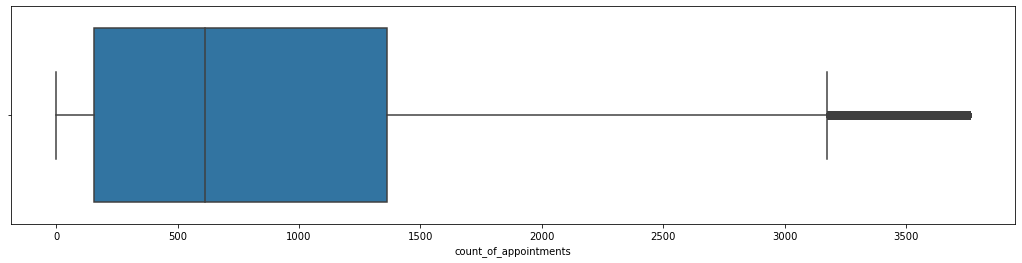

In [28]:
# Create a boxplot to check the updated data set without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=ad_non_outlier, x='count_of_appointments')

#### Outliers in ar

<AxesSubplot:xlabel='count_of_appointments'>

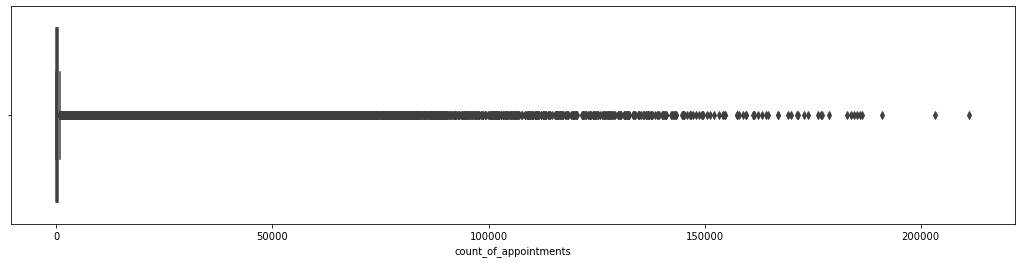

In [29]:
# Create a boxplot to check possible outliers in the data set
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=ar, x='count_of_appointments')

In [30]:
# Calculate quantiles and IQR.
ar_Q1 = ar['count_of_appointments'].quantile(0.25) 
ar_Q3 = ar['count_of_appointments'].quantile(0.75)
ar_IQR = ar_Q3 - ar_Q1
ar_IQR

301.0

In [31]:
# Return a boolean array of the rows with (any) non-outlier column values.
ar_condition = ~((ar['count_of_appointments'] < (ar_Q1 - 1.5 * ar_IQR)) | (ar['count_of_appointments'] > (ar_Q3 + 1.5 * ar_IQR)))

# Filter DataFrame based on condition.
ar_non_outlier = ar[ar_condition]
ar_non_outlier.info()
ar_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499473 entries, 7 to 596820
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       499473 non-null  object
 1   appointment_month                  499473 non-null  object
 2   appointment_status                 499473 non-null  object
 3   hcp_type                           499473 non-null  object
 4   appointment_mode                   499473 non-null  object
 5   time_between_book_and_appointment  499473 non-null  object
 6   count_of_appointments              499473 non-null  int64 
 7   Region Name                        499473 non-null  object
dtypes: int64(1), object(7)
memory usage: 34.3+ MB


icb_ons_code appointment_month appointment_status hcp_type  \
7     E54000034           2020-01           Attended       GP   
8     E54000034           2020-01           Attended       GP   
9     E54000034           2020-01           Attended       GP   
10    E54000034           2020-01           Attended       GP   
11    E54000034           2020-01           Attended       GP   

   appointment_mode time_between_book_and_appointment  count_of_appointments  \
7        Home Visit                             1 Day                    151   
8        Home Visit                    15  to 21 Days                     12   
9        Home Visit                       2 to 7 Days                    141   
10       Home Visit                    22  to 28 Days                      4   
11       Home Visit                     8  to 14 Days                     16   

                        Region Name  
7   SOUTH EAST COMMISSIONING REGION  
8   SOUTH EAST COMMISSIONING REGION  
9   SOUTH EAST COMMISSIONING REGION  
10  SOUTH EAST COMMISSIONING REGION  
11  SOUTH EAST COMMISSIONING REGION

<AxesSubplot:xlabel='count_of_appointments'>

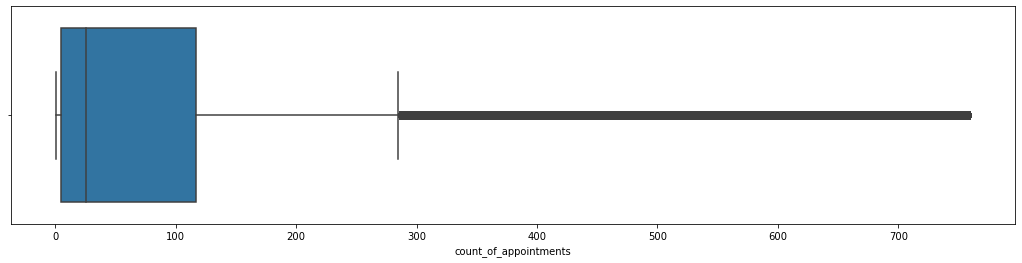

In [32]:
# Create a boxplot to check the updated data set without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=ar_non_outlier, x='count_of_appointments')

#### Outliers in nc

<AxesSubplot:xlabel='count_of_appointments'>

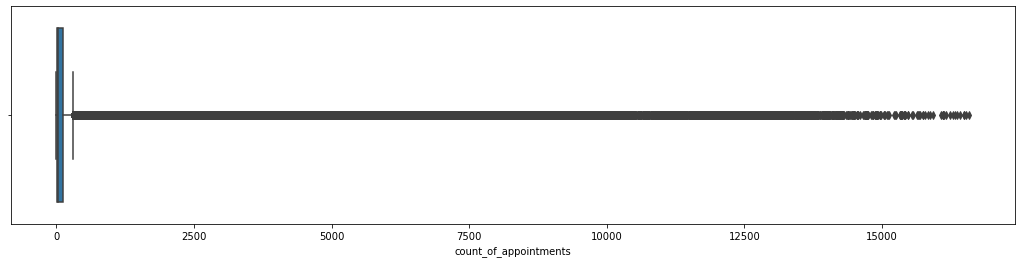

In [33]:
# Create a boxplot to check possible outliers in the data set
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=nc, x='count_of_appointments')

In [34]:
# Calculate quantiles and IQR.
nc_Q1 = nc['count_of_appointments'].quantile(0.25) 
nc_Q3 = nc['count_of_appointments'].quantile(0.75)
nc_IQR = nc_Q3 - nc_Q1
nc_IQR

121.0

In [35]:
# Return a boolean array of the rows with (any) non-outlier column values.
nc_condition = ~((nc['count_of_appointments'] < (nc_Q1 - 1.5 * nc_IQR)) | (nc['count_of_appointments'] > (nc_Q3 + 1.5 * nc_IQR)))

# Filter DataFrame based on condition.
nc_non_outlier = nc[nc_condition]
nc_non_outlier.info()
nc_non_outlier.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669436 entries, 0 to 817393
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       669436 non-null  datetime64[ns]
 1   icb_ons_code           669436 non-null  object        
 2   sub_icb_location_name  669436 non-null  object        
 3   service_setting        669436 non-null  object        
 4   context_type           669436 non-null  object        
 5   national_category      669436 non-null  object        
 6   count_of_appointments  669436 non-null  int64         
 7   appointment_month      669436 non-null  object        
 8   Region Name            669436 non-null  object        
 9   weekday                669436 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 56.2+ MB


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
5       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   
5      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
4            Structured Medication Review                      2   
5                         Care Home Visit                     11   

  appointment_month                                    Region Name weekday  
0           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
1           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
2           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
4           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday  
5           2021-08  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Monday

<AxesSubplot:xlabel='count_of_appointments'>

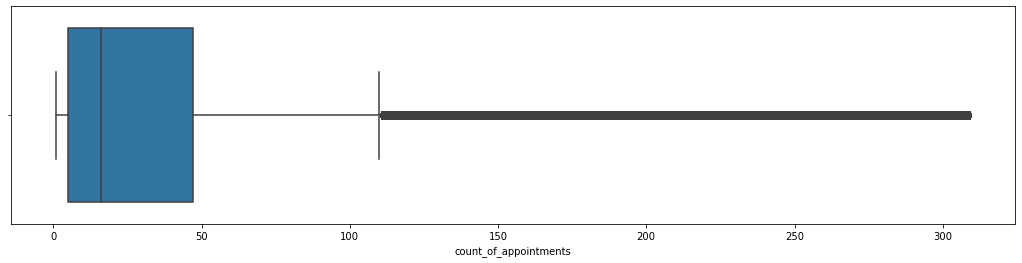

In [36]:
# Create a boxplot to check the updated data set without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=nc_non_outlier, x='count_of_appointments')

> **IMPORTANT CONSIDERATION:** After this exercise we can see that by removing the outliers found in each dataset we lose a considerable amount of records that would be translated into millions of appointments. In this particular case, we don't feel this approach is the correct one as it won't be a true reflection of the NHS workload reality. Therefore, we are going to proceed with the analysis on the original datasets and not the "_non_outlier" ones.  

## 4. Exploratory Analysis

### 4a. Time period covered by the datasets 

In [37]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

print(f"The first appointment date in the ad dataset is {ad['appointment_date'].min()}")
print(f"The first appointment date in the ad dataset is {ad['appointment_date'].max()}")

The first appointment date in the ad dataset is 2021-12-01 00:00:00
The first appointment date in the ad dataset is 2022-06-30 00:00:00


In [38]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.

print(f"The first appointment date in the ar dataset is {ar['appointment_month'].min()}")
print(f"The first appointment date in the ar dataset is {ar['appointment_month'].max()}")

The first appointment date in the ar dataset is 2020-01
The first appointment date in the ar dataset is 2022-06


In [39]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

print(f"The first appointment date in the nc dataset is {nc['appointment_date'].min()}")
print(f"The first appointment date in the nc dataset is {nc['appointment_date'].max()}")

The first appointment date in the nc dataset is 2021-08-01 00:00:00
The first appointment date in the nc dataset is 2022-06-30 00:00:00


> We can see each dataset covers a different period of time, which we will need to take into account later down the line when performing further analysis. However, overall the period covered runs from January 2020 to June 2022.

### 4b. Evaluate the number of different types for each variable

#### How many locations and regions are there in the data set?

In [40]:
# Determine the number of locations.
print("The count of locations is: ", len(nc['sub_icb_location_name'].unique()), ". And these are:")
nc['sub_icb_location_name'].unique()

The count of locations is:  106 . And these are:


array(['NHS North East and North Cumbria ICB - 00L',
       'NHS North East and North Cumbria ICB - 00N',
       'NHS North East and North Cumbria ICB - 00P',
       'NHS Lancashire and South Cumbria ICB - 00Q',
       'NHS Lancashire and South Cumbria ICB - 00R',
       'NHS Greater Manchester ICB - 00T',
       'NHS Greater Manchester ICB - 00V',
       'NHS Lancashire and South Cumbria ICB - 00X',
       'NHS Greater Manchester ICB - 00Y',
       'NHS Lancashire and South Cumbria ICB - 01A',
       'NHS Greater Manchester ICB - 01D',
       'NHS Lancashire and South Cumbria ICB - 01E',
       'NHS Cheshire and Merseyside ICB - 01F',
       'NHS Greater Manchester ICB - 01G',
       'NHS North East and North Cumbria ICB - 01H',
       'NHS Cheshire and Merseyside ICB - 01J',
       'NHS Lancashire and South Cumbria ICB - 01K',
       'NHS Cheshire and Merseyside ICB - 01T',
       'NHS Cheshire and Merseyside ICB - 01V',
       'NHS Greater Manchester ICB - 01W',
       'NHS Cheshire

In [41]:
# Determine the number of regions.
print("The count of regions is: ", len(nc['Region Name'].unique()), ". And these are:")
nc['Region Name'].unique()

The count of regions is:  7 . And these are:


array(['NORTH EAST AND YORKSHIRE COMMISSIONING REGION',
       'NORTH WEST COMMISSIONING REGION', 'MIDLANDS COMMISSIONING REGION',
       'EAST OF ENGLAND COMMISSIONING REGION',
       'SOUTH EAST COMMISSIONING REGION',
       'SOUTH WEST COMMISSIONING REGION', 'LONDON COMMISSIONING REGION'],
      dtype=object)

#### What are the five locations with the highest number of records?

In [42]:
# Determine the top five locations based on record count.
print("The top five locations based on record count are:")
nc['sub_icb_location_name'].value_counts().head(5)

The top five locations based on record count are:


NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

#### What are the regions with the highest number of records?

In [43]:
# Determine the regions based on record count.
print("The list of regions based on record count is:")
nc['Region Name'].value_counts()

The list of regions based on record count is:


NORTH EAST AND YORKSHIRE COMMISSIONING REGION    165809
NORTH WEST COMMISSIONING REGION                  156305
MIDLANDS COMMISSIONING REGION                    155250
EAST OF ENGLAND COMMISSIONING REGION             110338
SOUTH EAST COMMISSIONING REGION                  102268
SOUTH WEST COMMISSIONING REGION                   71581
LONDON COMMISSIONING REGION                       55843
Name: Region Name, dtype: int64

#### How many actual duration types are in the ad dataset?

In [44]:
# Determine the number of actual duration types.
print("The count of actual duration is: ", len(ad['actual_duration'].unique()), ". And these are:")
Count = ad['actual_duration'].value_counts()
Percent = (ad['actual_duration'].value_counts() / ad['actual_duration'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of actual duration is:  7 . And these are:


Count      %
Unknown / Data Quality  20161  14.63
1-5 Minutes             19909  14.45
6-10 Minutes            19902  14.44
11-15 Minutes           19738  14.32
16-20 Minutes           19534  14.18
21-30 Minutes           19452  14.12
31-60 Minutes           19097  13.86

#### How many healthcare professionals, appointment statuses, appointment modes and time between book and appointment are in the ar dataset?

In [45]:
# Determine the number of healthcare professionals.
print("The count of healthcare professionals is: ", len(ar['hcp_type'].unique()), ". And these are:")
Count = ar['hcp_type'].value_counts()
Percent = (ar['hcp_type'].value_counts() / ar['hcp_type'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of healthcare professionals is:  3 . And these are:


Count      %
Other Practice staff  241557  40.47
GP                    226036  37.87
Unknown               129228  21.65

In [46]:
# Determine the number of appointment status.
print("The count of appointment statuses is: ", len(ar['appointment_status'].unique()), ". And these are:")
Count = ar['appointment_status'].value_counts()
Percent = (ar['appointment_status'].value_counts() / ar['appointment_status'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of appointment statuses is:  3 . And these are:


Count      %
Attended  232137  38.90
Unknown   201324  33.73
DNA       163360  27.37

In [47]:
# Determine the number of appointment modes.
print("The count of appointment modes is: ", len(ar['appointment_mode'].unique()), ". And these are:")
Count = ar['appointment_mode'].value_counts()
Percent = (ar['appointment_mode'].value_counts() / ar['appointment_mode'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of appointment modes is:  5 . And these are:


Count      %
Face-to-Face  180410  30.23
Telephone     166483  27.89
Home Visit    111194  18.63
Unknown        79147  13.26
Video/Online   59587   9.98

In [48]:
# Determine the number of time between book and appointment types.
print("The count of time between book and appointment is: ", len(ar['time_between_book_and_appointment'].unique())\
      , ". And these are:")
Count = ar['time_between_book_and_appointment'].value_counts()
Percent = (ar['time_between_book_and_appointment'].value_counts() / ar['time_between_book_and_appointment']\
           .value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of time between book and appointment is:  8 . And these are:


Count      %
Same Day                95502  16.00
2 to 7 Days             92409  15.48
1 Day                   88957  14.91
8  to 14 Days           82698  13.86
15  to 21 Days          73666  12.34
22  to 28 Days          68755  11.52
More than 28 Days       65147  10.92
Unknown / Data Quality  29687   4.97

#### How many service settings, context types, national categories are in the nc dataset?

In [49]:
# Determine the number of service settings.
print("The count of service settings is: ", len(nc['service_setting'].unique()), ". And these are:")
Count = nc['service_setting'].value_counts()
Percent = (nc['service_setting'].value_counts() / nc['service_setting'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of service settings is:  5 . And these are:


Count      %
General Practice           359274  43.95
Primary Care Network       183790  22.48
Other                      138789  16.98
Extended Access Provision  108122  13.23
Unmapped                    27419   3.35

In [50]:
# Determine the number of context types.
print("The ount of context types is: ", len(nc['context_type'].unique()), ". And these are:")
Count = nc['context_type'].value_counts()
Percent = (nc['context_type'].value_counts() / nc['context_type'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The ount of context types is:  3 . And these are:


Count      %
Care Related Encounter  700481  85.70
Inconsistent Mapping     89494  10.95
Unmapped                 27419   3.35

In [51]:
# Determine the number of national categories.
print("The count of national categories is: ", len(nc['national_category'].unique()), ". And these are:")
Count = nc['national_category'].value_counts()
Percent = (nc['national_category'].value_counts() / nc['national_category'].value_counts().sum()) * 100
pd.concat([Count, Percent], axis=1, keys=['Count', '%']).round(2)

The count of national categories is:  18 . And these are:


Count      %
Inconsistent Mapping                                89494  10.95
General Consultation Routine                        89329  10.93
General Consultation Acute                          84874  10.38
Planned Clinics                                     76429   9.35
Clinical Triage                                     74539   9.12
Planned Clinical Procedure                          59631   7.30
Structured Medication Review                        44467   5.44
Service provided by organisation external to th...  43095   5.27
Home Visit                                          41850   5.12
Unplanned Clinical Activity                         40415   4.94
Patient contact during Care Home Round              28795   3.52
Unmapped                                            27419   3.35
Care Home Visit                                     26644   3.26
Social Prescribing Service                          26492   3.24
Care Home Needs Assessment & Personalised Care ...  23505   2.88
Non-contractual chargeable work                     20896   2.56
Walk-in                                             14179   1.73
Group Consultation and Group Education               5341   0.65

### 4c. Understand the distribution of these variables by count of appointments and over time

We are going to investigate if these variables have more weight than others by count of appointments, which will provide an insight as to which are used the most.

#### Distribution of appointments by region, using the ar dataset as it covers the longest period of time

In [52]:
# Determine the number of appointments recorded for each region. 
ar_rg = ar.groupby('Region Name')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending=False)\
.reset_index()

# Add a column to show percentages.
ar_rg['%'] = (ar_rg['count_of_appointments'] / ar_rg['count_of_appointments'].sum()) * 100

# View the output.
ar_rg.round(2)

Region Name  count_of_appointments      %
0                  MIDLANDS COMMISSIONING REGION              143625196  19.34
1  NORTH EAST AND YORKSHIRE COMMISSIONING REGION              121448860  16.35
2                SOUTH EAST COMMISSIONING REGION              112144789  15.10
3                    LONDON COMMISSIONING REGION              107684862  14.50
4                NORTH WEST COMMISSIONING REGION               88702868  11.94
5           EAST OF ENGLAND COMMISSIONING REGION               86228648  11.61
6                SOUTH WEST COMMISSIONING REGION               82969302  11.17

> The NHS Midlands Commissioning Region is the busiest in England.

#### Distribution of appointments by actual duration of the appointment (ad dataset)

In [53]:
# Determine the number of appointments recorded for each actual duration type.  
ad_ad = ad.groupby('actual_duration')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending=False)\
.reset_index()

# Add a column to show percentages.
ad_ad['%'] = (ad_ad['count_of_appointments'] / ad_ad['count_of_appointments'].sum()) * 100

# View the output.
ad_ad.round(2)

actual_duration  count_of_appointments      %
0  Unknown / Data Quality               40284086  23.98
1            6-10 Minutes               33800815  20.12
2             1-5 Minutes               28600865  17.03
3           11-15 Minutes               25160882  14.98
4           16-20 Minutes               16004247   9.53
5           21-30 Minutes               15026365   8.95
6           31-60 Minutes                9103432   5.42

> The duration of the appointments is low generally, which could be due to the staff being at full capacity and cutting the appointments time to the minimum. 

> Also worth noting at this point there is a hight volume of appointments that have not been recorded properly. 

#### Distribution of appointments by appointment status (ar dataset)

In [54]:
# Determine the number of appointments recorded for each appointment status type. 
ar_as = ar.groupby('appointment_status')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
ar_as['%'] = (ar_as['count_of_appointments'] / ar_as['count_of_appointments'].sum()) * 100

# View the output.
ar_as.round(2)

count_of_appointments      %
appointment_status                              
Attended                        677755876  91.24
Unknown                          34137416   4.60
DNA                              30911233   4.16

> We can see the proportion of not attended appointments vs attended is marginal, but in terms of value it is almost 31 million appointments that were not attended between January 2020 and June 2022, which we are going to explore in further detail.

#### Distribution of appointments by healthcare professionals (ar dataset)

In [55]:
# Determine the number of appointments recorded for each healthcare professional type. 
ar_hcp = ar.groupby('hcp_type')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
ar_hcp['%'] = (ar_hcp['count_of_appointments'] / ar_hcp['count_of_appointments'].sum()) * 100

# View the output.
ar_hcp.round(2)

count_of_appointments      %
hcp_type                                          
GP                                379650140  51.11
Other Practice staff              339650535  45.73
Unknown                            23503850   3.16

> It seems that the healthcare professionals are well distributed but if we note that under GP are:
> - GP registrar
> - Locum GP
> - Principal GP

> And under 'other practice staff' are:

> - Acupuncturist
> - Chiropodist
> - Community Psychiatric Nurse
> - Counsellor
> - Dispenser
> - District Nurse
> - Health Visitor
> - Interpreter/Link Worker
> - Osteopath
> - Other Practice Staff
> - Physiotherapist
> - Practice Nurse

> Then we can see the distribution of appointments is overweight over the GPs.

#### Distribution of appointments by appointment modes (ar dataset)

In [56]:
# Determine the number of appointments recorded for each appointment mode. 
ar_am = ar.groupby('appointment_mode')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
ar_am['%'] = (ar_am['count_of_appointments'] / ar_am['count_of_appointments'].sum()) * 100

# View the output.
ar_am.round(2)

count_of_appointments      %
appointment_mode                              
Face-to-Face                  439981729  59.23
Telephone                     267862657  36.06
Unknown                        26451305   3.56
Home Visit                      4887876   0.66
Video/Online                    3620958   0.49

> The face-to-face appointments and the telephone appointments are the most common, while the others are a very small proportion of the total of appointments.

#### Distribution of appointments by time between book and appointment (ar dataset)

In [57]:
# Determine the number of appointments recorded for each type of time between book and appointment. 
ar_time = ar.groupby('time_between_book_and_appointment')[['count_of_appointments']].sum()\
.sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
ar_time['%'] = (ar_time['count_of_appointments'] / ar_time['count_of_appointments'].sum()) * 100

# View the output.
ar_time.round(2)

count_of_appointments      %
time_between_book_and_appointment                              
Same Day                                       342747171  46.14
2 to 7 Days                                    153794531  20.70
8  to 14 Days                                   86846519  11.69
1 Day                                           67716097   9.12
15  to 21 Days                                  42710574   5.75
22  to 28 Days                                  25536541   3.44
More than 28 Days                               23050987   3.10
Unknown / Data Quality                            402105   0.05

> The proportion of appointments that take longer than 8 days from the time of booking to the appointment is very high, and this needs attention.

#### Distribution of appointments by service setting (nc dataset)

In [58]:
# Determine the number of appointments recorded for each service setting. 
nc_ss = nc.groupby('service_setting')[['count_of_appointments']].sum()\
.sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
nc_ss['%'] = (nc_ss['count_of_appointments'] / nc_ss['count_of_appointments'].sum()) * 100

# View the output.
nc_ss.round(2)

count_of_appointments      %
service_setting                                        
General Practice                       270811691  91.48
Unmapped                                11080810   3.74
Primary Care Network                     6557386   2.21
Other                                    5420076   1.83
Extended Access Provision                2176807   0.74

> The service setting General Practice runs the mayority of appointments, which puts a lot of pressure on this service.

#### Distribution of appointments by context type (nc dataset)

In [59]:
# Determine the number of appointments recorded for each context type. 
nc_ct = nc.groupby('context_type')[['count_of_appointments']].sum()\
.sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
nc_ct['%'] = (nc_ct['count_of_appointments'] / nc_ct['count_of_appointments'].sum()) * 100

# View the output.
nc_ct.round(2)

count_of_appointments      %
context_type                                        
Care Related Encounter              257075158  86.84
Inconsistent Mapping                 27890802   9.42
Unmapped                             11080810   3.74

#### Distribution of appointments by national category (nc dataset)

In [60]:
# Determine the number of appointments recorded for each national category. 
nc_nc = nc.groupby('national_category')[['count_of_appointments']].sum()\
.sort_values('count_of_appointments', ascending=False)

# Add a column to show percentages.
nc_nc['%'] = (nc_nc['count_of_appointments'] / nc_nc['count_of_appointments'].sum()) * 100

# View the output.
nc_nc.round(2)

count_of_appointments  \
national_category                                                           
General Consultation Routine                                     97271522   
General Consultation Acute                                       53691150   
Clinical Triage                                                  41546964   
Planned Clinics                                                  28019748   
Inconsistent Mapping                                             27890802   
Planned Clinical Procedure                                       25702694   
Unmapped                                                         11080810   
Unplanned Clinical Activity                                       3055794   
Home Visit                                                        2144452   
Structured Medication Review                                      1858379   
Service provided by organisation external to th...                 852133   
Patient contact during Care Home Round                             810330   
Care Home Visit                                                    628279   
Social Prescribing Service                                         475828   
Walk-in                                                            412438   
Care Home Needs Assessment & Personalised Care ...                 405904   
Non-contractual chargeable work                                    138911   
Group Consultation and Group Education                              60632   

                                                        %  
national_category                                          
General Consultation Routine                        32.86  
General Consultation Acute                          18.14  
Clinical Triage                                     14.03  
Planned Clinics                                      9.46  
Inconsistent Mapping                                 9.42  
Planned Clinical Procedure                           8.68  
Unmapped                                             3.74  
Unplanned Clinical Activity                          1.03  
Home Visit                                           0.72  
Structured Medication Review                         0.63  
Service provided by organisation external to th...   0.29  
Patient contact during Care Home Round               0.27  
Care Home Visit                                      0.21  
Social Prescribing Service                           0.16  
Walk-in                                              0.14  
Care Home Needs Assessment & Personalised Care ...   0.14  
Non-contractual chargeable work                      0.05  
Group Consultation and Group Education               0.02

> Just another confirmation that the General Practice is the service that received the most appointments. 

#### Which month had the highest number of appointments?

In [61]:
# We are using the ar dataset as it covers the longest period of time.
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
app_per_month_ar = ar.groupby('appointment_month')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending=False)\
.reset_index()

# Add a column to show percentages.
app_per_month_ar['%'] = (app_per_month_ar['count_of_appointments'] / app_per_month_ar['count_of_appointments'].sum()) * 100

# View the output.
app_per_month_ar.round(2)

appointment_month  count_of_appointments     %
0            2021-11               30405070  4.09
1            2021-10               30303834  4.08
2            2022-03               29595038  3.98
3            2021-09               28522501  3.84
4            2020-10               28301932  3.81
5            2022-05               27495508  3.70
6            2021-03               27225424  3.67
7            2020-01               27199296  3.66
8            2021-06               26784182  3.61
9            2020-09               26714255  3.60
10           2022-06               25828078  3.48
11           2021-07               25739219  3.47
12           2022-01               25635474  3.45
13           2022-02               25355260  3.41
14           2021-12               25140776  3.38
15           2020-11               25061602  3.37
16           2020-02               24104621  3.25
17           2020-03               24053468  3.24
18           2022-04               23913060  3.22
19           2021-04               23879932  3.21
20           2021-08               23852171  3.21
21           2020-12               23535936  3.17
22           2021-05               23508395  3.16
23           2021-01               22492069  3.03
24           2020-07               22491437  3.03
25           2021-02               22399569  3.02
26           2020-06               20690805  2.79
27           2020-08               20150520  2.71
28           2020-05               16417212  2.21
29           2020-04               16007881  2.16

> We can see which months were the busiest (October and November 2021), and which months were less active (April and May 2020), which makes sense as the Covid pandemic had just started and England was under a strict lockdown.

#### Which month had the highest number of records?

In [62]:
# We are using the ar dataset as it covers the longest period of time.
# We assume a record equals to a row in the dataset, therefore we can do a count of any of the columns to give us a total.
# Use the groupby() and sort_values() functions.
# Total number of records per month in ar data set.
records_per_month_ar = ar.groupby('appointment_month')[['icb_ons_code']]\
.count()\
.rename(columns={'icb_ons_code':'number_of_records'})

# Add a column to show percentages.
records_per_month_ar['%'] = (records_per_month_ar['number_of_records']/records_per_month_ar['number_of_records'].sum()) * 100

# View the output.
records_per_month_ar.round(2)

number_of_records     %
appointment_month                         
2020-01                        20889  3.50
2020-02                        20689  3.47
2020-03                        21350  3.58
2020-04                        19124  3.20
2020-05                        18338  3.07
2020-06                        18844  3.16
2020-07                        19502  3.27
2020-08                        19247  3.22
2020-09                        20043  3.36
2020-10                        20122  3.37
2020-11                        19675  3.30
2020-12                        19394  3.25
2021-01                        19319  3.24
2021-02                        18949  3.17
2021-03                        19369  3.25
2021-04                        19452  3.26
2021-05                        19384  3.25
2021-06                        19814  3.32
2021-07                        19899  3.33
2021-08                        19786  3.32
2021-09                        20441  3.42
2021-10                        20562  3.45
2021-11                        20766  3.48
2021-12                        20393  3.42
2022-01                        20225  3.39
2022-02                        20133  3.37
2022-03                        20532  3.44
2022-04                        20073  3.36
2022-05                        20276  3.40
2022-06                        20231  3.39

### So far we have looked at the proportion of appointments by each of the variables. Now we are going to create an aggregated dataframe for each dataset to be able to create visualisations to respond to the main questions. 

#### Actual Duration aggregated dataset

In [63]:
# Create an aggregated data set to review the different features.
ad_agg = ad.groupby([ad['appointment_date'], ad['appointment_month'], ad['actual_duration'],
                     ad['weekday'], ad['Region Name']])[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ad_agg

appointment_date appointment_month         actual_duration    weekday  \
0           2021-12-01           2021-12             1-5 Minutes  Wednesday   
1           2021-12-01           2021-12             1-5 Minutes  Wednesday   
2           2021-12-01           2021-12             1-5 Minutes  Wednesday   
3           2021-12-01           2021-12             1-5 Minutes  Wednesday   
4           2021-12-01           2021-12             1-5 Minutes  Wednesday   
...                ...               ...                     ...        ...   
10381       2022-06-30           2022-06  Unknown / Data Quality   Thursday   
10382       2022-06-30           2022-06  Unknown / Data Quality   Thursday   
10383       2022-06-30           2022-06  Unknown / Data Quality   Thursday   
10384       2022-06-30           2022-06  Unknown / Data Quality   Thursday   
10385       2022-06-30           2022-06  Unknown / Data Quality   Thursday   

                                         Region Name  count_of_appointments  
0               EAST OF ENGLAND COMMISSIONING REGION                  28544  
1                        LONDON COMMISSIONING REGION                  27342  
2                      MIDLANDS COMMISSIONING REGION                  42974  
3      NORTH EAST AND YORKSHIRE COMMISSIONING REGION                  37901  
4                    NORTH WEST COMMISSIONING REGION                  23255  
...                                              ...                    ...  
10381                  MIDLANDS COMMISSIONING REGION                  48572  
10382  NORTH EAST AND YORKSHIRE COMMISSIONING REGION                  39358  
10383                NORTH WEST COMMISSIONING REGION                  39478  
10384                SOUTH EAST COMMISSIONING REGION                  40611  
10385                SOUTH WEST COMMISSIONING REGION                  25684  

[10386 rows x 6 columns]

#### Appointments Regional aggregated dataset

In [64]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby([ar['appointment_month'], ar['appointment_status'], ar['hcp_type'],
                     ar['appointment_mode'], ar['time_between_book_and_appointment'], ar['Region Name']])\
[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_agg

appointment_month appointment_status hcp_type appointment_mode  \
0               2020-01           Attended       GP     Face-to-Face   
1               2020-01           Attended       GP     Face-to-Face   
2               2020-01           Attended       GP     Face-to-Face   
3               2020-01           Attended       GP     Face-to-Face   
4               2020-01           Attended       GP     Face-to-Face   
...                 ...                ...      ...              ...   
66147           2022-06            Unknown  Unknown          Unknown   
66148           2022-06            Unknown  Unknown          Unknown   
66149           2022-06            Unknown  Unknown          Unknown   
66150           2022-06            Unknown  Unknown          Unknown   
66151           2022-06            Unknown  Unknown     Video/Online   

      time_between_book_and_appointment  \
0                                 1 Day   
1                                 1 Day   
2                                 1 Day   
3                                 1 Day   
4                                 1 Day   
...                                 ...   
66147            Unknown / Data Quality   
66148            Unknown / Data Quality   
66149            Unknown / Data Quality   
66150            Unknown / Data Quality   
66151                       2 to 7 Days   

                                         Region Name  count_of_appointments  
0               EAST OF ENGLAND COMMISSIONING REGION                  68777  
1                        LONDON COMMISSIONING REGION                 118657  
2                      MIDLANDS COMMISSIONING REGION                 119532  
3      NORTH EAST AND YORKSHIRE COMMISSIONING REGION                 106403  
4                    NORTH WEST COMMISSIONING REGION                  82947  
...                                              ...                    ...  
66147           EAST OF ENGLAND COMMISSIONING REGION                      8  
66148                    LONDON COMMISSIONING REGION                      1  
66149                  MIDLANDS COMMISSIONING REGION                     19  
66150  NORTH EAST AND YORKSHIRE COMMISSIONING REGION                     25  
66151                NORTH WEST COMMISSIONING REGION                      1  

[66152 rows x 7 columns]

#### National Categories aggregated dataset

In [65]:
# Create an aggregated data set to review the different features.
nc_agg = nc.groupby([nc['appointment_date'], nc['appointment_month'], nc['service_setting'], 
                     nc['Region Name'], nc['weekday']])\
[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
nc_agg

appointment_date appointment_month            service_setting  \
0           2021-08-01           2021-08  Extended Access Provision   
1           2021-08-01           2021-08  Extended Access Provision   
2           2021-08-01           2021-08  Extended Access Provision   
3           2021-08-01           2021-08  Extended Access Provision   
4           2021-08-01           2021-08  Extended Access Provision   
...                ...               ...                        ...   
11633       2022-06-30           2022-06                   Unmapped   
11634       2022-06-30           2022-06                   Unmapped   
11635       2022-06-30           2022-06                   Unmapped   
11636       2022-06-30           2022-06                   Unmapped   
11637       2022-06-30           2022-06                   Unmapped   

                                         Region Name   weekday  \
0               EAST OF ENGLAND COMMISSIONING REGION    Sunday   
1                        LONDON COMMISSIONING REGION    Sunday   
2                      MIDLANDS COMMISSIONING REGION    Sunday   
3      NORTH EAST AND YORKSHIRE COMMISSIONING REGION    Sunday   
4                    NORTH WEST COMMISSIONING REGION    Sunday   
...                                              ...       ...   
11633                  MIDLANDS COMMISSIONING REGION  Thursday   
11634  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Thursday   
11635                NORTH WEST COMMISSIONING REGION  Thursday   
11636                SOUTH EAST COMMISSIONING REGION  Thursday   
11637                SOUTH WEST COMMISSIONING REGION  Thursday   

       count_of_appointments  
0                         13  
1                        191  
2                        130  
3                          3  
4                         51  
...                      ...  
11633                   6280  
11634                   6642  
11635                   3052  
11636                   4216  
11637                   4865  

[11638 rows x 6 columns]

### On the previous exercise we started to explore the datasets and we can see big differences in the weight of number of appointments leaning towards certain variables. Therefore, we are going to focus now on studying these variables and check if there are any patterns hidden in between these numbers while we try to answer the main questions as per the diagram below:

<img align="centre" width="1000" height="1000" src="AnguilVanier_Alejandra_DA201_Assignment_Diagram.png">

## VISUALISATION, INSIGHTS AND PATTERNS

## 1. Network Capacity

In [66]:
# Prepare the workstation by:

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style and the palette.
sns.set_style('white')
sns.set_palette('colorblind')

### Staff workload
#### Question: should the NHS start looking at increasing staff levels?

In [67]:
# Determine the total number of appointments per month.
ar_df = ar.groupby('appointment_month').sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 22 to get to a daily value (30 days per month minus weekends).
ar_df['utilisation'] = ar_df['count_of_appointments'] / 22

# View the DataFrame.
ar_df.round(1)

appointment_month  count_of_appointments  utilisation
0            2020-01               27199296    1236331.6
1            2020-02               24104621    1095664.6
2            2020-03               24053468    1093339.5
3            2020-04               16007881     727631.0
4            2020-05               16417212     746236.9
5            2020-06               20690805     940491.1
6            2020-07               22491437    1022338.0
7            2020-08               20150520     915932.7
8            2020-09               26714255    1214284.3
9            2020-10               28301932    1286451.5
10           2020-11               25061602    1139163.7
11           2020-12               23535936    1069815.3
12           2021-01               22492069    1022366.8
13           2021-02               22399569    1018162.2
14           2021-03               27225424    1237519.3
15           2021-04               23879932    1085451.5
16           2021-05               23508395    1068563.4
17           2021-06               26784182    1217462.8
18           2021-07               25739219    1169964.5
19           2021-08               23852171    1084189.6
20           2021-09               28522501    1296477.3
21           2021-10               30303834    1377447.0
22           2021-11               30405070    1382048.6
23           2021-12               25140776    1142762.5
24           2022-01               25635474    1165248.8
25           2022-02               25355260    1152511.8
26           2022-03               29595038    1345229.0
27           2022-04               23913060    1086957.3
28           2022-05               27495508    1249795.8
29           2022-06               25828078    1174003.5

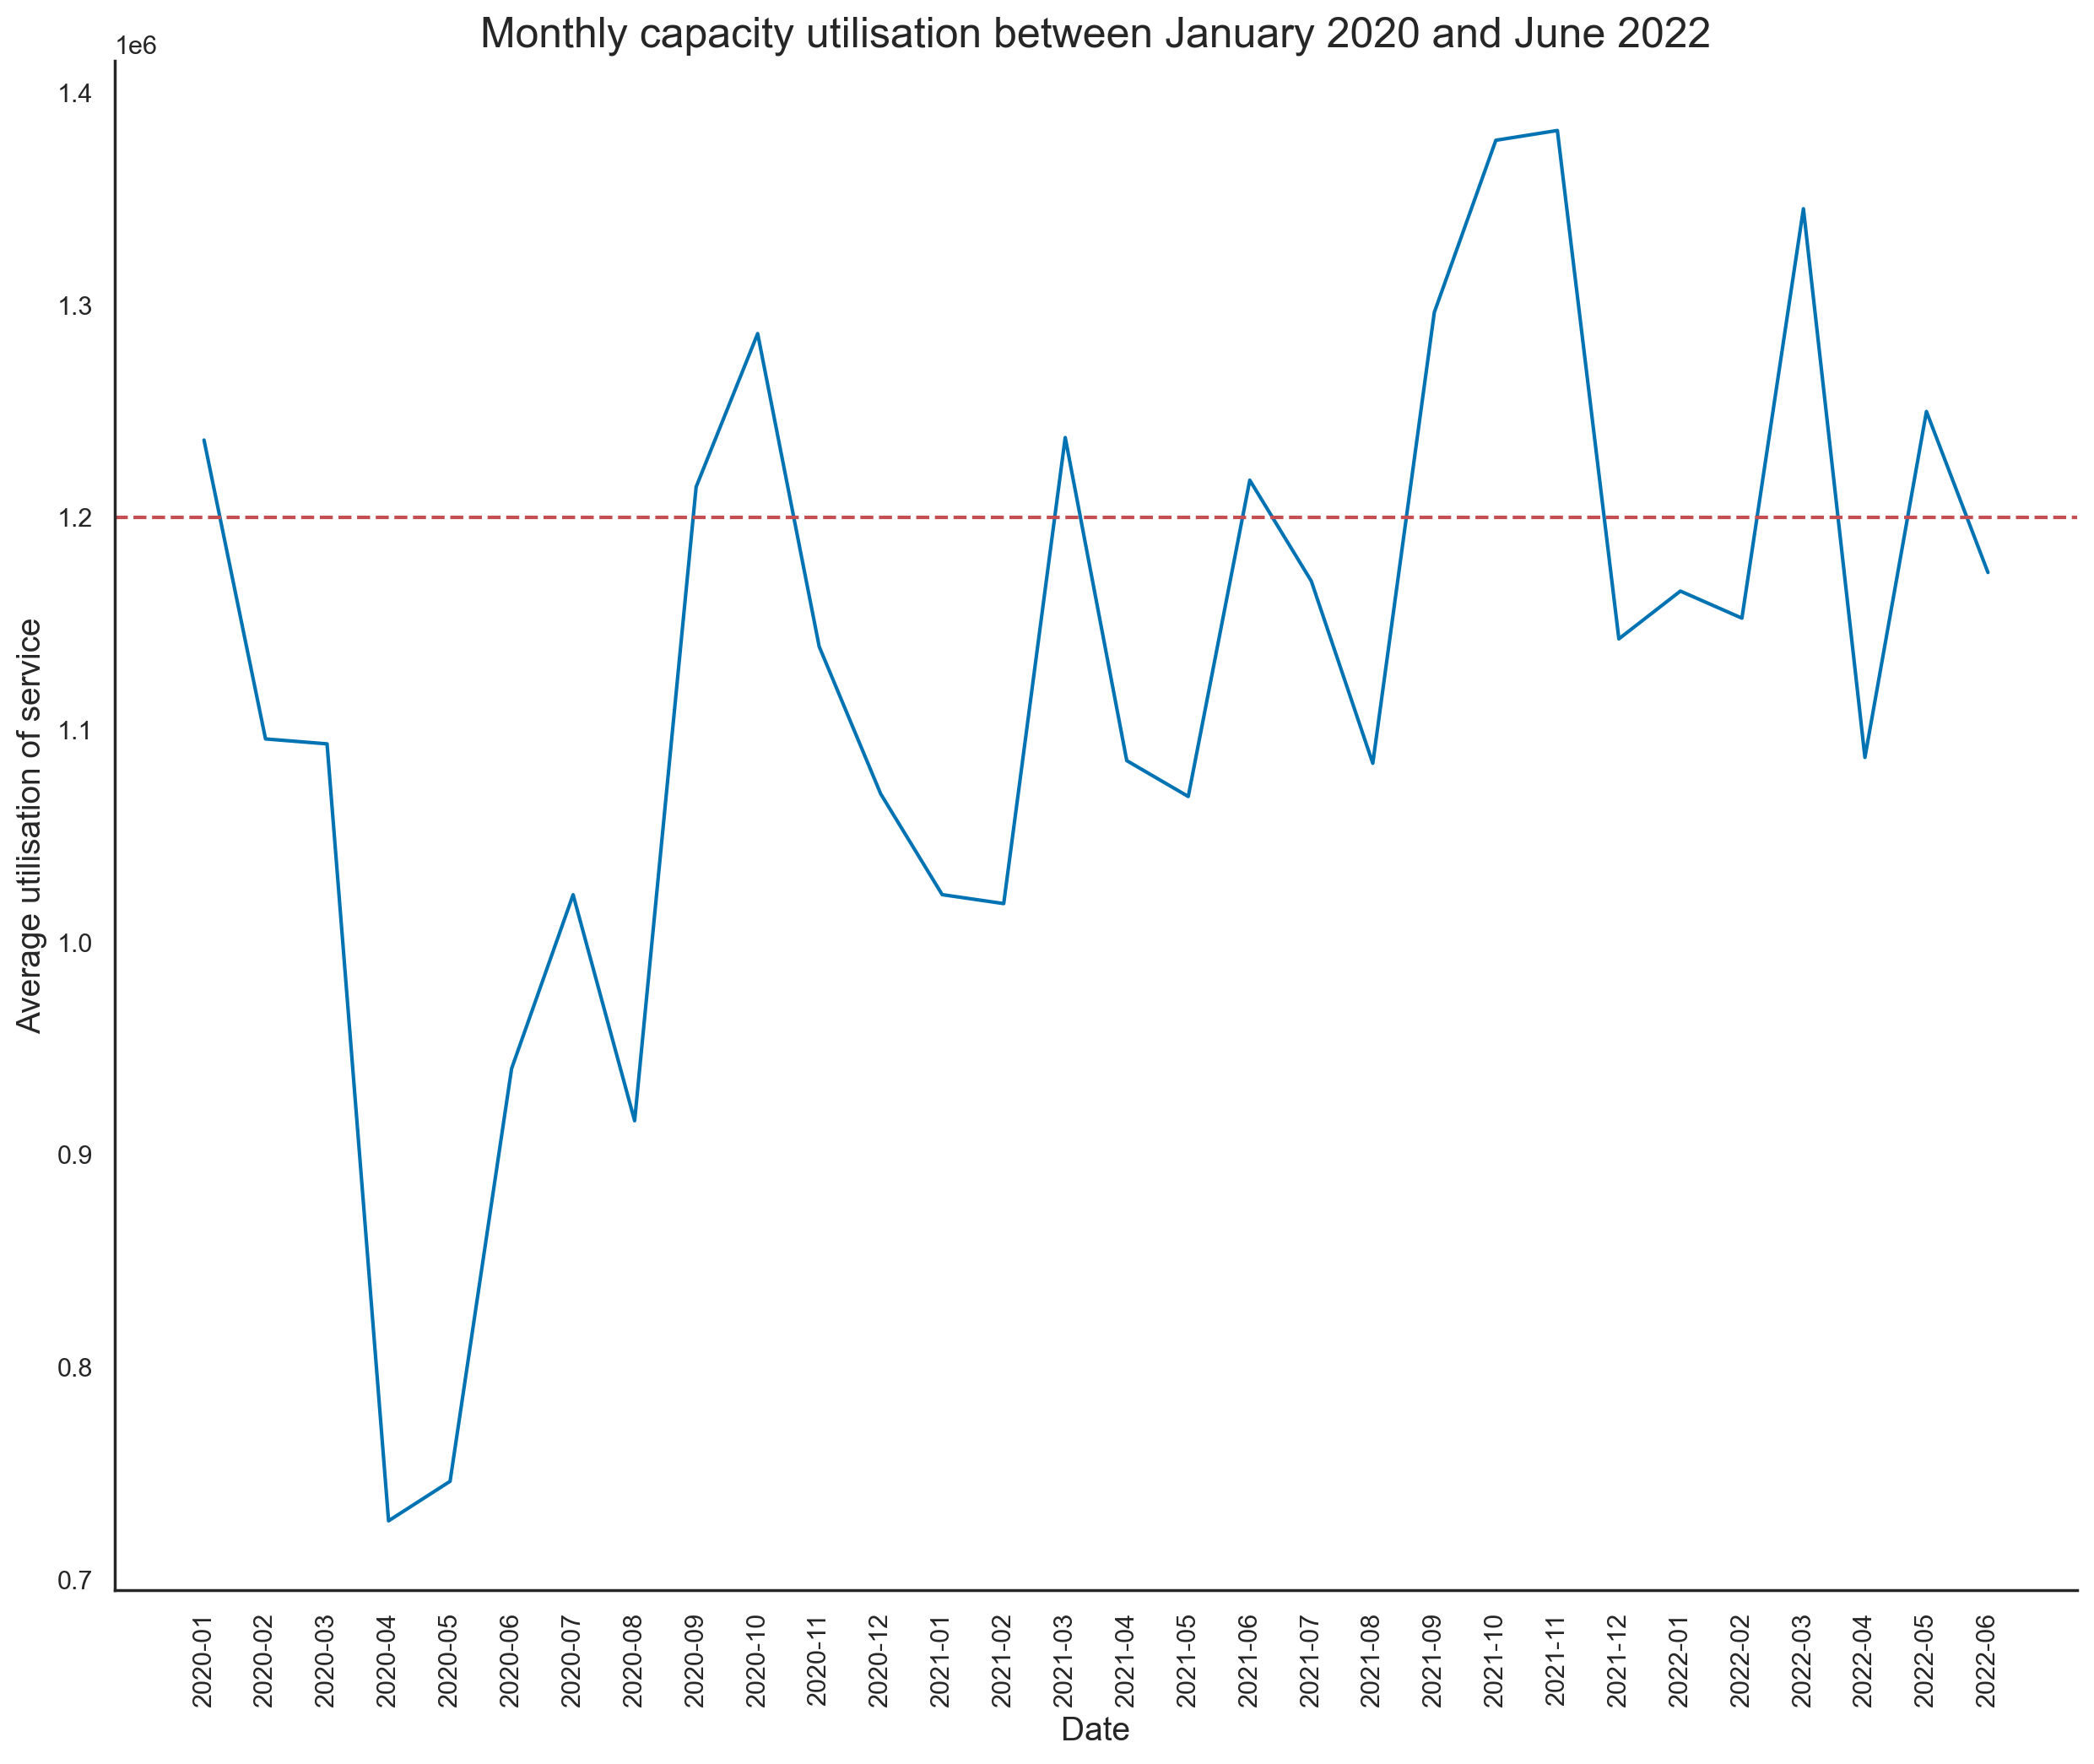

In [68]:
# Plot monthly capacity utilisation.
fig1, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average utilisation of service', fontsize=14)
plt.title('Monthly capacity utilisation between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Draw a line with the NHS maximum capacity of 1.200.000 apointments per day.
plt.axhline(y=1200000, color='r', linestyle='--')

# Remove the top and right spines from the plot.
sns.despine(fig1)

# View the plot and save an image.
plt.show()
fig1.savefig('Monthly capacity utilisation between January 2020 and June 2022.jpg')

> **The NHS can accommodate a maximum of 1,200,000 appointments per day.**
We have used 22 days per month to get the daily capacity utilisation due to discounting the weekends. Therefore we can clearly see some of the months are surpassing the maximum capacity. There is a deep around March-April 2020 which coincides with the beginning of the pandemic.

> This also helps us to respond to the second question: is the staff workload affecting their capacity to attend patients in a rigorous manner? Although more exhaustive data is required to respond to this question, we can infer that if the staff is overloaded is most probably that their capacity to perform their job is compromised.

### Staff workload
#### Question: is there enough time to look at patient issues properly?

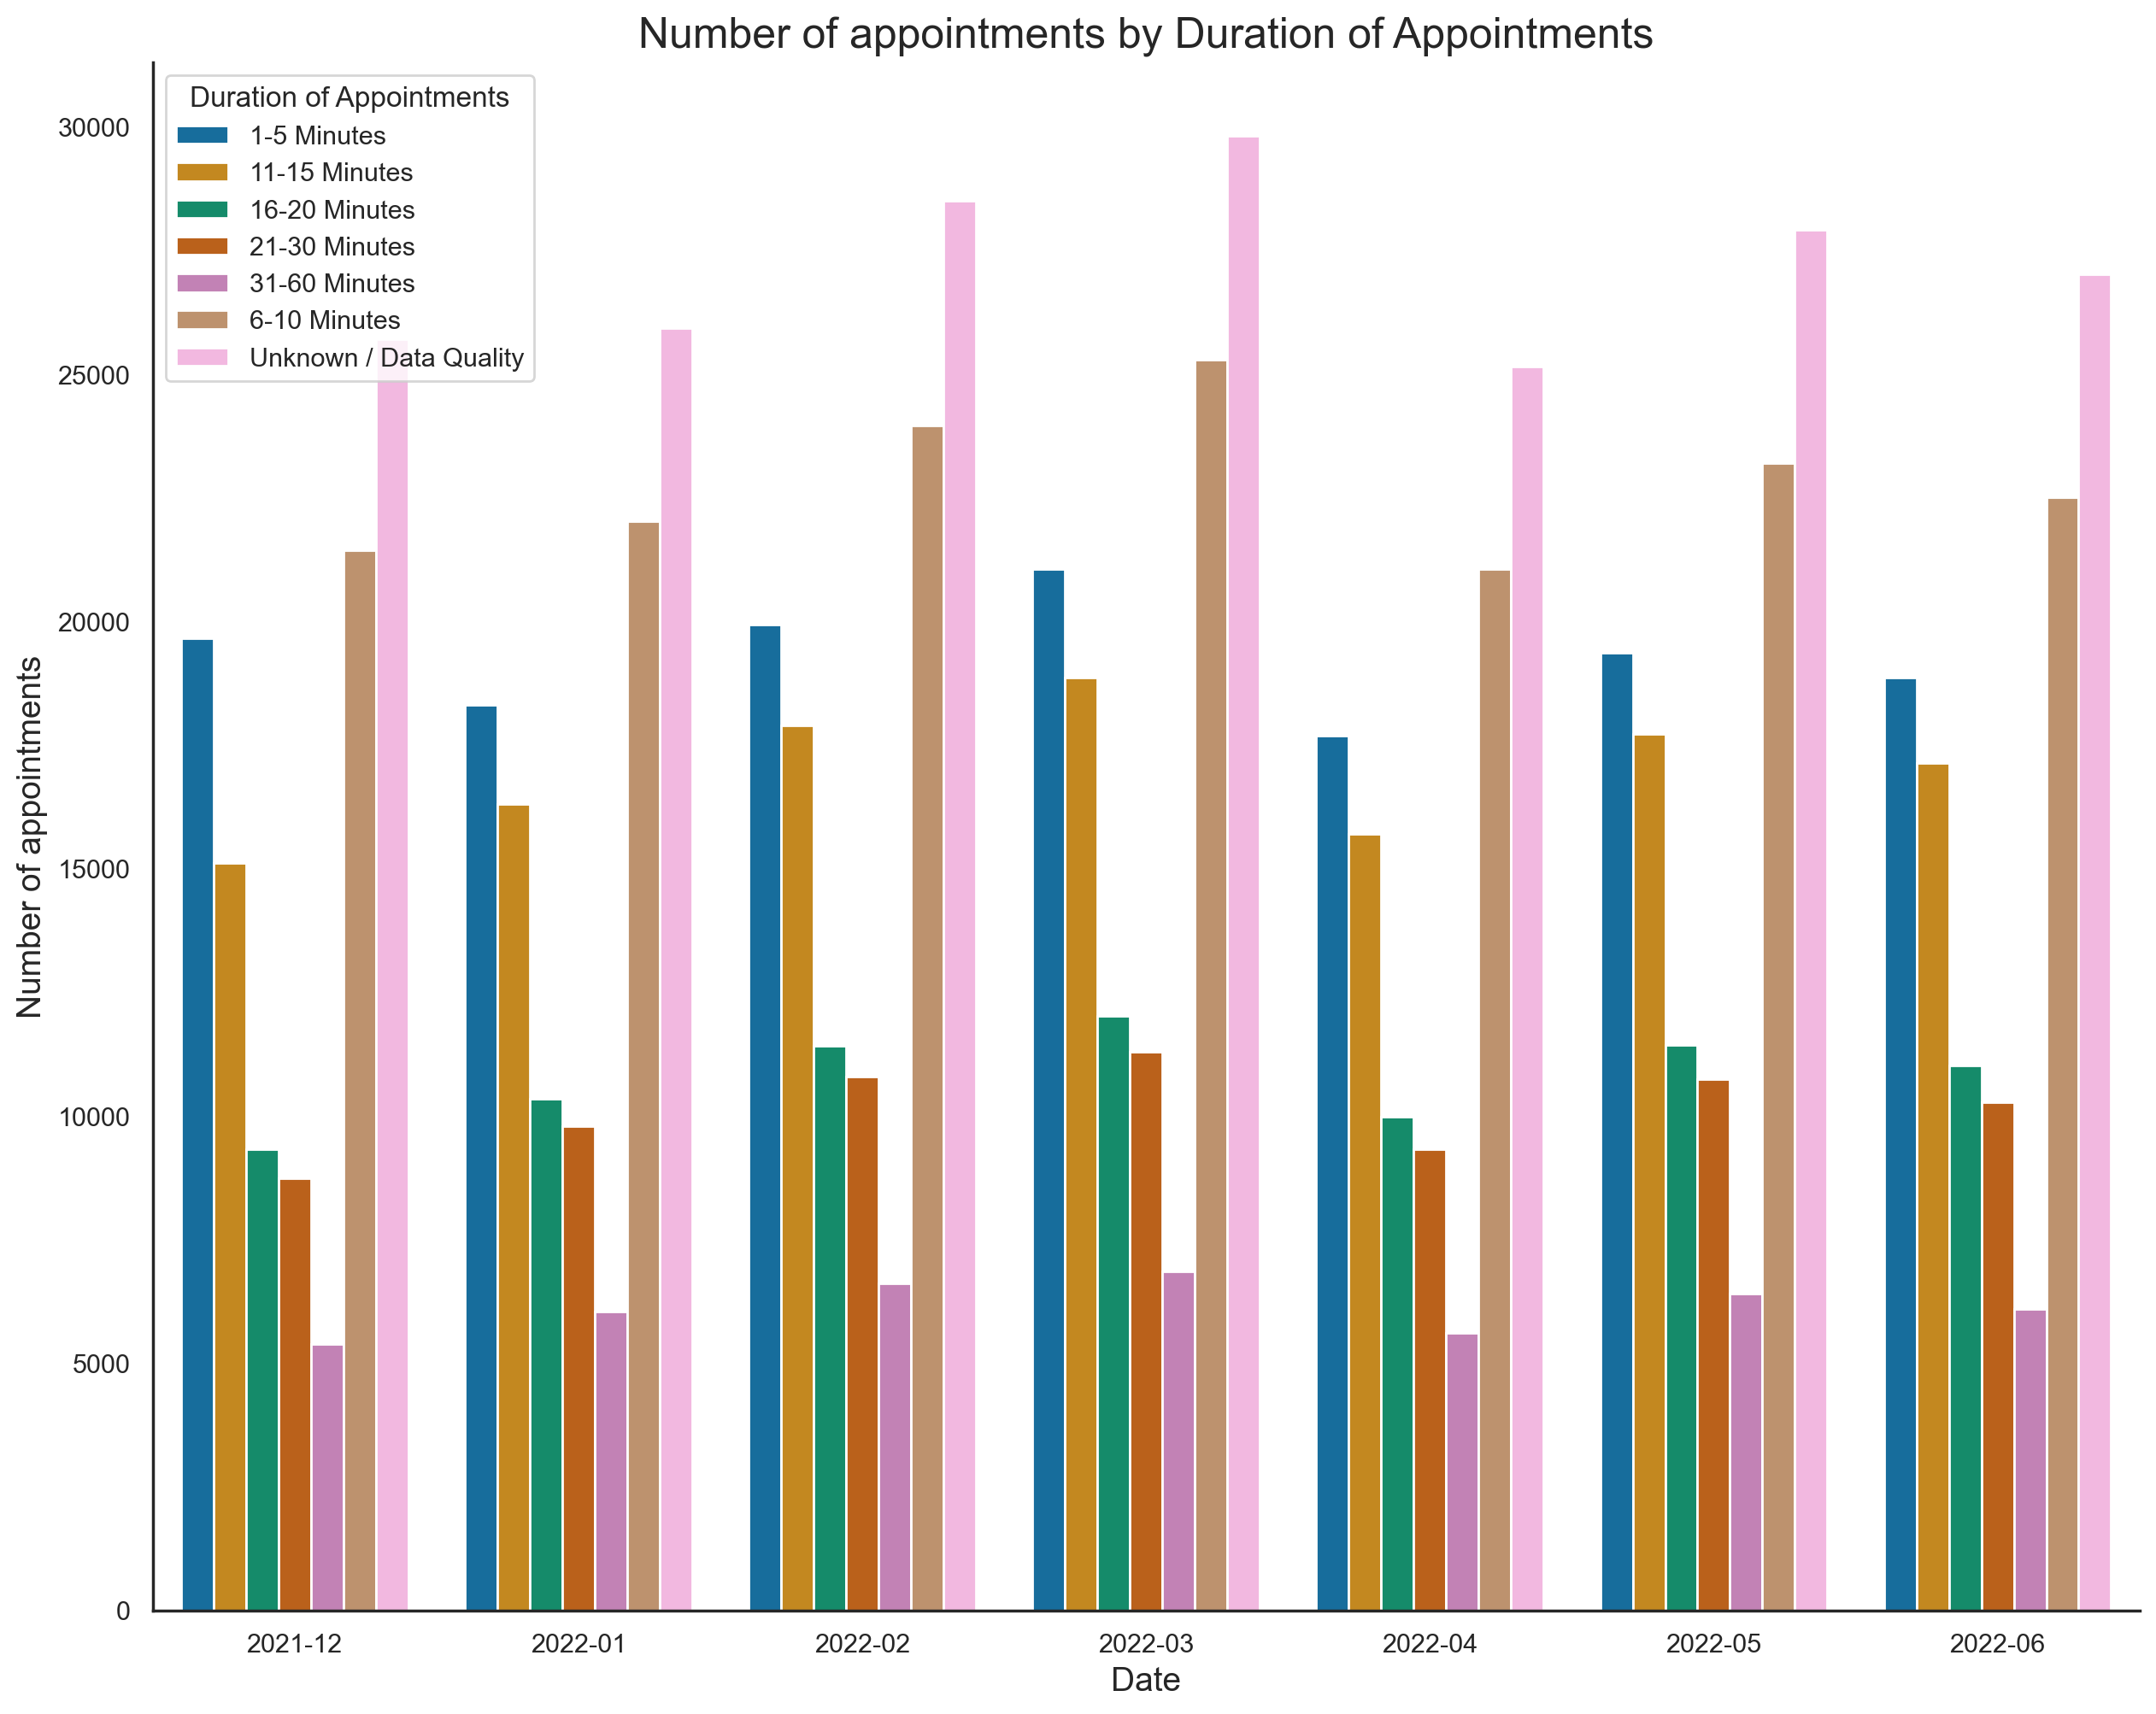

In [69]:
# Plot the appointments duration over the available date range.
# Create a lineplot.
fig2, ax = plt.subplots(dpi=200)
sns.barplot(data=ad_agg, x='appointment_month', y='count_of_appointments', 
            hue='actual_duration', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by Duration of Appointments', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig2)

# Edit the legend
plt.legend(loc='upper left', title='Duration of Appointments')
           
# View the plot and save an image.
plt.show()
fig2.savefig('Number of appointments by Duration of Appointments.jpg')

> We can clearly see most of the appointments over this period of time lasted less than 10 minutes, with a bit percentage of them less than 5 minutes. Can we assume people is tired of not getting enough time for their appointments and therefore not willing to attend them?

> Also worth noting the big percentage of appointments where we don't know the duration, so the limitation on the data collected has to be noted.

### Service setting workload
#### Question: is there a major difference between the various service settings?

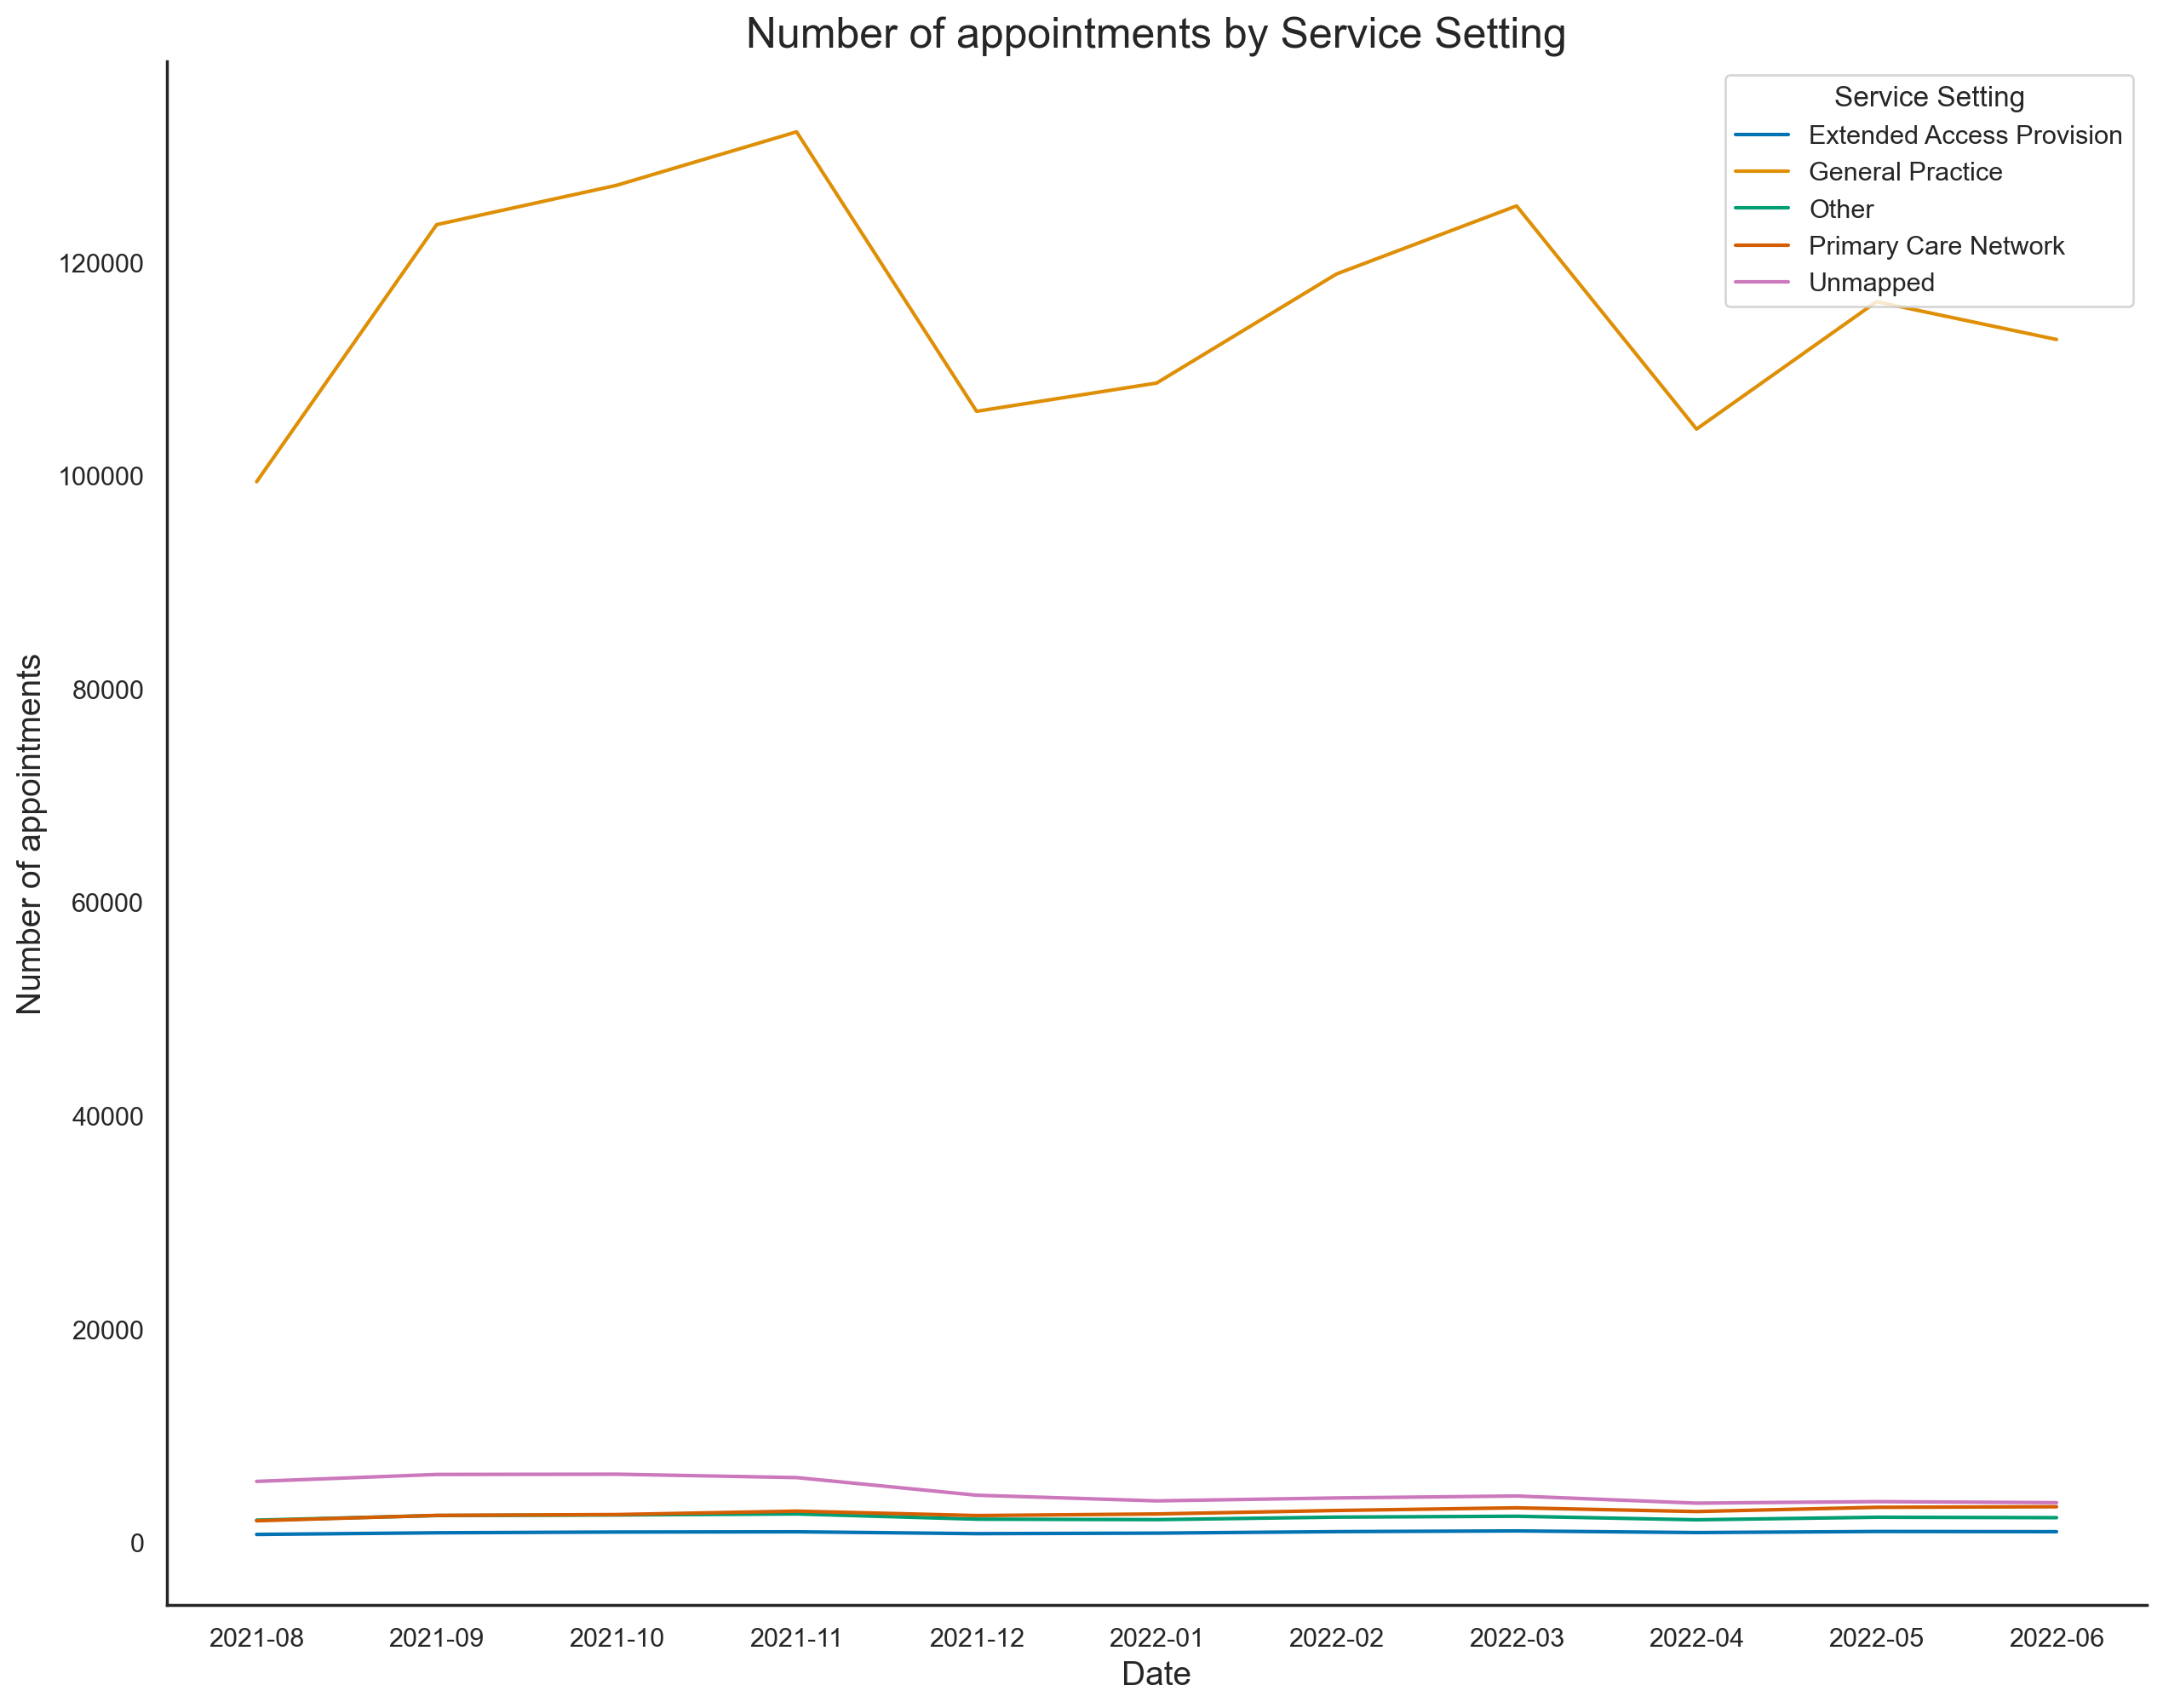

In [70]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
fig3, ax = plt.subplots(dpi=200)
sns.lineplot(data=nc_agg, x='appointment_month', y='count_of_appointments', 
             hue='service_setting', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by Service Setting', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig3)

# Edit the legend
plt.legend(loc='upper right', title='Service Setting')

# View the plot and save an image.
plt.show()
fig3.savefig('Number of appointments by Service Setting.jpg')

> Since there is a big difference between GP and the other service settings, let's plot it again removing the GP to see if there is a trend with the other service settings.

In [71]:
# Create a separate data set removing the GP. 
nc_agg_noGP = nc_agg[nc_agg['service_setting'] != 'General Practice']
nc_agg_noGP

appointment_date appointment_month            service_setting  \
0           2021-08-01           2021-08  Extended Access Provision   
1           2021-08-01           2021-08  Extended Access Provision   
2           2021-08-01           2021-08  Extended Access Provision   
3           2021-08-01           2021-08  Extended Access Provision   
4           2021-08-01           2021-08  Extended Access Provision   
...                ...               ...                        ...   
11633       2022-06-30           2022-06                   Unmapped   
11634       2022-06-30           2022-06                   Unmapped   
11635       2022-06-30           2022-06                   Unmapped   
11636       2022-06-30           2022-06                   Unmapped   
11637       2022-06-30           2022-06                   Unmapped   

                                         Region Name   weekday  \
0               EAST OF ENGLAND COMMISSIONING REGION    Sunday   
1                        LONDON COMMISSIONING REGION    Sunday   
2                      MIDLANDS COMMISSIONING REGION    Sunday   
3      NORTH EAST AND YORKSHIRE COMMISSIONING REGION    Sunday   
4                    NORTH WEST COMMISSIONING REGION    Sunday   
...                                              ...       ...   
11633                  MIDLANDS COMMISSIONING REGION  Thursday   
11634  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  Thursday   
11635                NORTH WEST COMMISSIONING REGION  Thursday   
11636                SOUTH EAST COMMISSIONING REGION  Thursday   
11637                SOUTH WEST COMMISSIONING REGION  Thursday   

       count_of_appointments  
0                         13  
1                        191  
2                        130  
3                          3  
4                         51  
...                      ...  
11633                   6280  
11634                   6642  
11635                   3052  
11636                   4216  
11637                   4865  

[9300 rows x 6 columns]

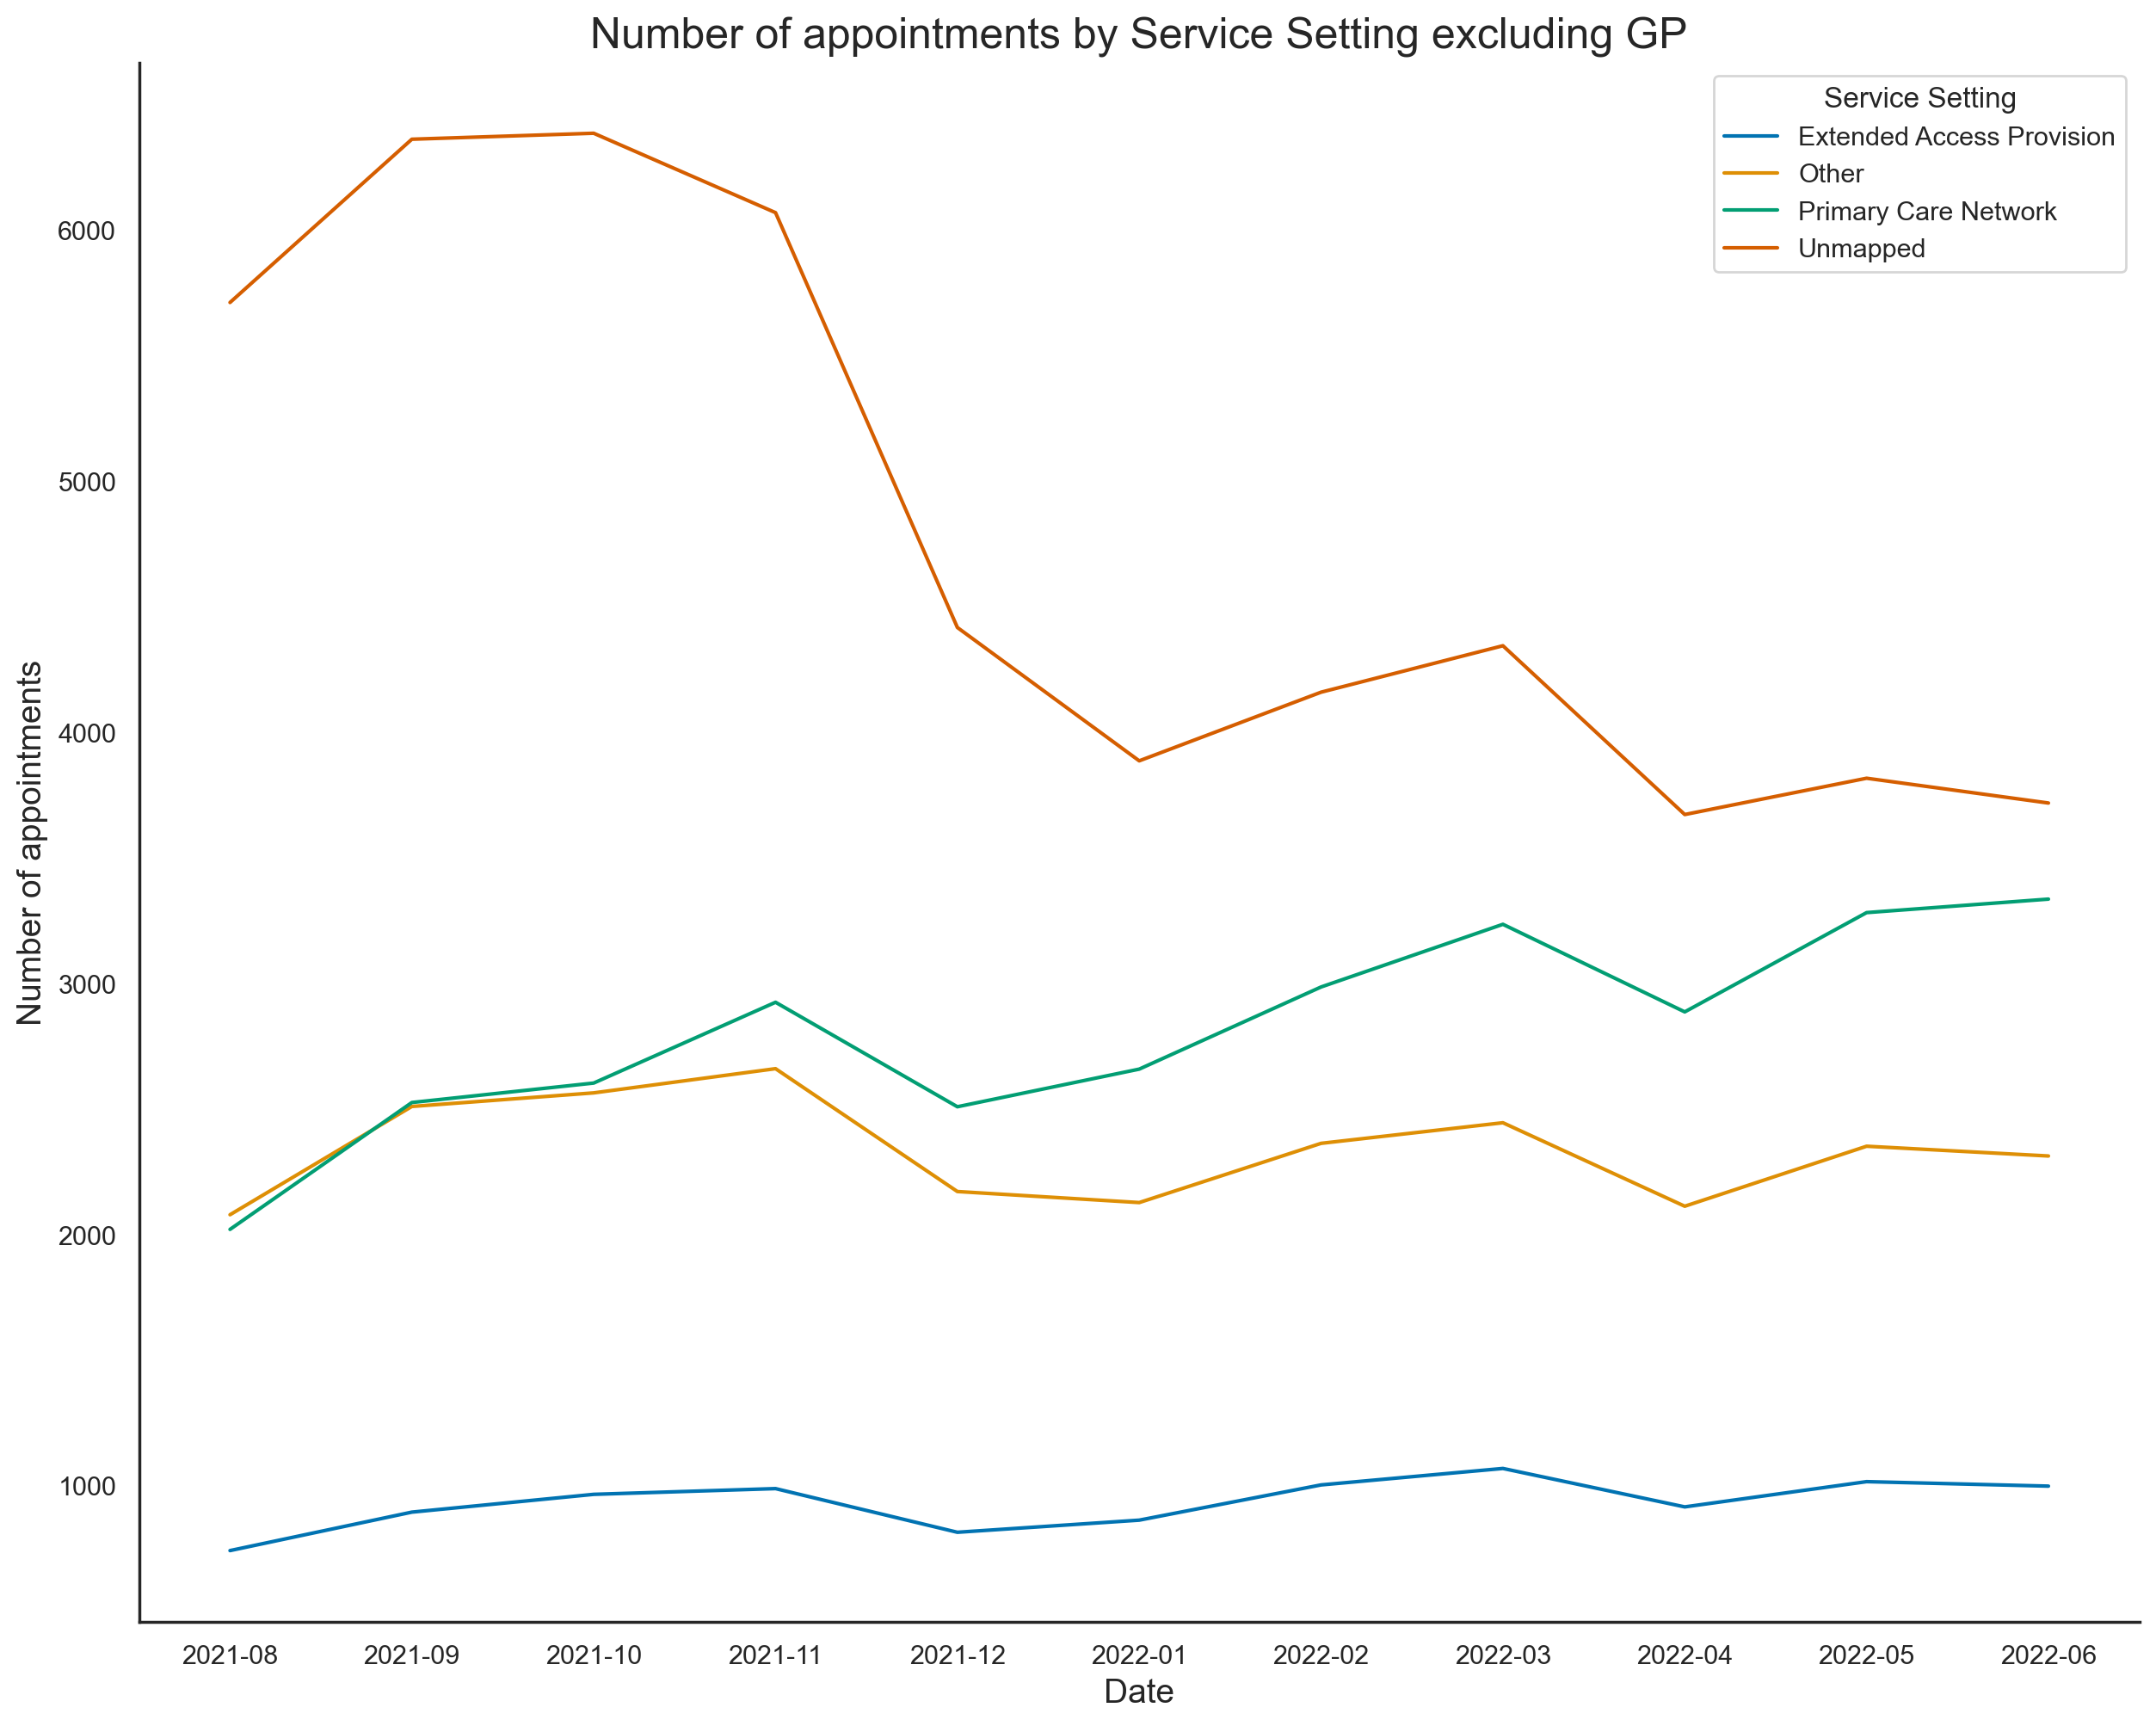

In [72]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
fig4, ax = plt.subplots(dpi=200)
sns.lineplot(data=nc_agg_noGP, x='appointment_month', y='count_of_appointments', 
             hue='service_setting', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by Service Setting excluding GP', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig4)

# Edit the legend
plt.legend(loc='upper right', title='Service Setting')

# View the plot and save an image.
plt.show()
fig4.savefig('Number of appointments by Service Setting excluding GP.jpg')

> We can clearly see most of the appointments are booked for a GP, which could be a sign that resources are not well distributed and GPs need more staff to cope with the number of appointments.

> The next service setting most used is "Unmapped", which makes difficult to potentially reassign staff if we don't know where they are needed. Therefore, as we have seen previously with other variables, the data quality is limited to draw firm conclusions.

##### Let's check if this is still true in the busiest region: MIDLANDS COMMISSIONING REGION.

In [73]:
# Subset the nc dataset by the busiest region and determine the number of appointments recorded for each service setting.
nc_subset = nc[nc['Region Name'] == 'MIDLANDS COMMISSIONING REGION']\
.groupby(['service_setting', 'Region Name'])[['count_of_appointments']].sum()\
.sort_values('count_of_appointments', ascending=False)\
.reset_index()

# Add a column to show percentages.
nc_subset['%'] = (nc_subset['count_of_appointments'] / nc_subset['count_of_appointments'].sum()) * 100

# View the output.
nc_subset.round(2)

service_setting                    Region Name  \
0           General Practice  MIDLANDS COMMISSIONING REGION   
1                   Unmapped  MIDLANDS COMMISSIONING REGION   
2       Primary Care Network  MIDLANDS COMMISSIONING REGION   
3                      Other  MIDLANDS COMMISSIONING REGION   
4  Extended Access Provision  MIDLANDS COMMISSIONING REGION   

   count_of_appointments      %  
0               52585341  91.69  
1                2139454   3.73  
2                1137586   1.98  
3                1107263   1.93  
4                 382685   0.67

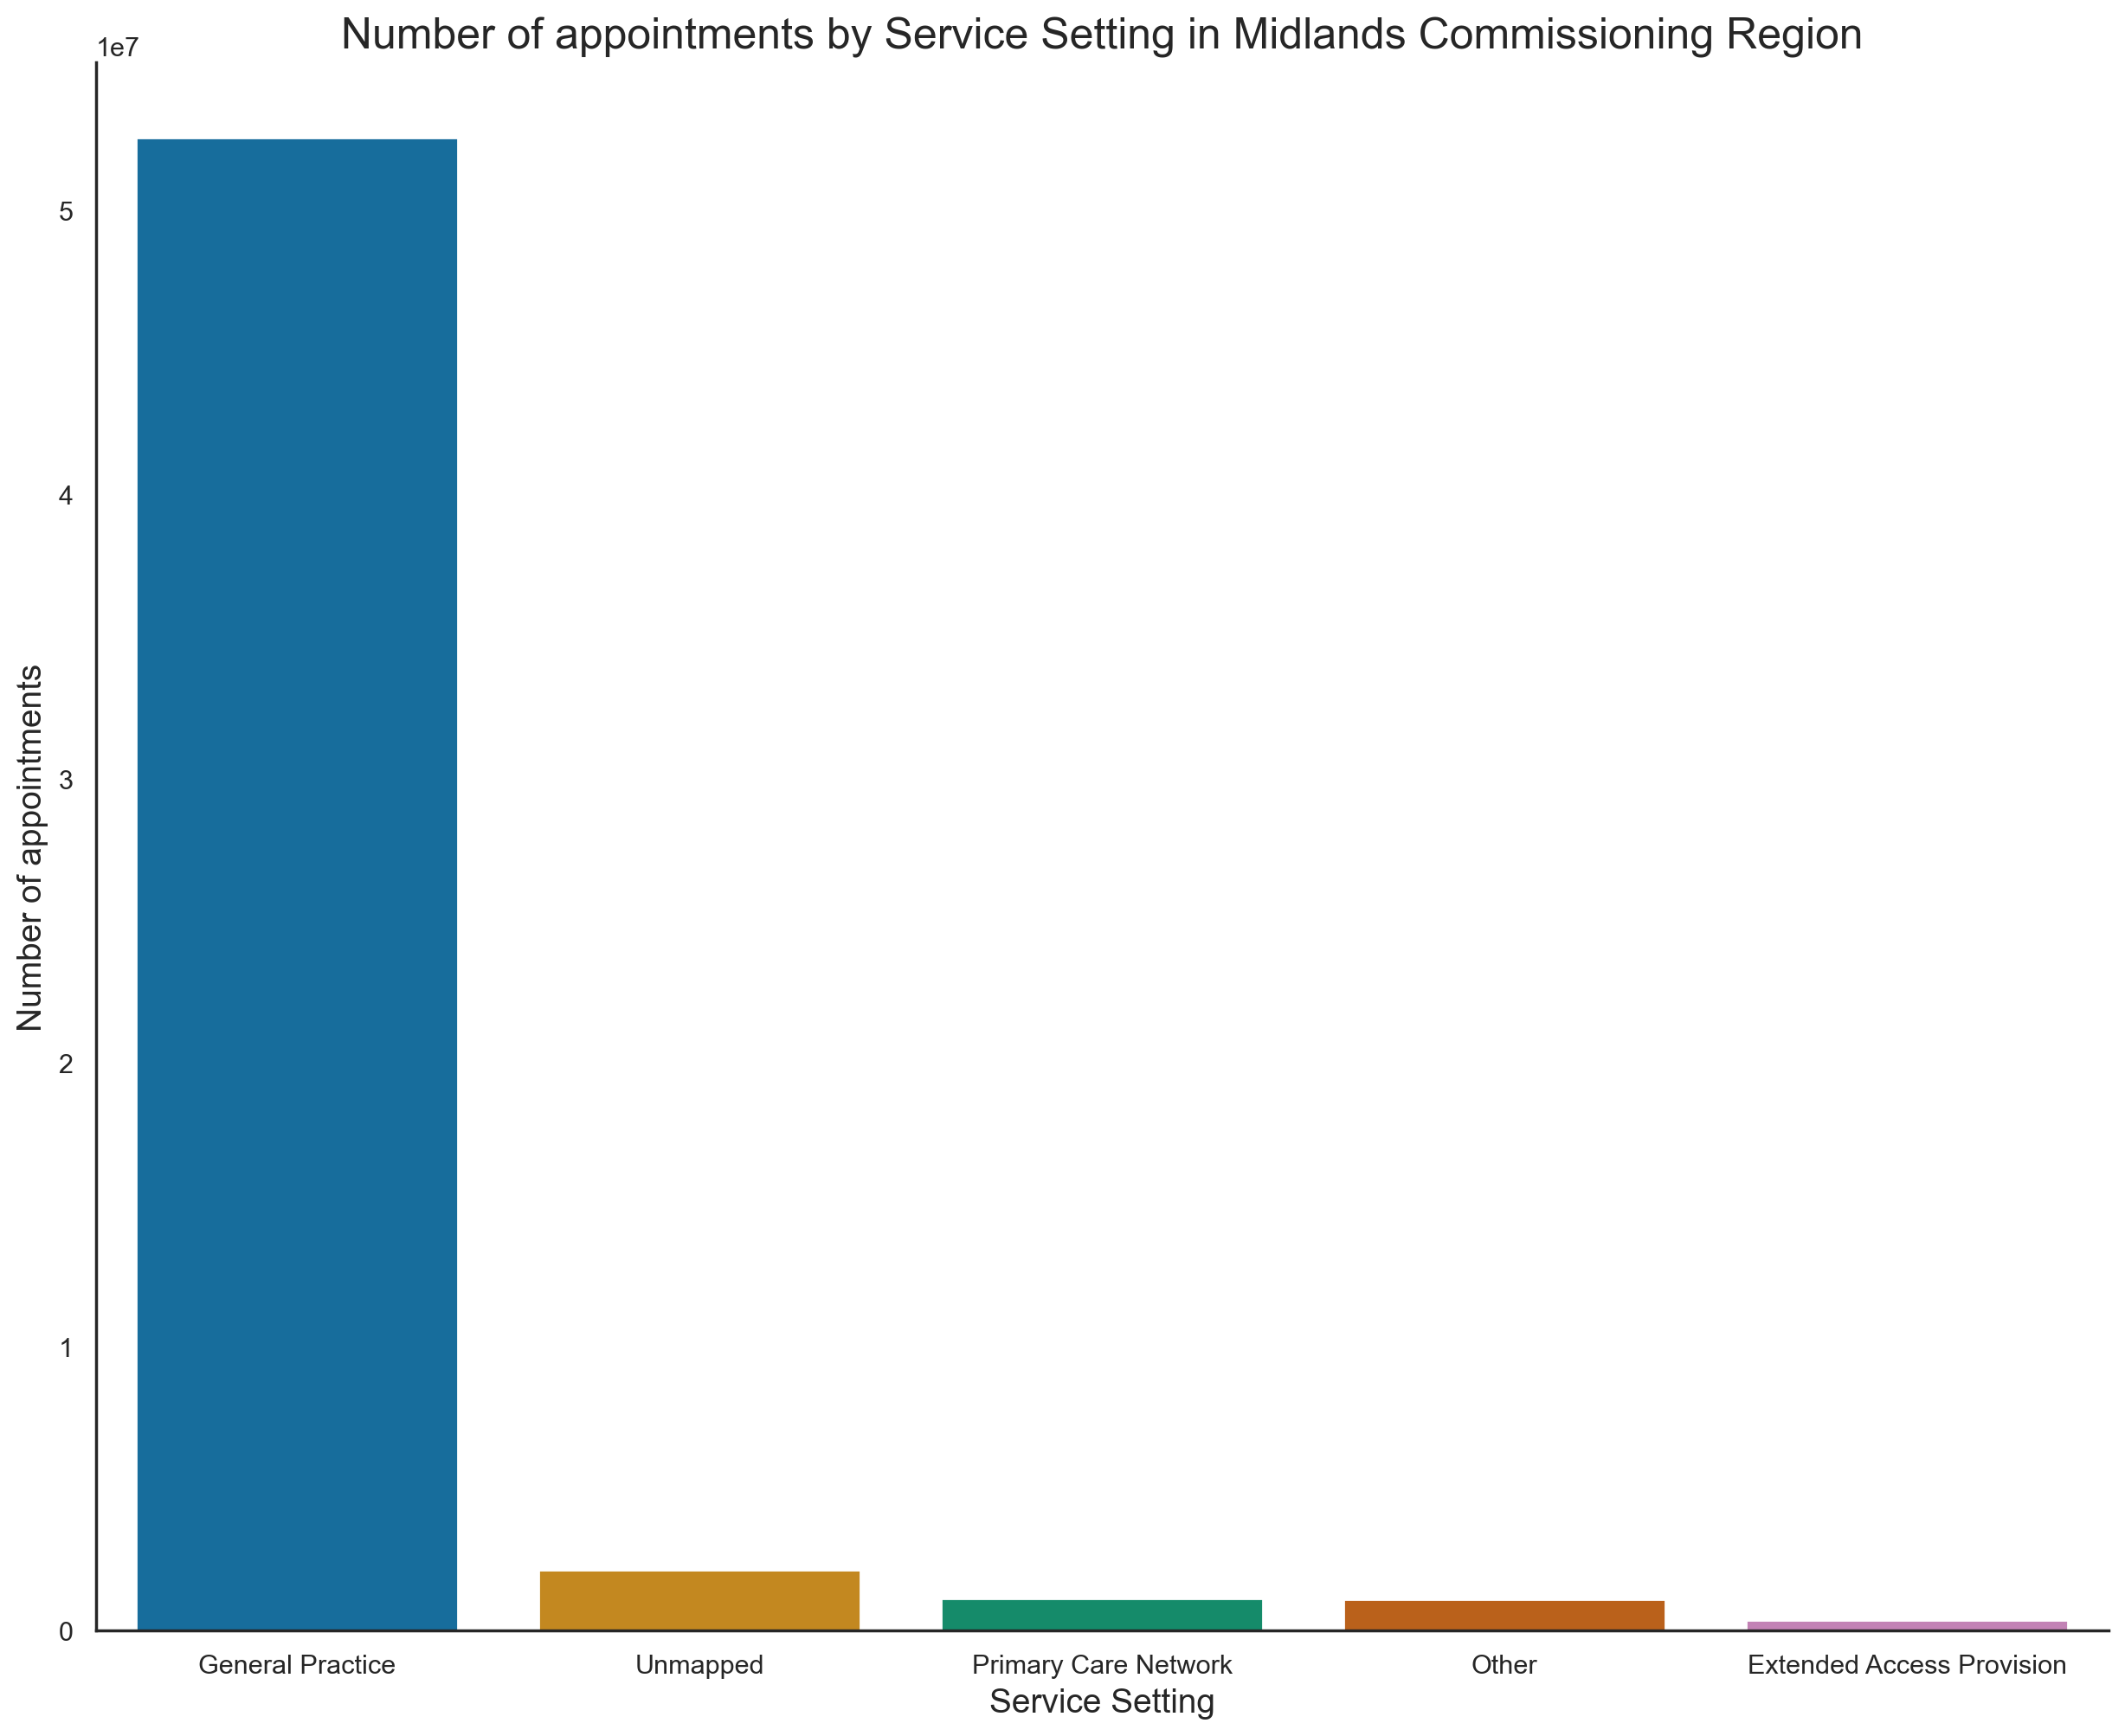

In [74]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
fig5, ax = plt.subplots(dpi=200)
sns.barplot(data=nc_subset, x='service_setting', y='count_of_appointments')

# Label axes and add a title
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by Service Setting in Midlands Commissioning Region', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig5)

# View the plot and save an image.
plt.show()
fig5.savefig('Number of appointments by Service Setting in Midlands Commissioning Region.jpg')

> The General Practice service setting is clearly the most busiest.

### Appointment patterns over time
#### Question: are there any appointment patters over the duration of a month?

#### Let's look at the busiest month to answer this question: November 2021 with 30.405.070 appointments as per earlier calculations. 

In [75]:
# Create a separate data set. 
nc_app_monthly = nc.groupby([nc['appointment_month'], nc['appointment_date'].dt.day])\
[['count_of_appointments']]\
.sum().reset_index()

# View output.
nc_app_monthly

appointment_month  appointment_date  count_of_appointments
0             2021-08                 1                   5627
1             2021-08                 2                1222768
2             2021-08                 3                1169920
3             2021-08                 4                1093532
4             2021-08                 5                1074043
..                ...               ...                    ...
329           2022-06                26                   6574
330           2022-06                27                1410883
331           2022-06                28                1335598
332           2022-06                29                1237258
333           2022-06                30                1226746

[334 rows x 3 columns]

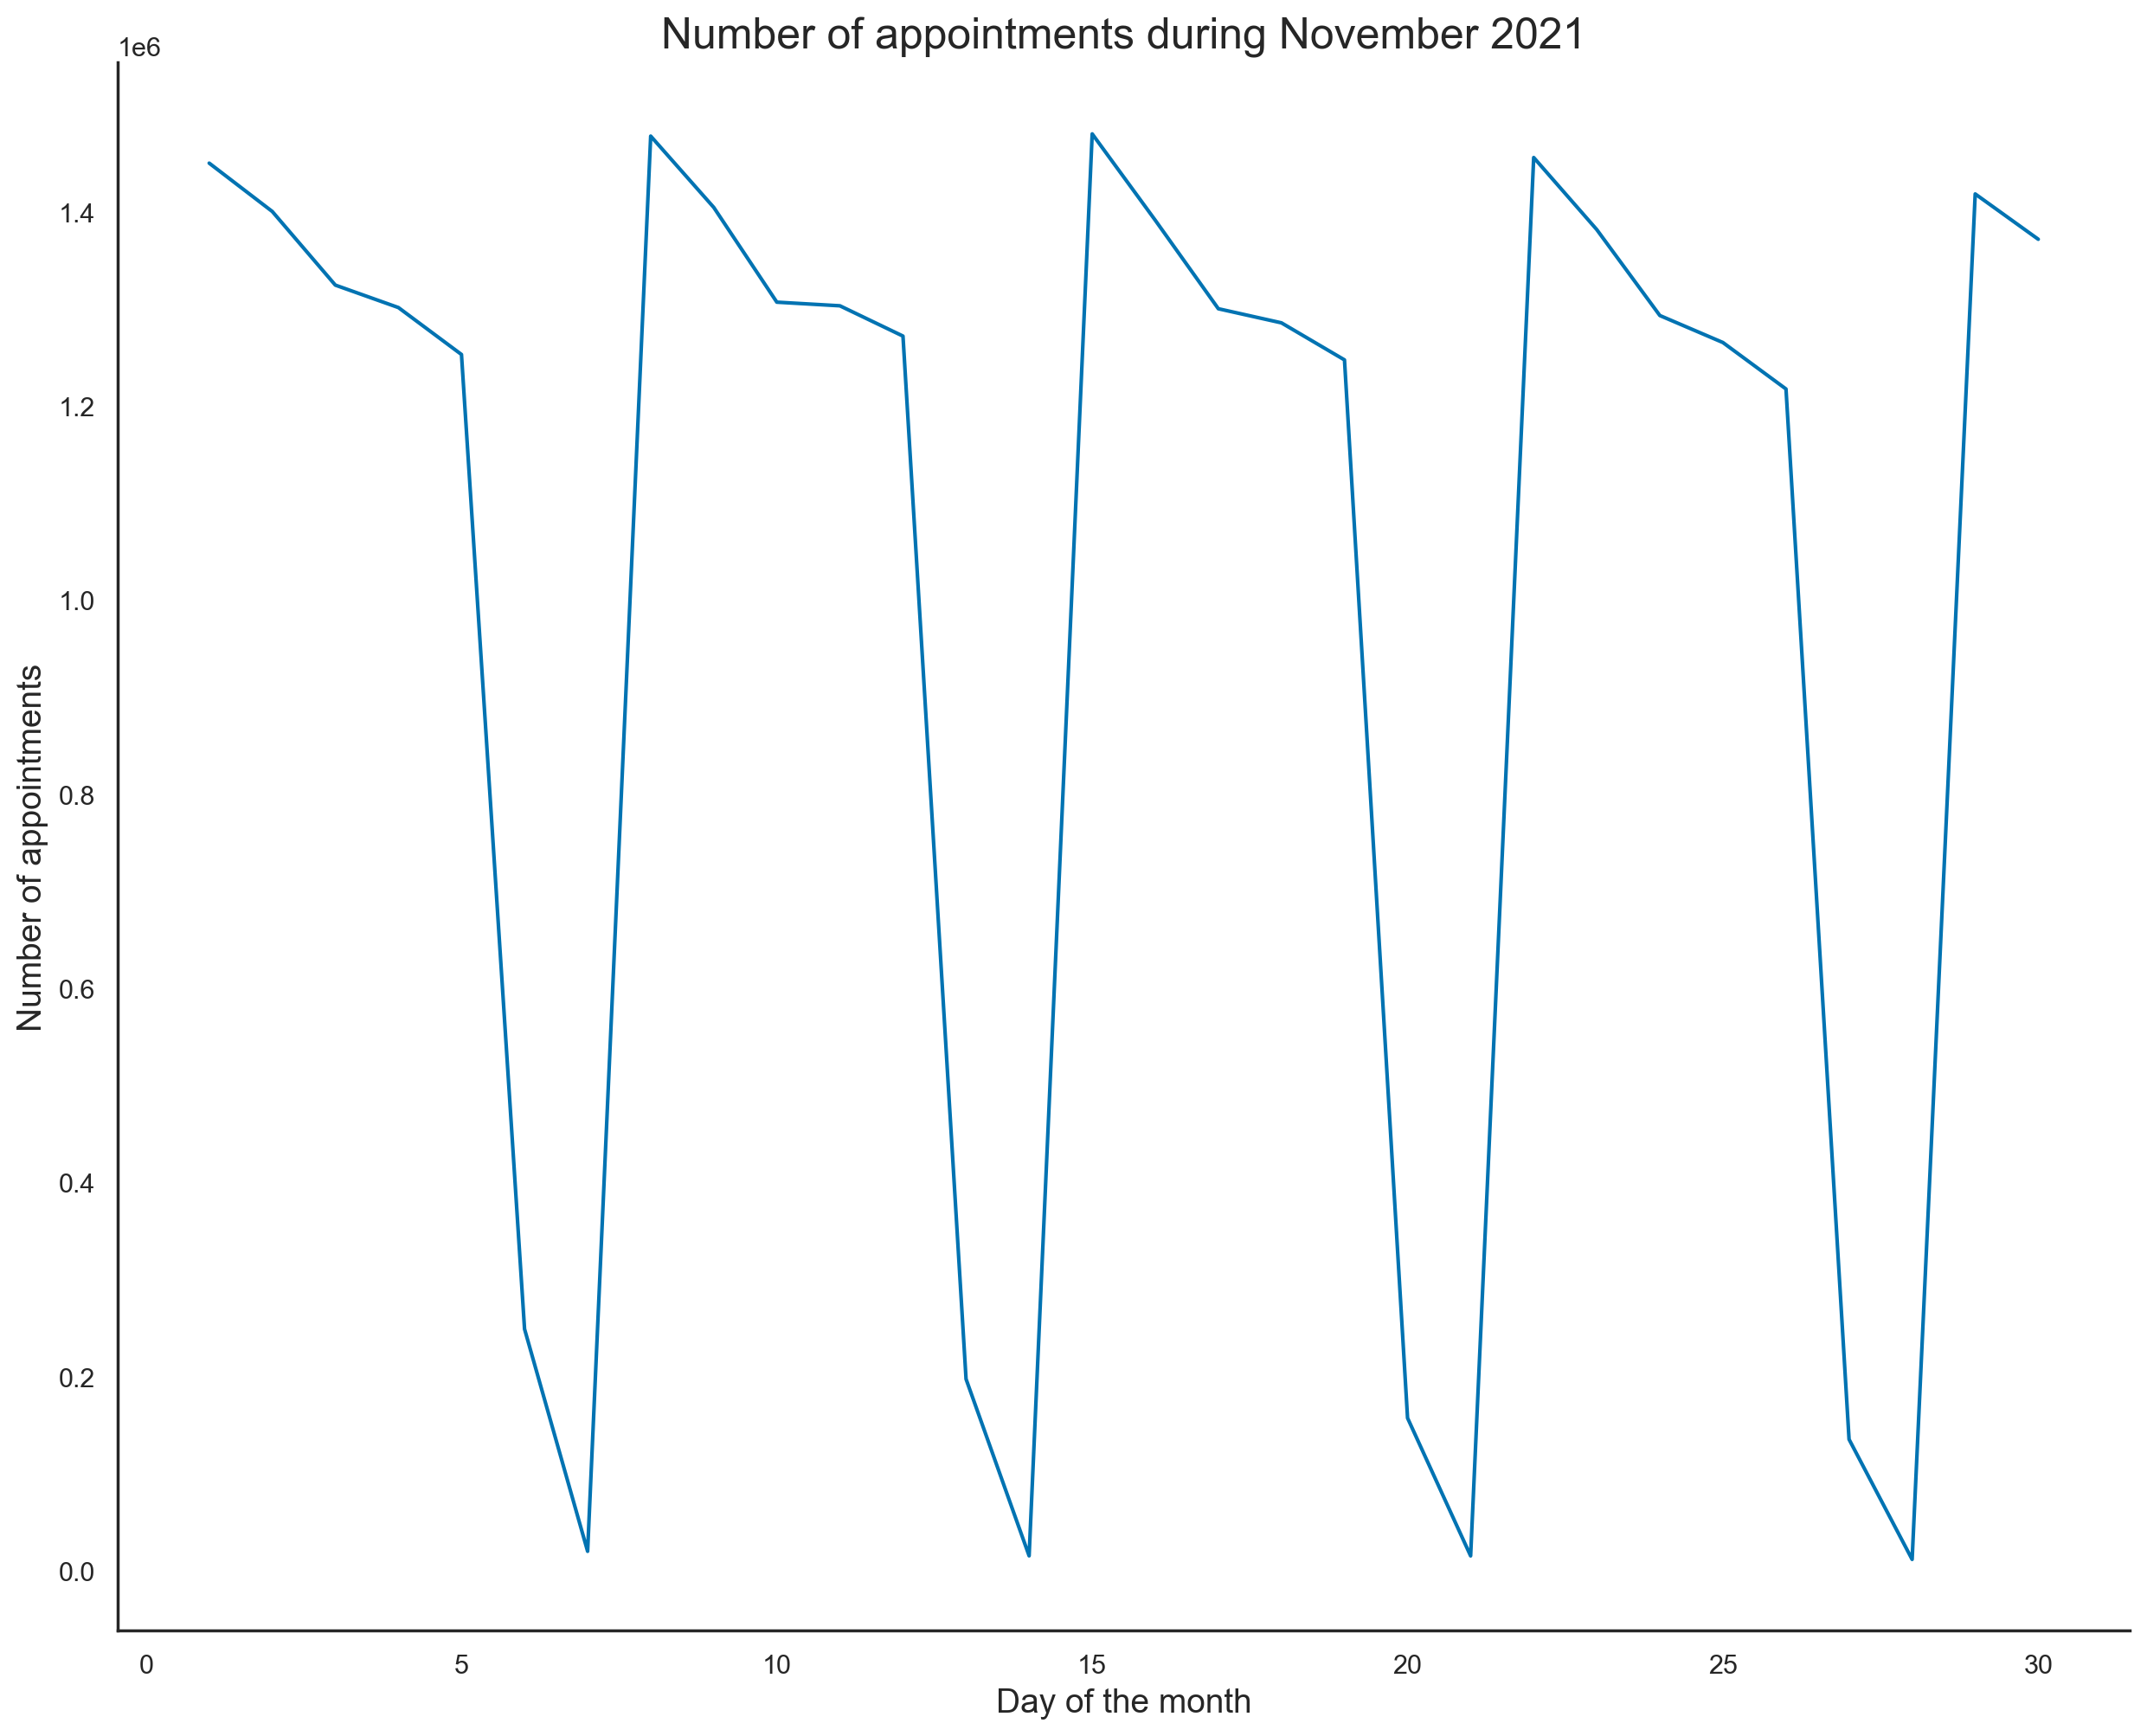

In [76]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
fig6, ax = plt.subplots(dpi=200)
sns.lineplot(data=nc_app_monthly[nc_app_monthly['appointment_month'] == '2021-11'], x='appointment_date',
             y='count_of_appointments', ci=None)

# Label axes and add a title
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments during November 2021', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig6)

# View the plot and save an image.
plt.show()
fig6.savefig('Number of appointments during November 2021.jpg')

> We can clearly see weekdays are the busiest compared to weekends. Could we look at which days are the busiest generally?

### Appointment patterns over time
#### Question: are there any trends on the appointments by the day of the week? 

In [77]:
# Create a separate data set to look into the the appointments by day of the week by service setting. 
nc_ss_day = nc.groupby([nc['weekday'], nc['service_setting']])[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending=False)\
.reset_index()

# View output.
nc_ss_day

weekday            service_setting  count_of_appointments
0     Tuesday           General Practice               56529751
1      Monday           General Practice               54794619
2   Wednesday           General Practice               53980690
3    Thursday           General Practice               52084657
4      Friday           General Practice               48099601
5    Saturday           General Practice                4856121
6     Tuesday                   Unmapped                2297314
7   Wednesday                   Unmapped                2192101
8      Monday                   Unmapped                2186973
9    Thursday                   Unmapped                2144069
10     Friday                   Unmapped                1944078
11    Tuesday       Primary Care Network                1409682
12  Wednesday       Primary Care Network                1324053
13   Thursday       Primary Care Network                1302133
14     Monday       Primary Care Network                1235618
15    Tuesday                      Other                1130256
16  Wednesday                      Other                1081917
17     Friday       Primary Care Network                1077025
18     Monday                      Other                1064998
19   Thursday                      Other                1052090
20     Friday                      Other                 952925
21     Sunday           General Practice                 466252
22    Tuesday  Extended Access Provision                 439930
23     Monday  Extended Access Provision                 413059
24  Wednesday  Extended Access Provision                 405504
25   Thursday  Extended Access Provision                 393405
26     Friday  Extended Access Provision                 321239
27   Saturday                   Unmapped                 253153
28   Saturday       Primary Care Network                 178744
29   Saturday  Extended Access Provision                 173617
30   Saturday                      Other                 113287
31     Sunday                   Unmapped                  63122
32     Sunday       Primary Care Network                  30131
33     Sunday  Extended Access Provision                  30053
34     Sunday                      Other                  24603

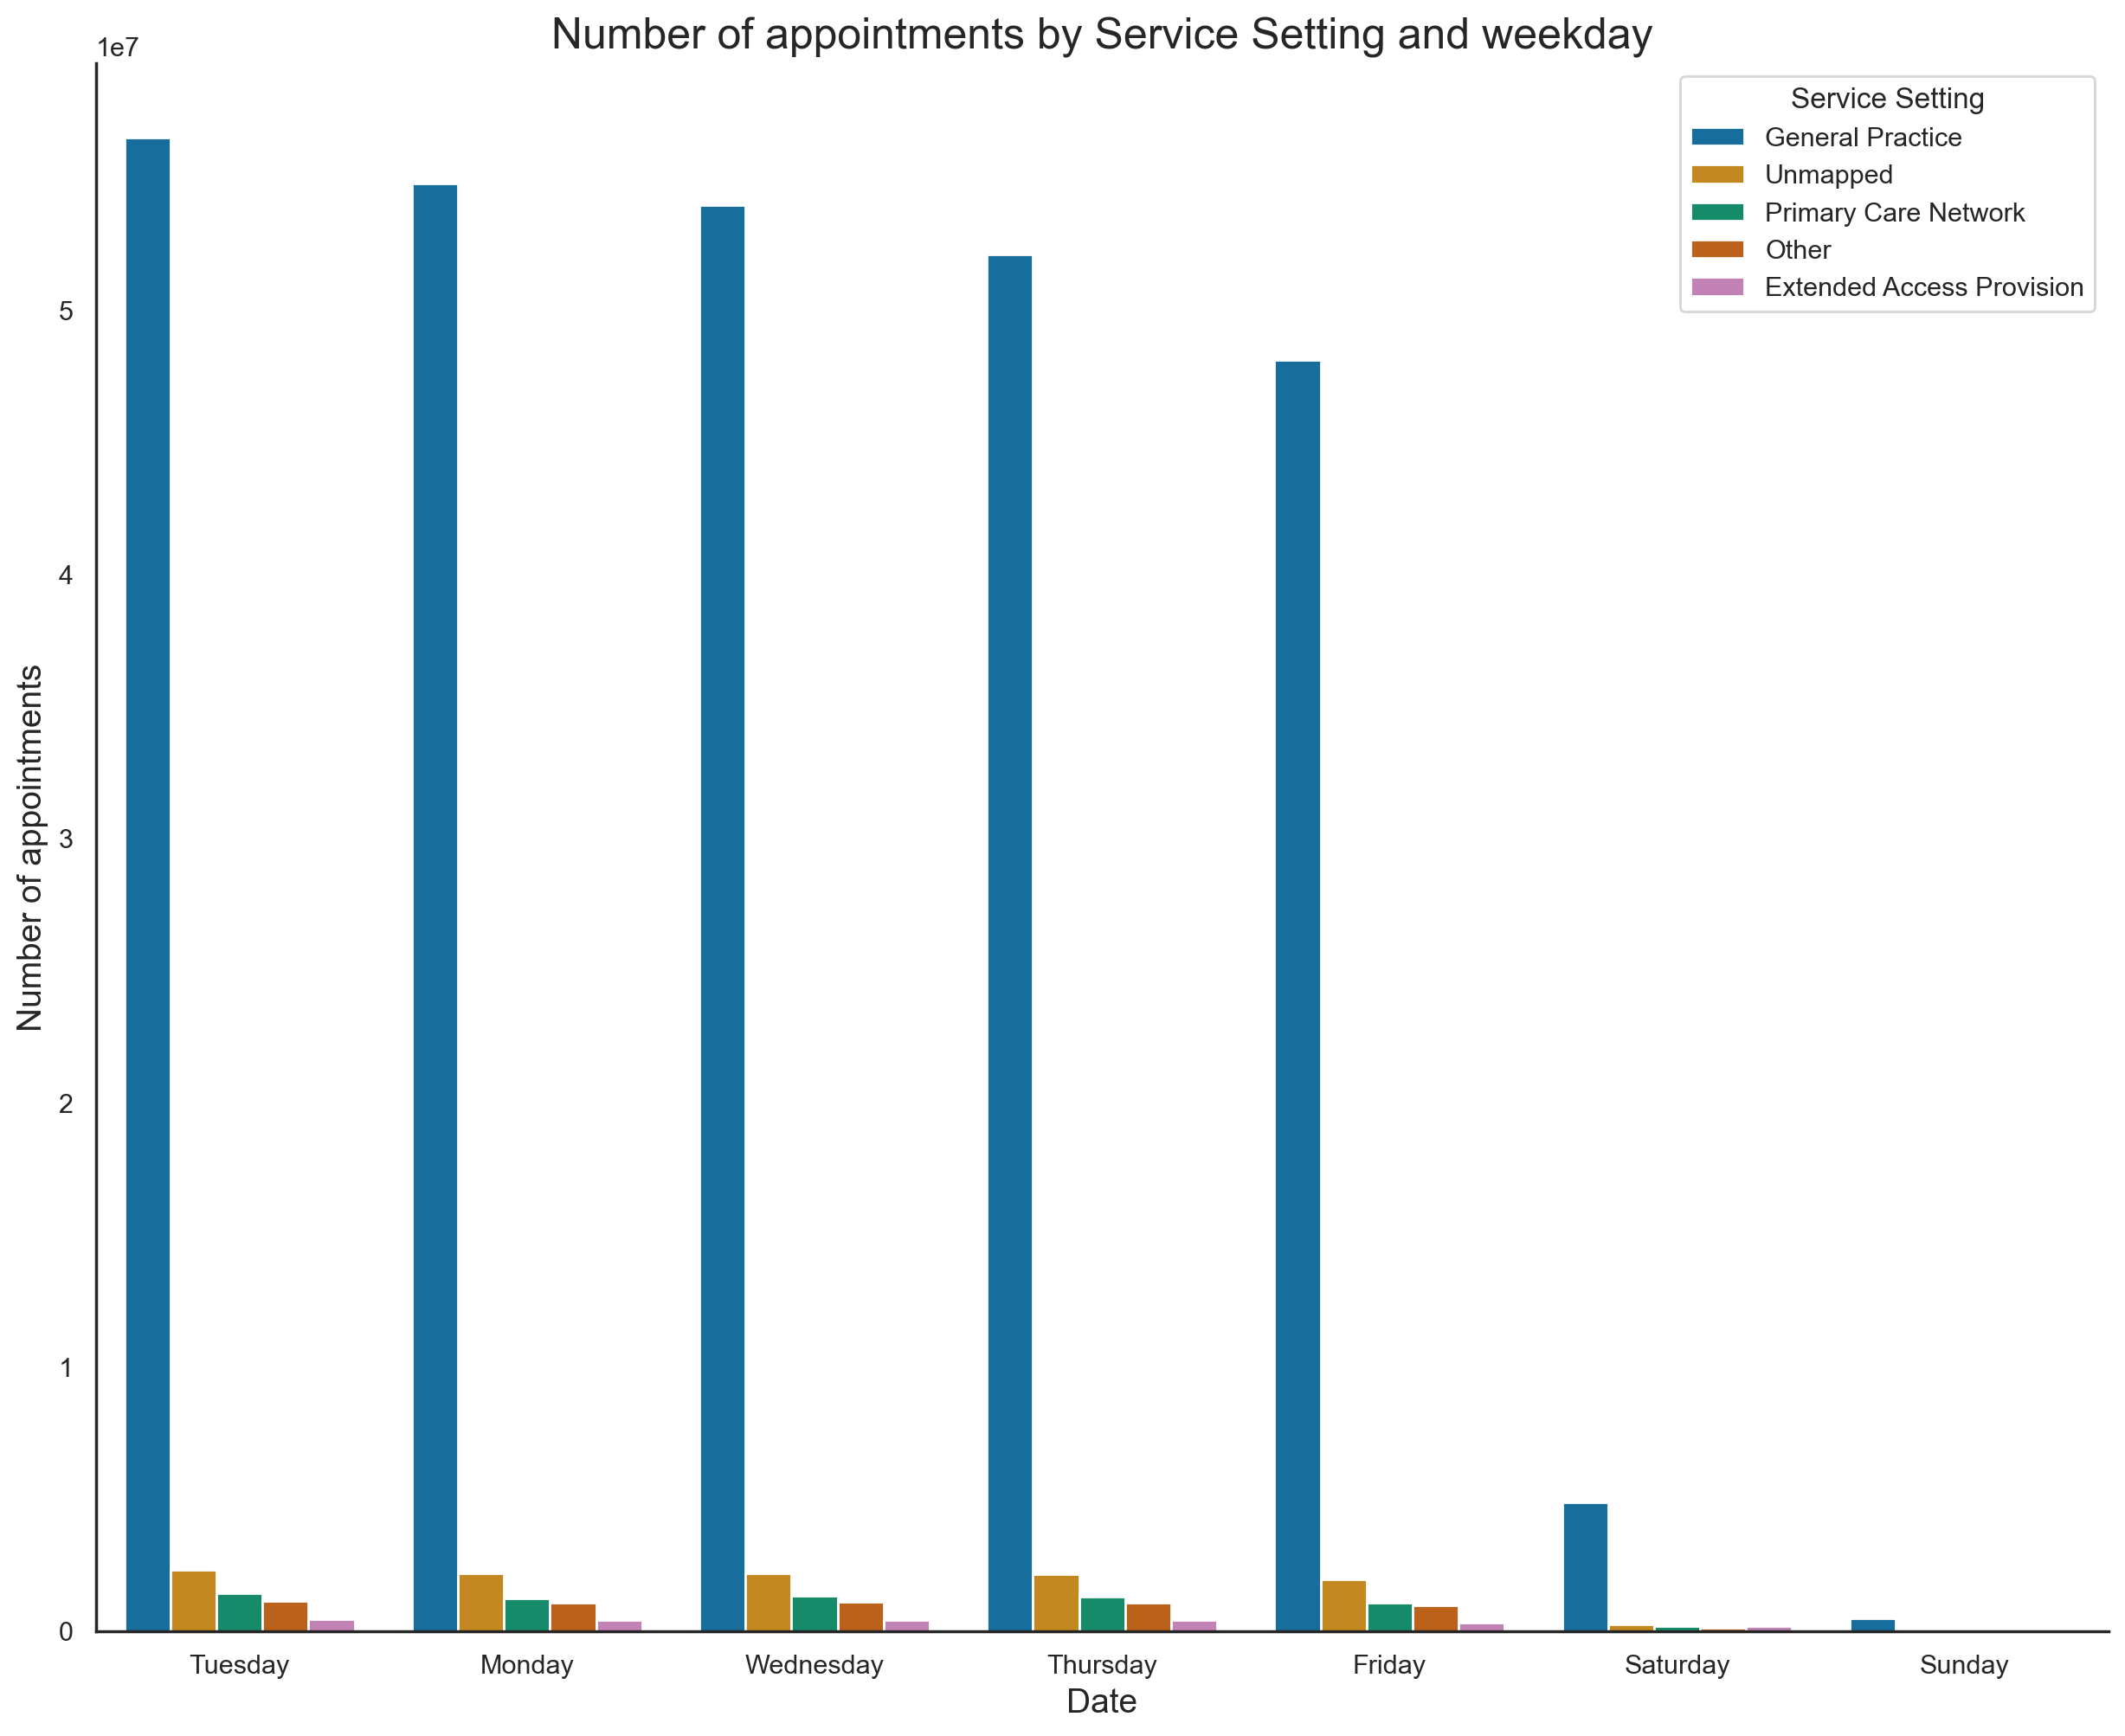

In [78]:
# Create a visualisation to look for patterns.
# Create a lineplot.
fig7, ax = plt.subplots(dpi=200)
sns.barplot(data=nc_ss_day, x='weekday', y='count_of_appointments', hue='service_setting', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by Service Setting and weekday', fontsize=18)

# Edit the legend
plt.legend(loc='upper right', title='Service Setting')

# Remove the top and right spines from the plot.
sns.despine(fig7)

# View the plot and save an image.
plt.show()
fig7.savefig('Number of appointments by Service Setting and weekday.jpg')

> Let's have a look at the GP isolated since we know is the service setting with the most amount of appointments.

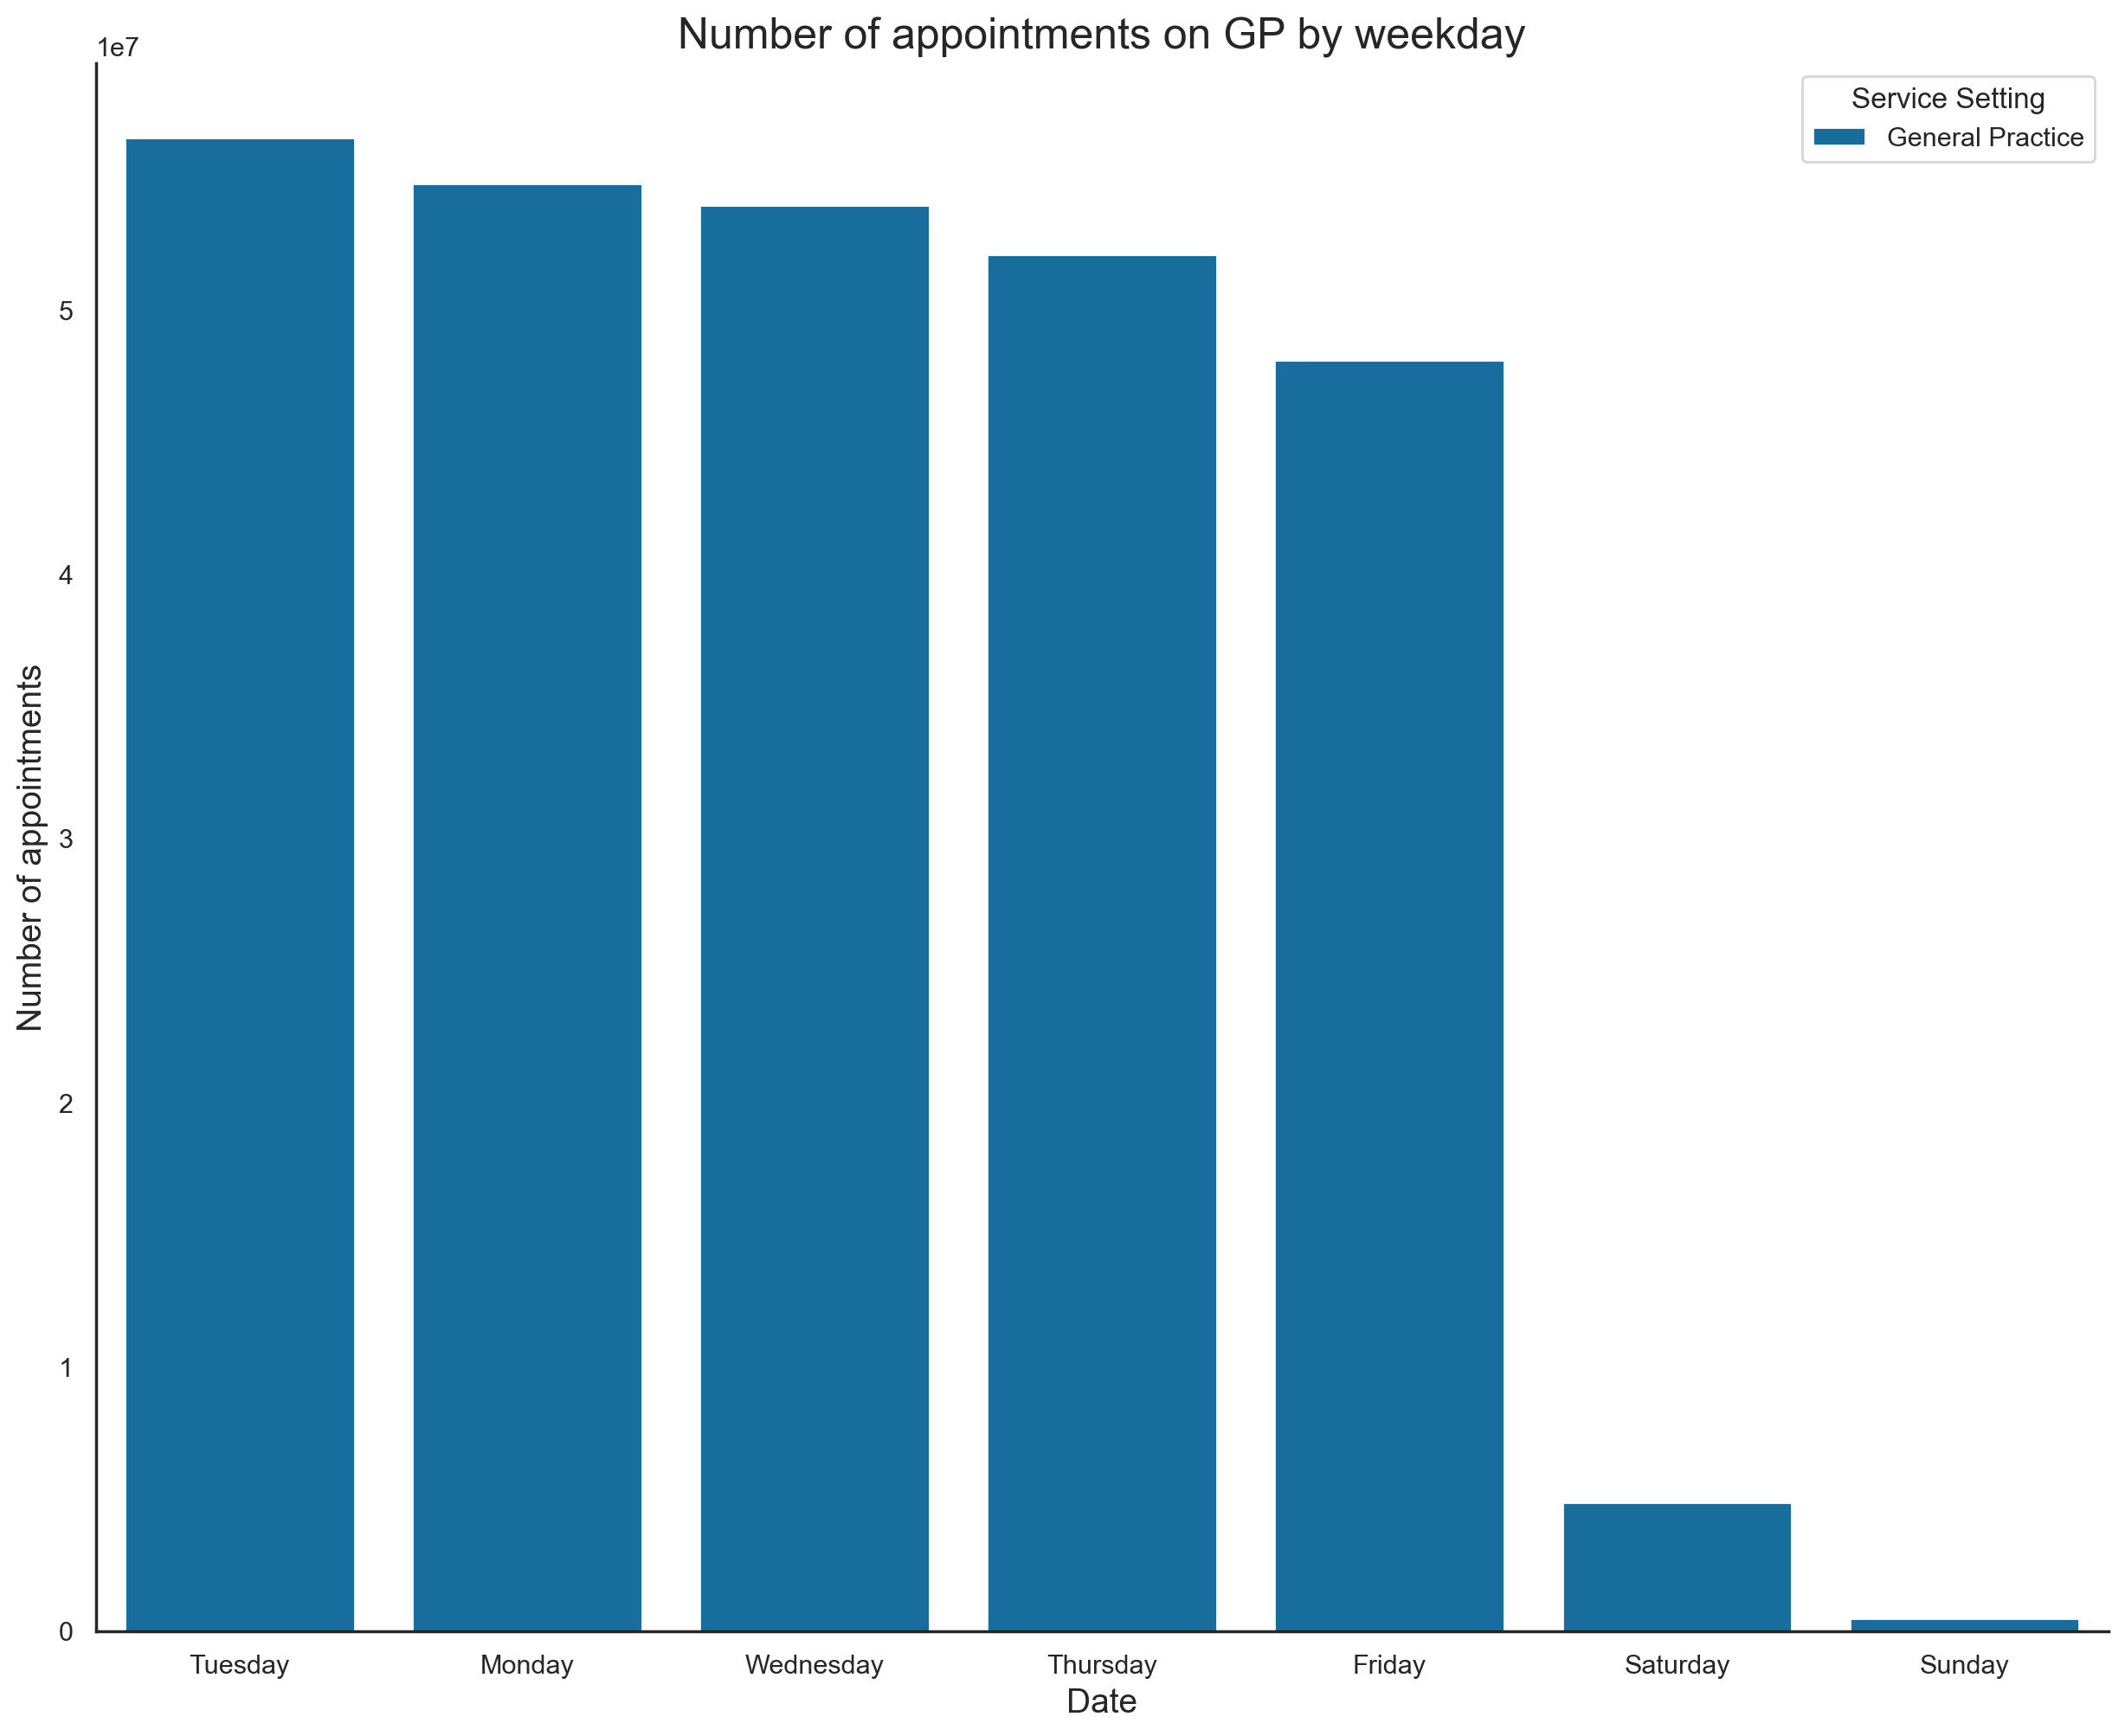

In [79]:
# Create a visualisation to look for patterns.
# Create a lineplot.
fig8, ax = plt.subplots(dpi=200)
sns.barplot(data=nc_ss_day[nc_ss_day['service_setting'] == 'General Practice'], x='weekday', 
                           y='count_of_appointments', hue='service_setting', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments on GP by weekday', fontsize=18)

# Remove the top and right spines from the plot.
sns.despine(fig8)

# Edit the legend
plt.legend(loc='upper right', title='Service Setting')

# View the plot and save an image.
plt.show()
fig8.savefig('Number of appointments on GP by weekday.jpg')

> We can clearly see the beginning of the week is much busier than the end of the week. Actually probably we are getting a lower number on Monday due to bank holidays.

### Location
#### Q: are there any trends on the appointments by NHS regions?

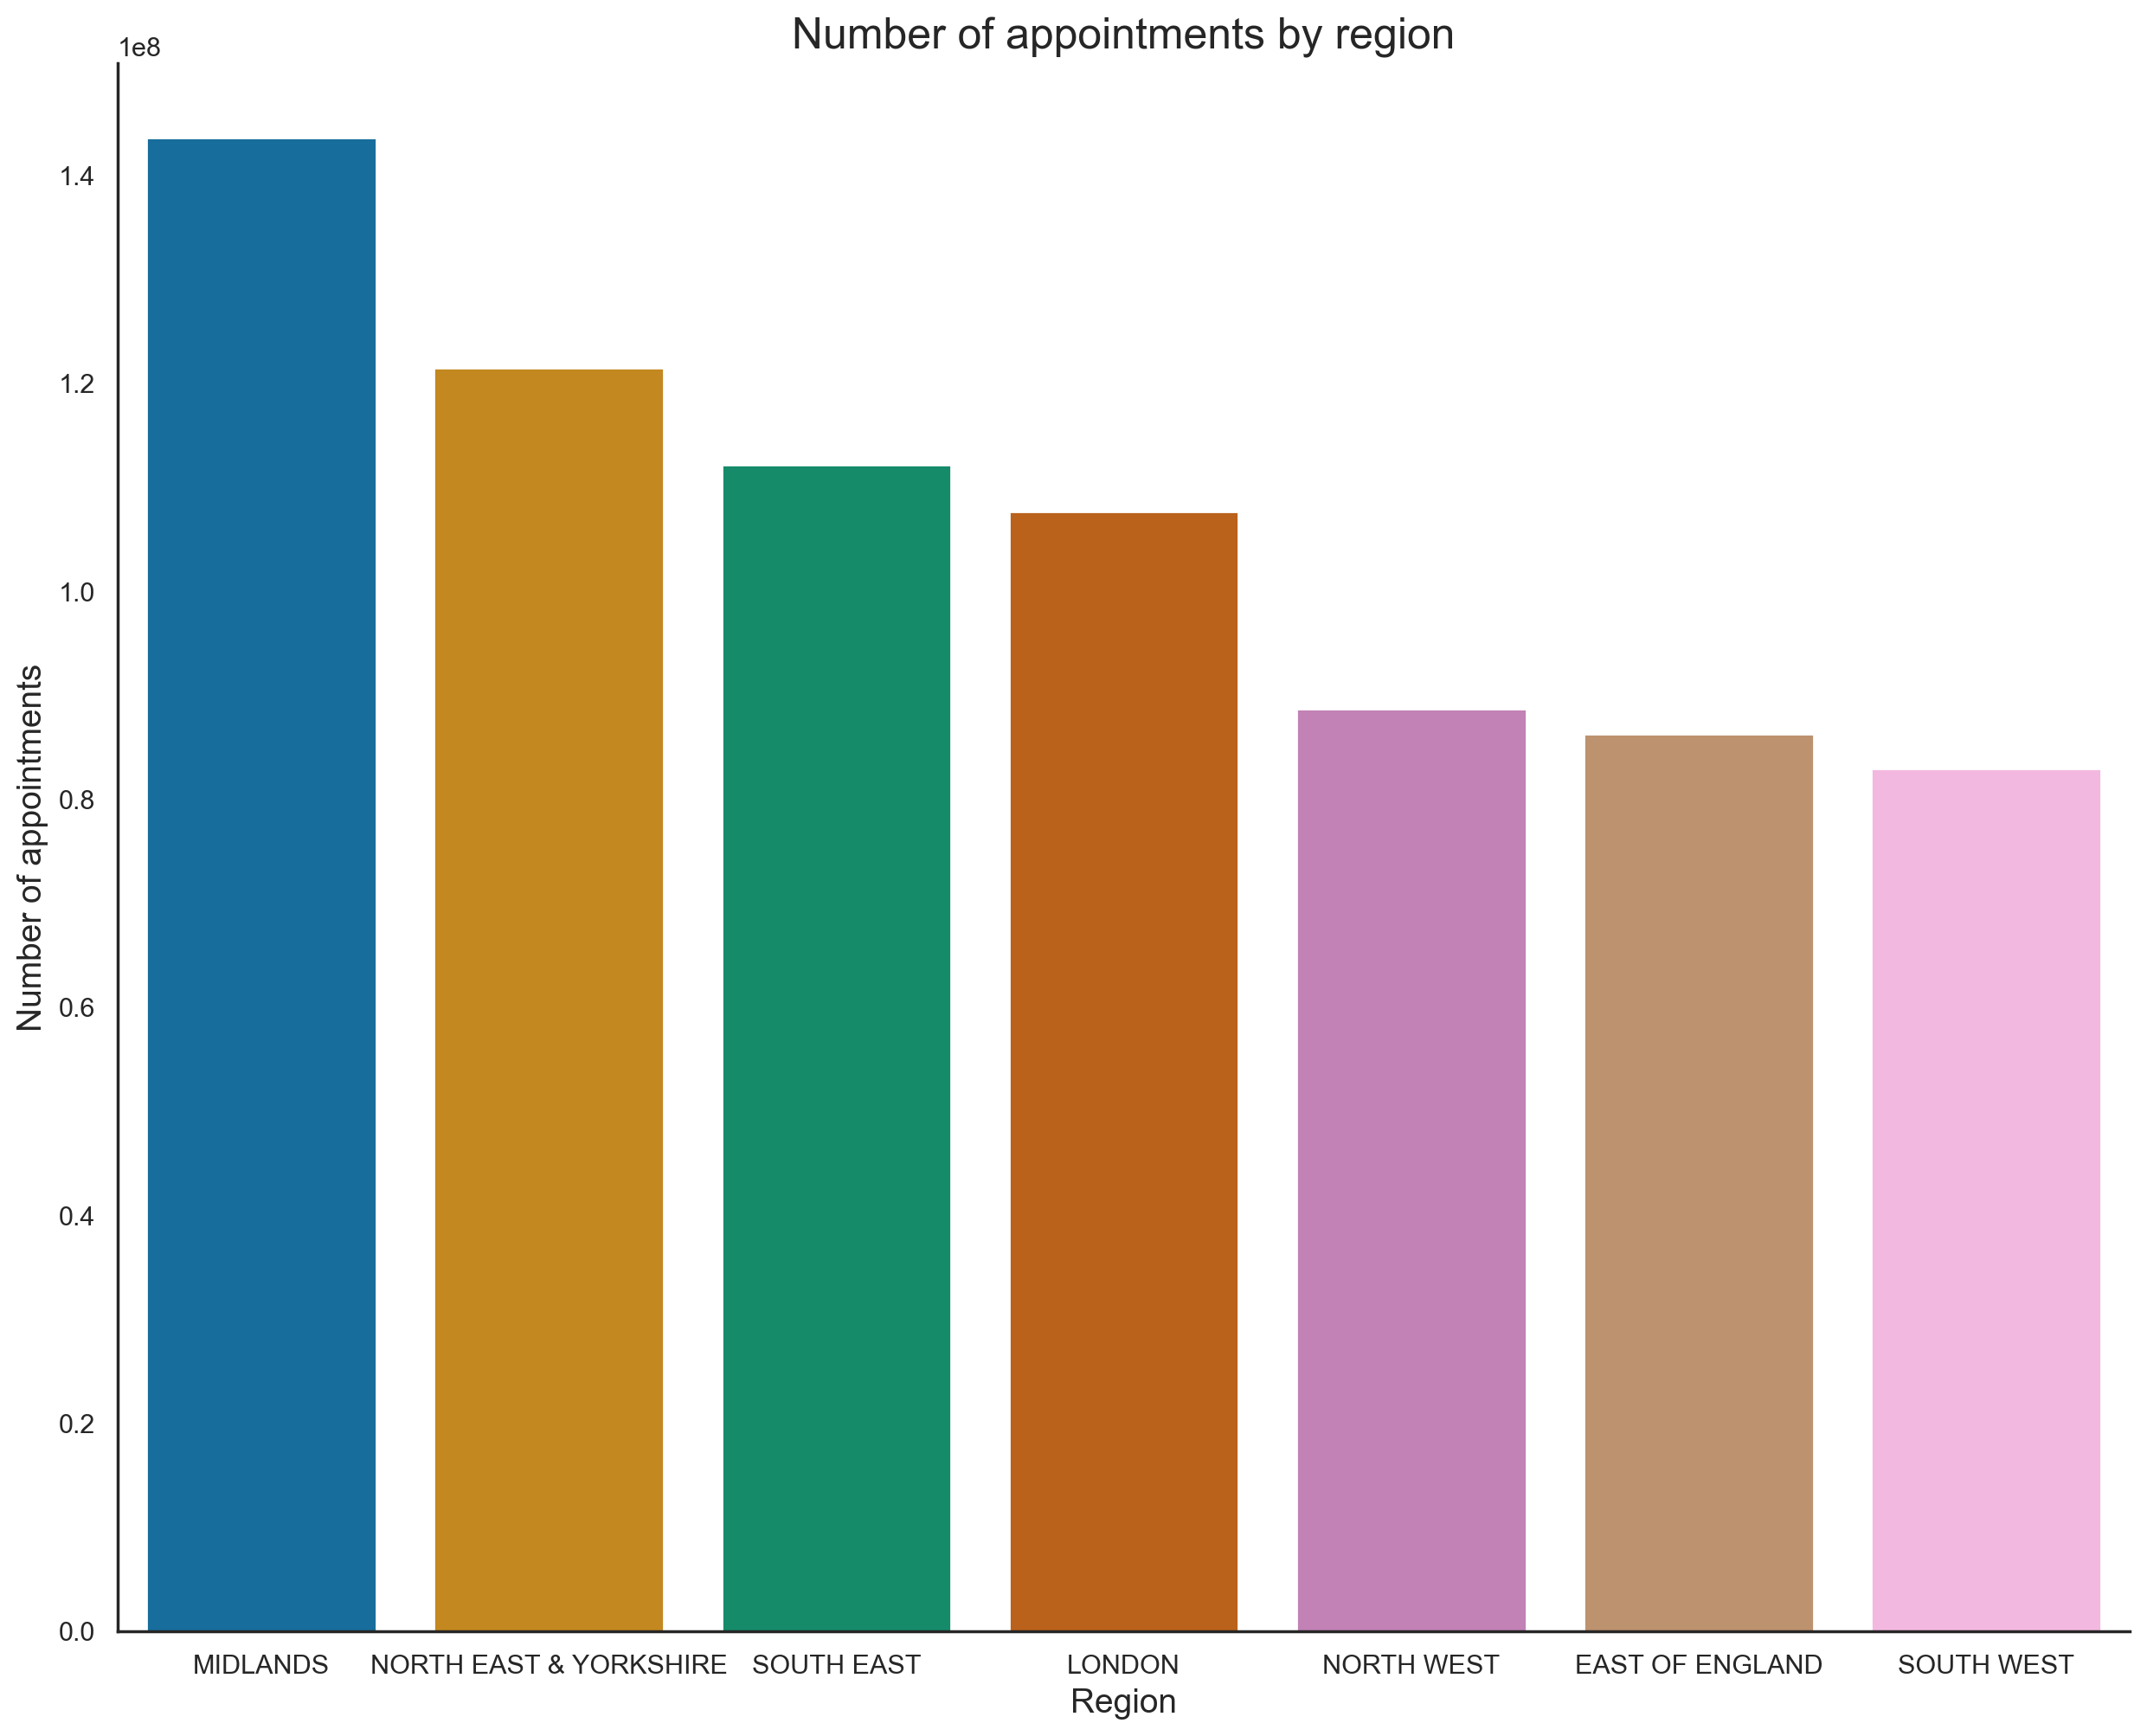

In [80]:
# Create a visualisation to look for patterns.
# Create a lineplot.
fig9, ax = plt.subplots(dpi=200)
sns.barplot(data=ar_rg, x='Region Name', y='count_of_appointments')

# Label axes and add a title
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of appointments', fontsize=14)
plt.title('Number of appointments by region', fontsize=18)

# Rename the ticks with shorter names.
ax.set_xticklabels(['MIDLANDS','NORTH EAST & YORKSHIRE','SOUTH EAST','LONDON','NORTH WEST','EAST OF ENGLAND','SOUTH WEST'])

# Remove the top and right spines from the plot.
sns.despine(fig9)

# View the plot and save an image.
plt.show()
fig9.savefig('Number of appointments by region.jpg')

## 2. Utilisation & Distribution of Resources

### Appointment type
#### Q: are there any trends on the appointments by the appointment type?

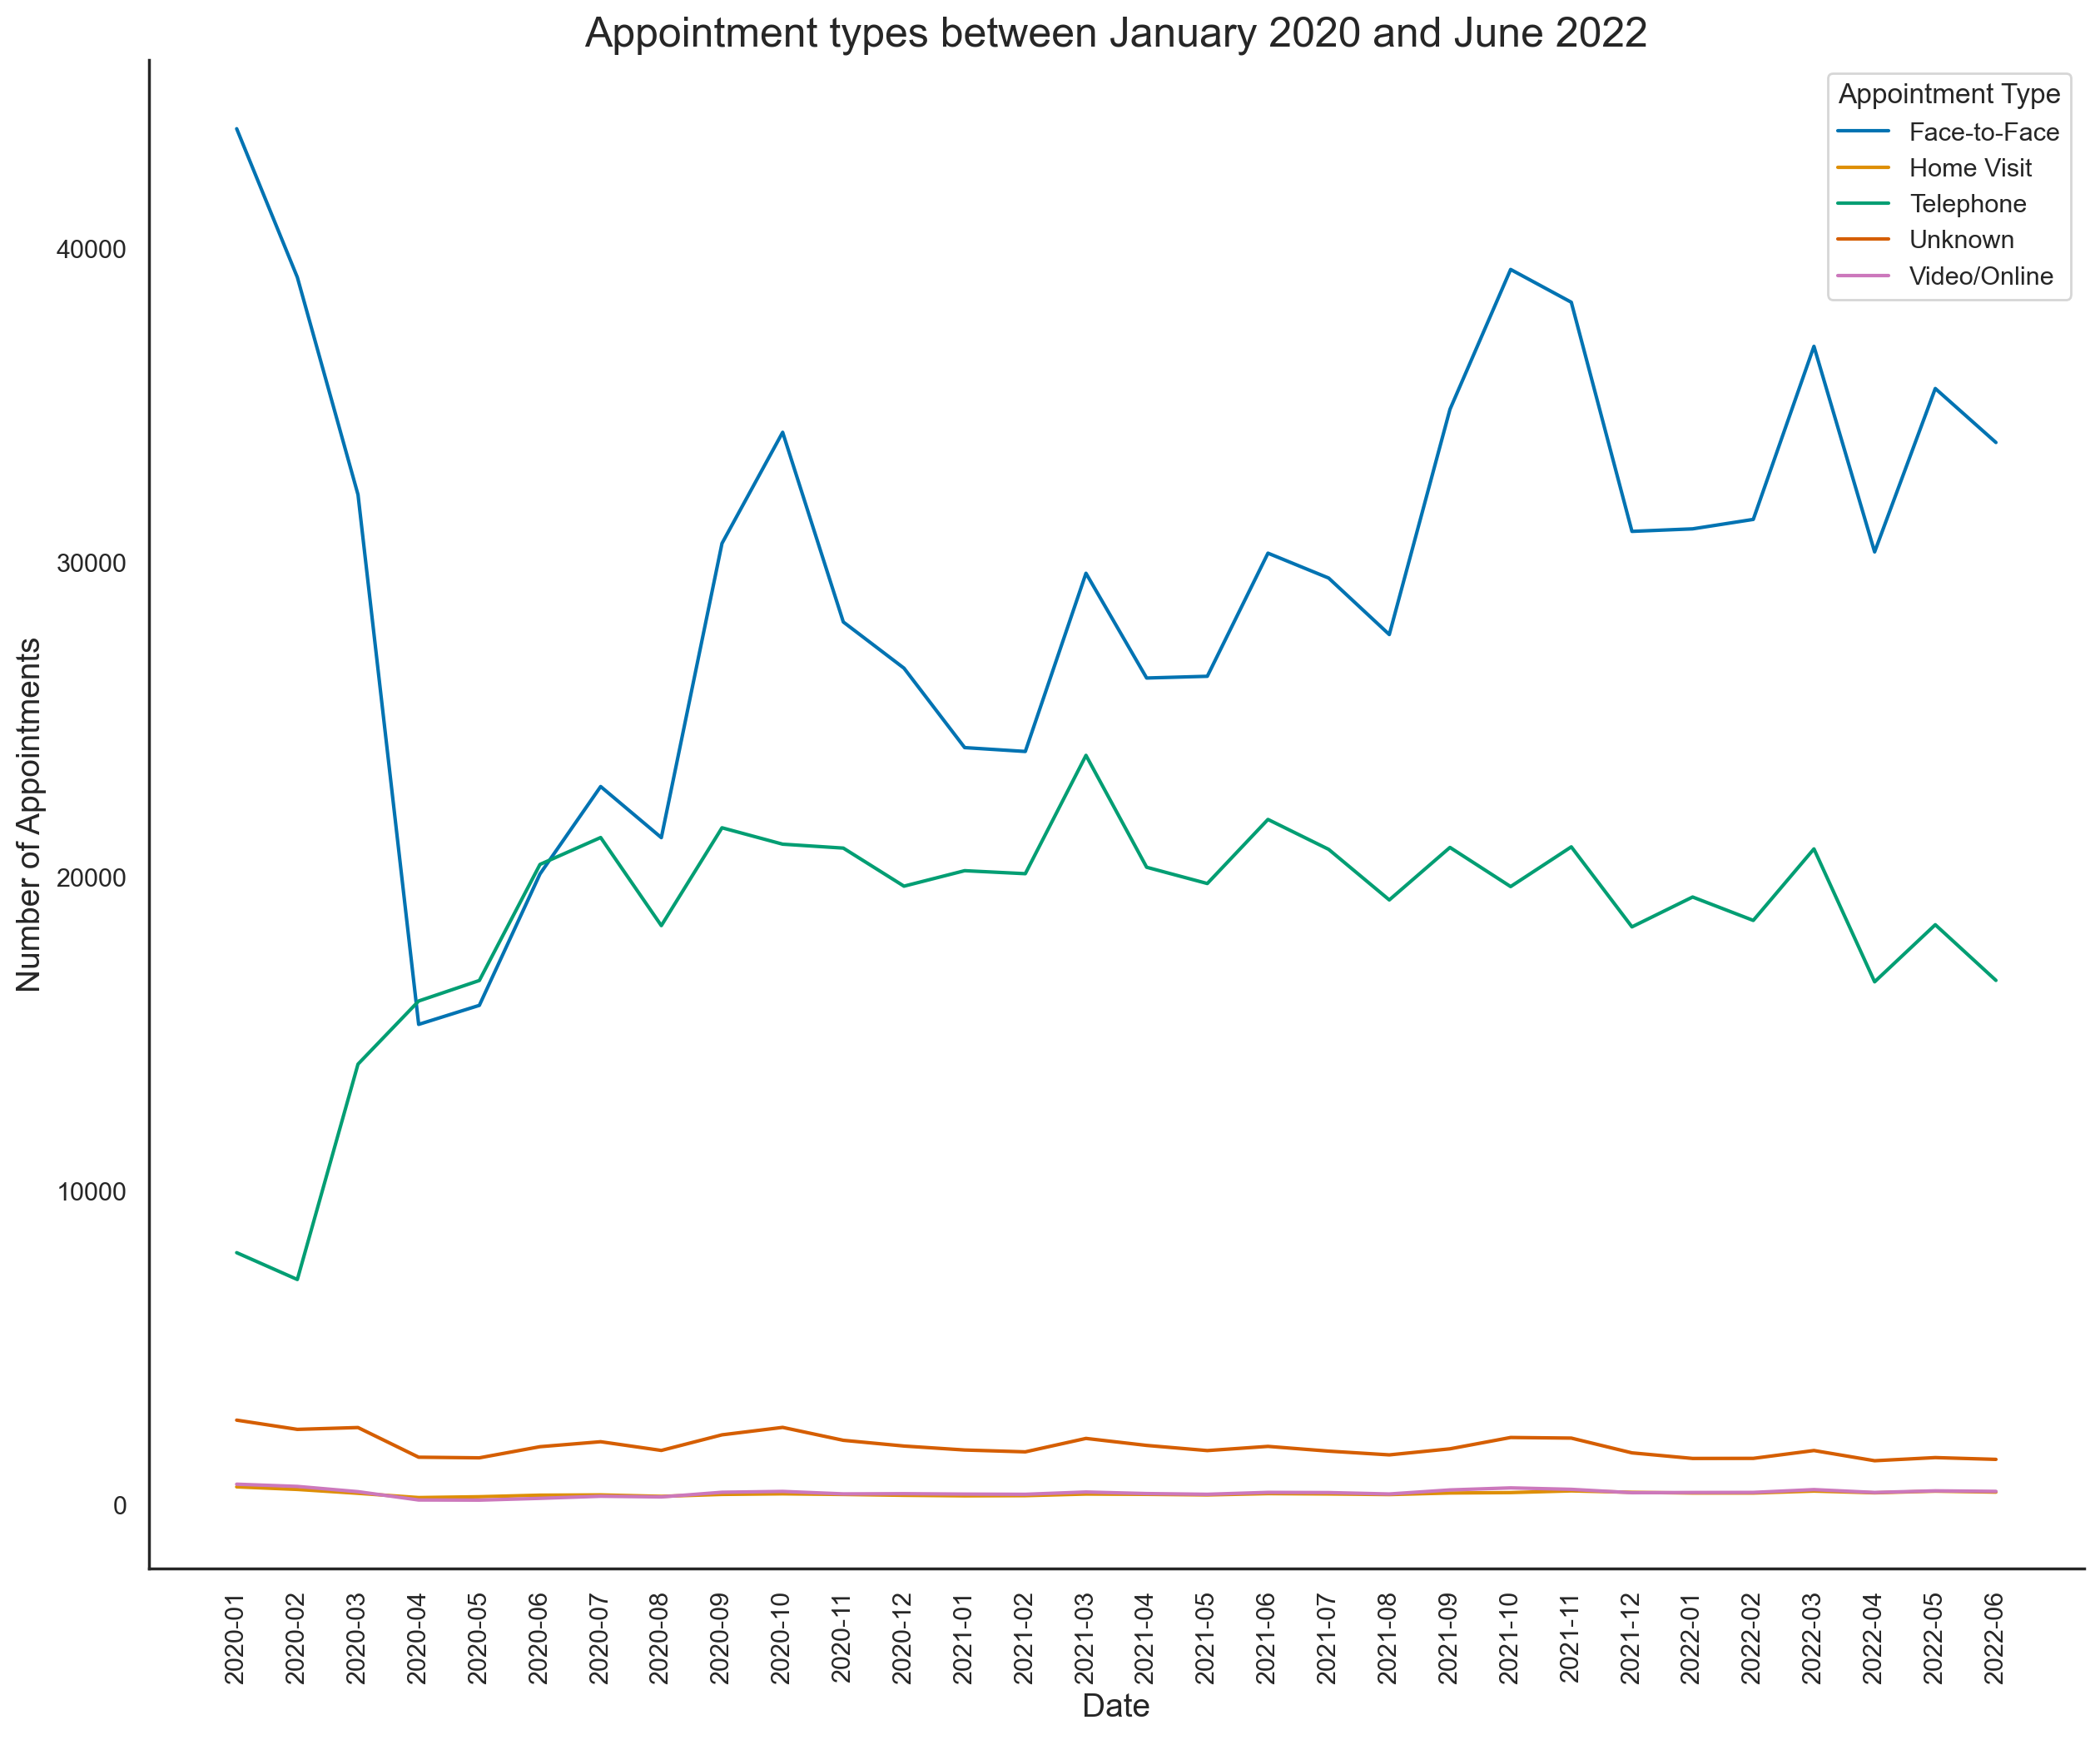

In [81]:
# Create a line plot to answer the question.
fig10, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='appointment_mode', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Appointment types between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig10)

# Edit the legend
plt.legend(loc='upper right', title='Appointment Type')

# View the plot and save an image.
plt.show()
fig10.savefig('Appointment types between January 2020 and June 2022.jpg')

> Face-to-face and telephone appointments are the types most used across this period of time. We can see that face-to-face appointments went down around March-April 2020 due to the start of the Covid-19 pandemic, while telephone appointments went up. Telephone appointments have stabilised at that ratio, so we can assume people will keep using them despite the pandemic being over. Face-to-face appointments have been increasing after the first peak of the pandemic, but despite being over these have not been demanded as much as before the pandemic. However the trend is going up clearly.

### Healthcare professional types
#### Q: how do the healthcare professional types differ over time?    

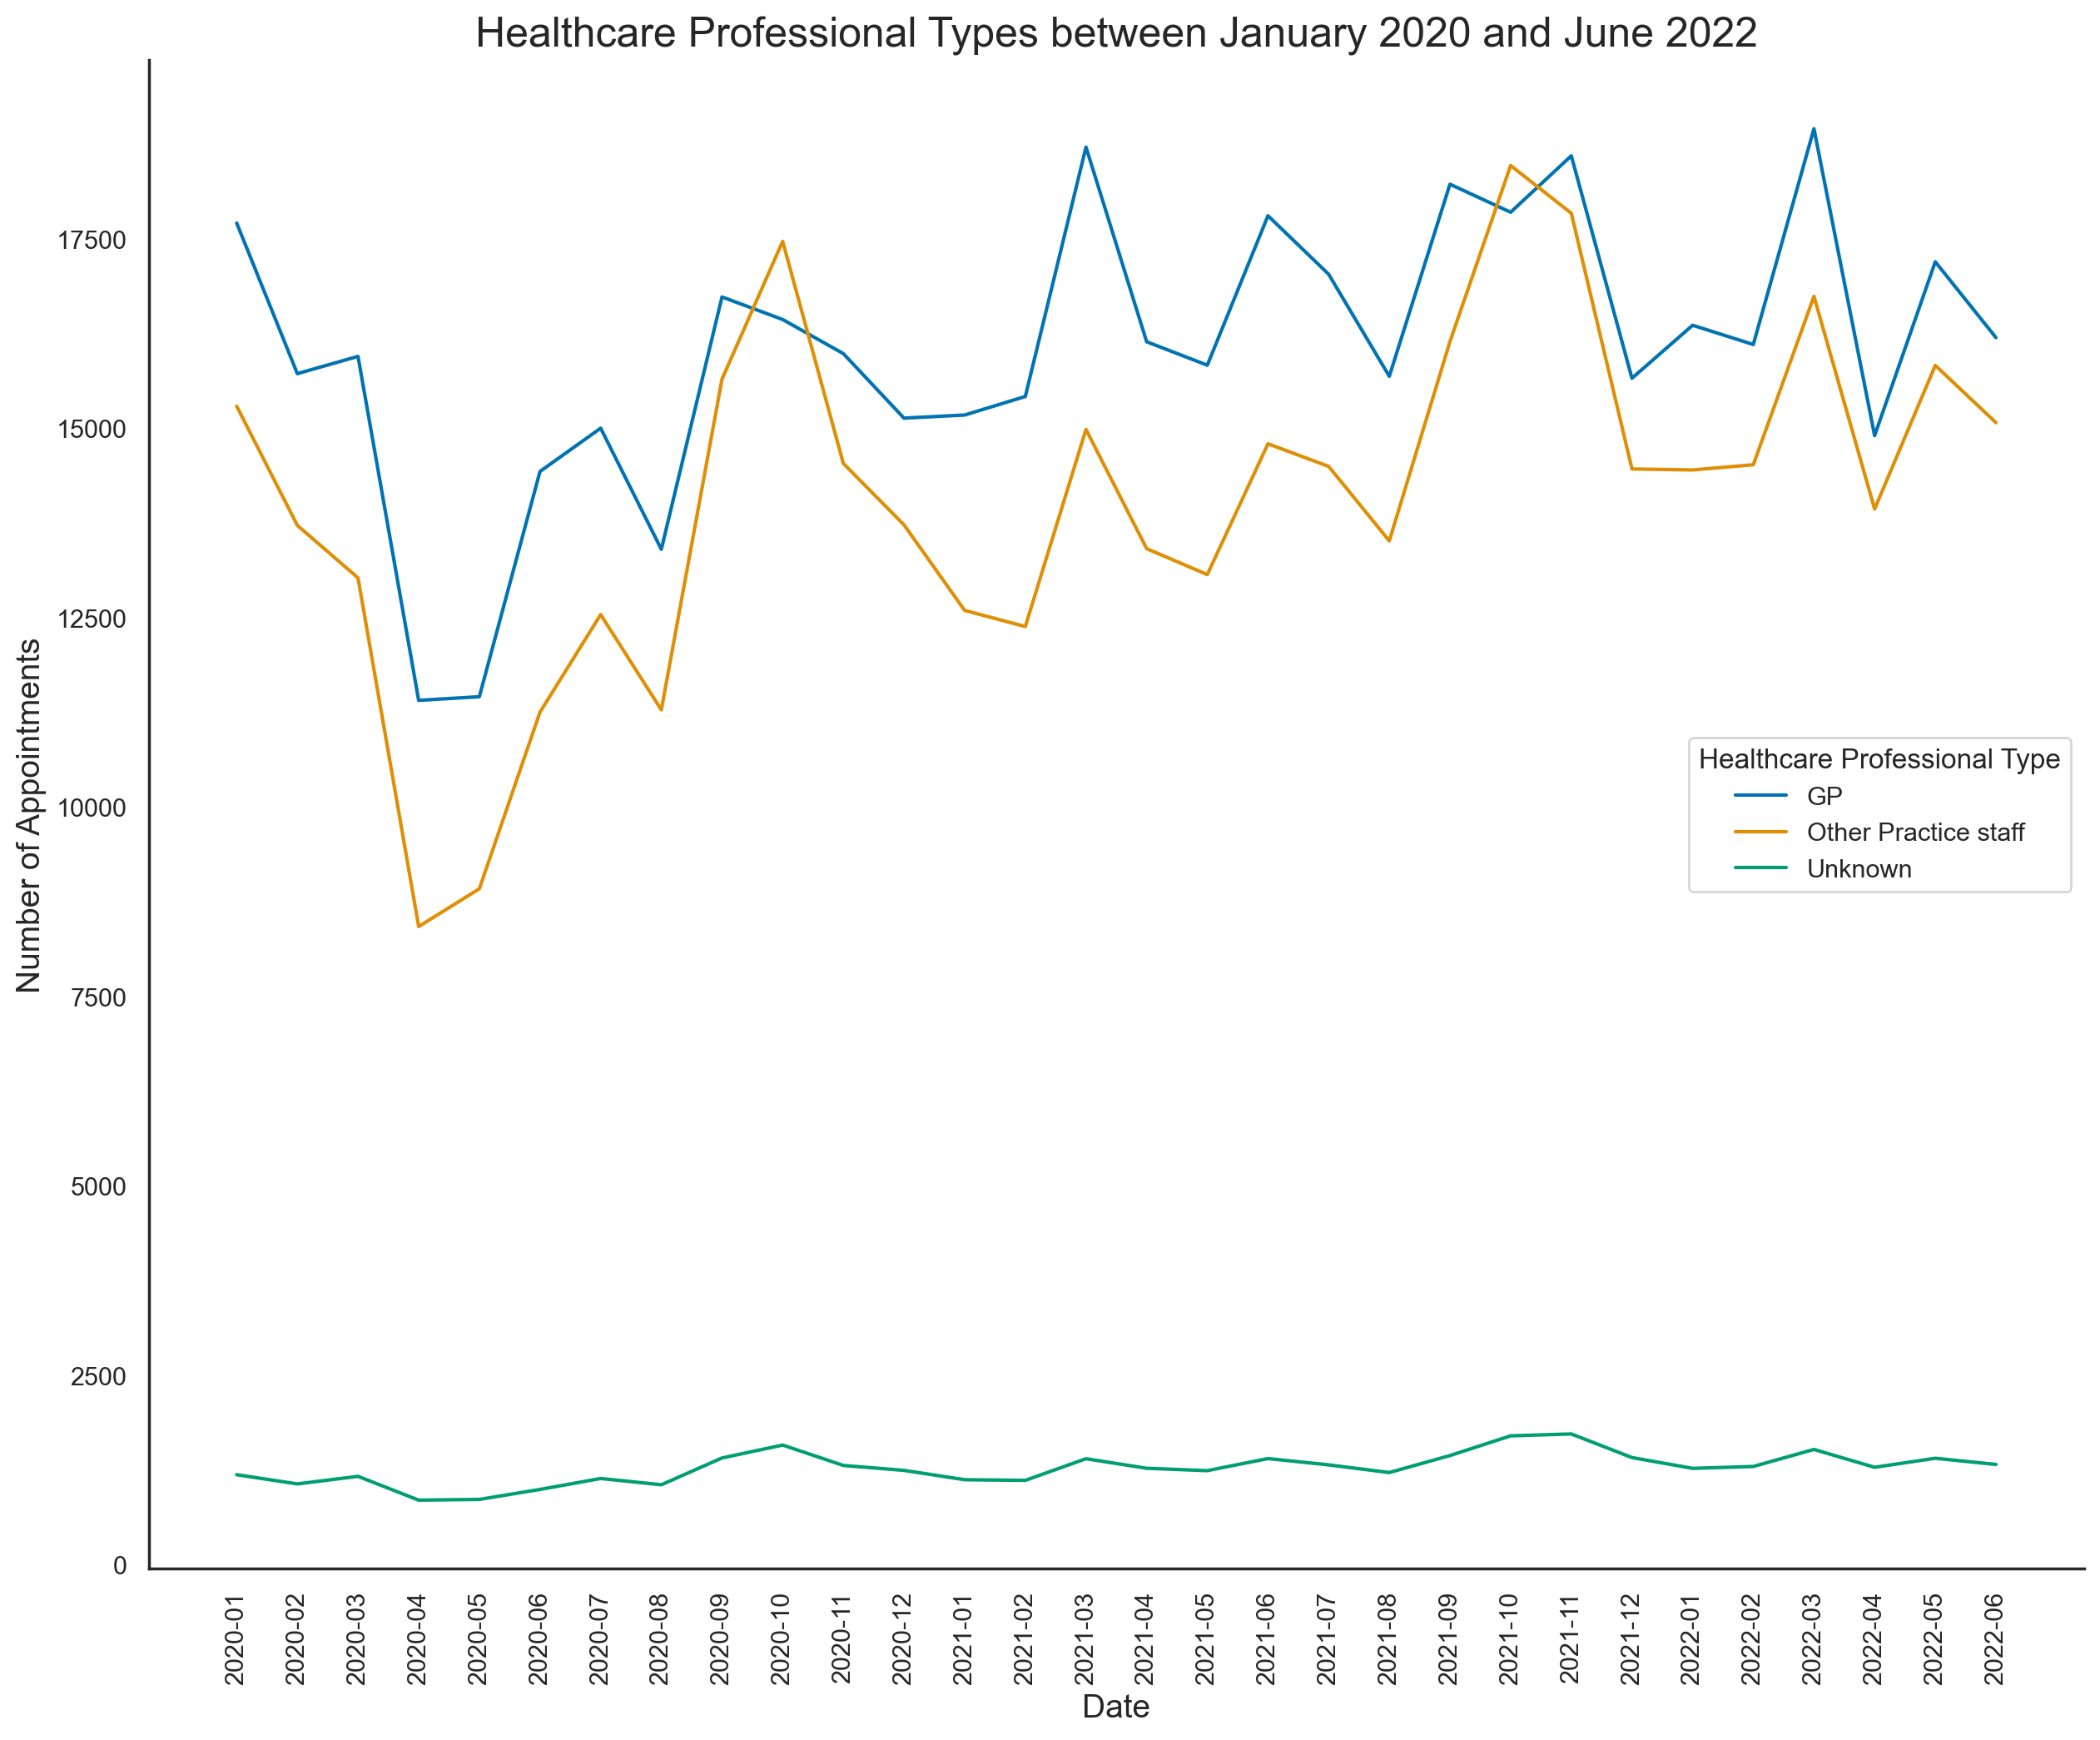

In [82]:
# Create a line plot to answer the question.
fig11, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='hcp_type', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Healthcare Professional Types between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig11)

# Edit the legend
plt.legend(loc='right', title='Healthcare Professional Type')

# View the plot and save an image.
plt.show()
fig11.savefig('Healthcare Professional Types between January 2020 and June 2022.jpg')

### Appointment waiting times
#### Q: is there a pattern on the time from booking to appointment?
#### Q: do patients have to wait long for their appointments?

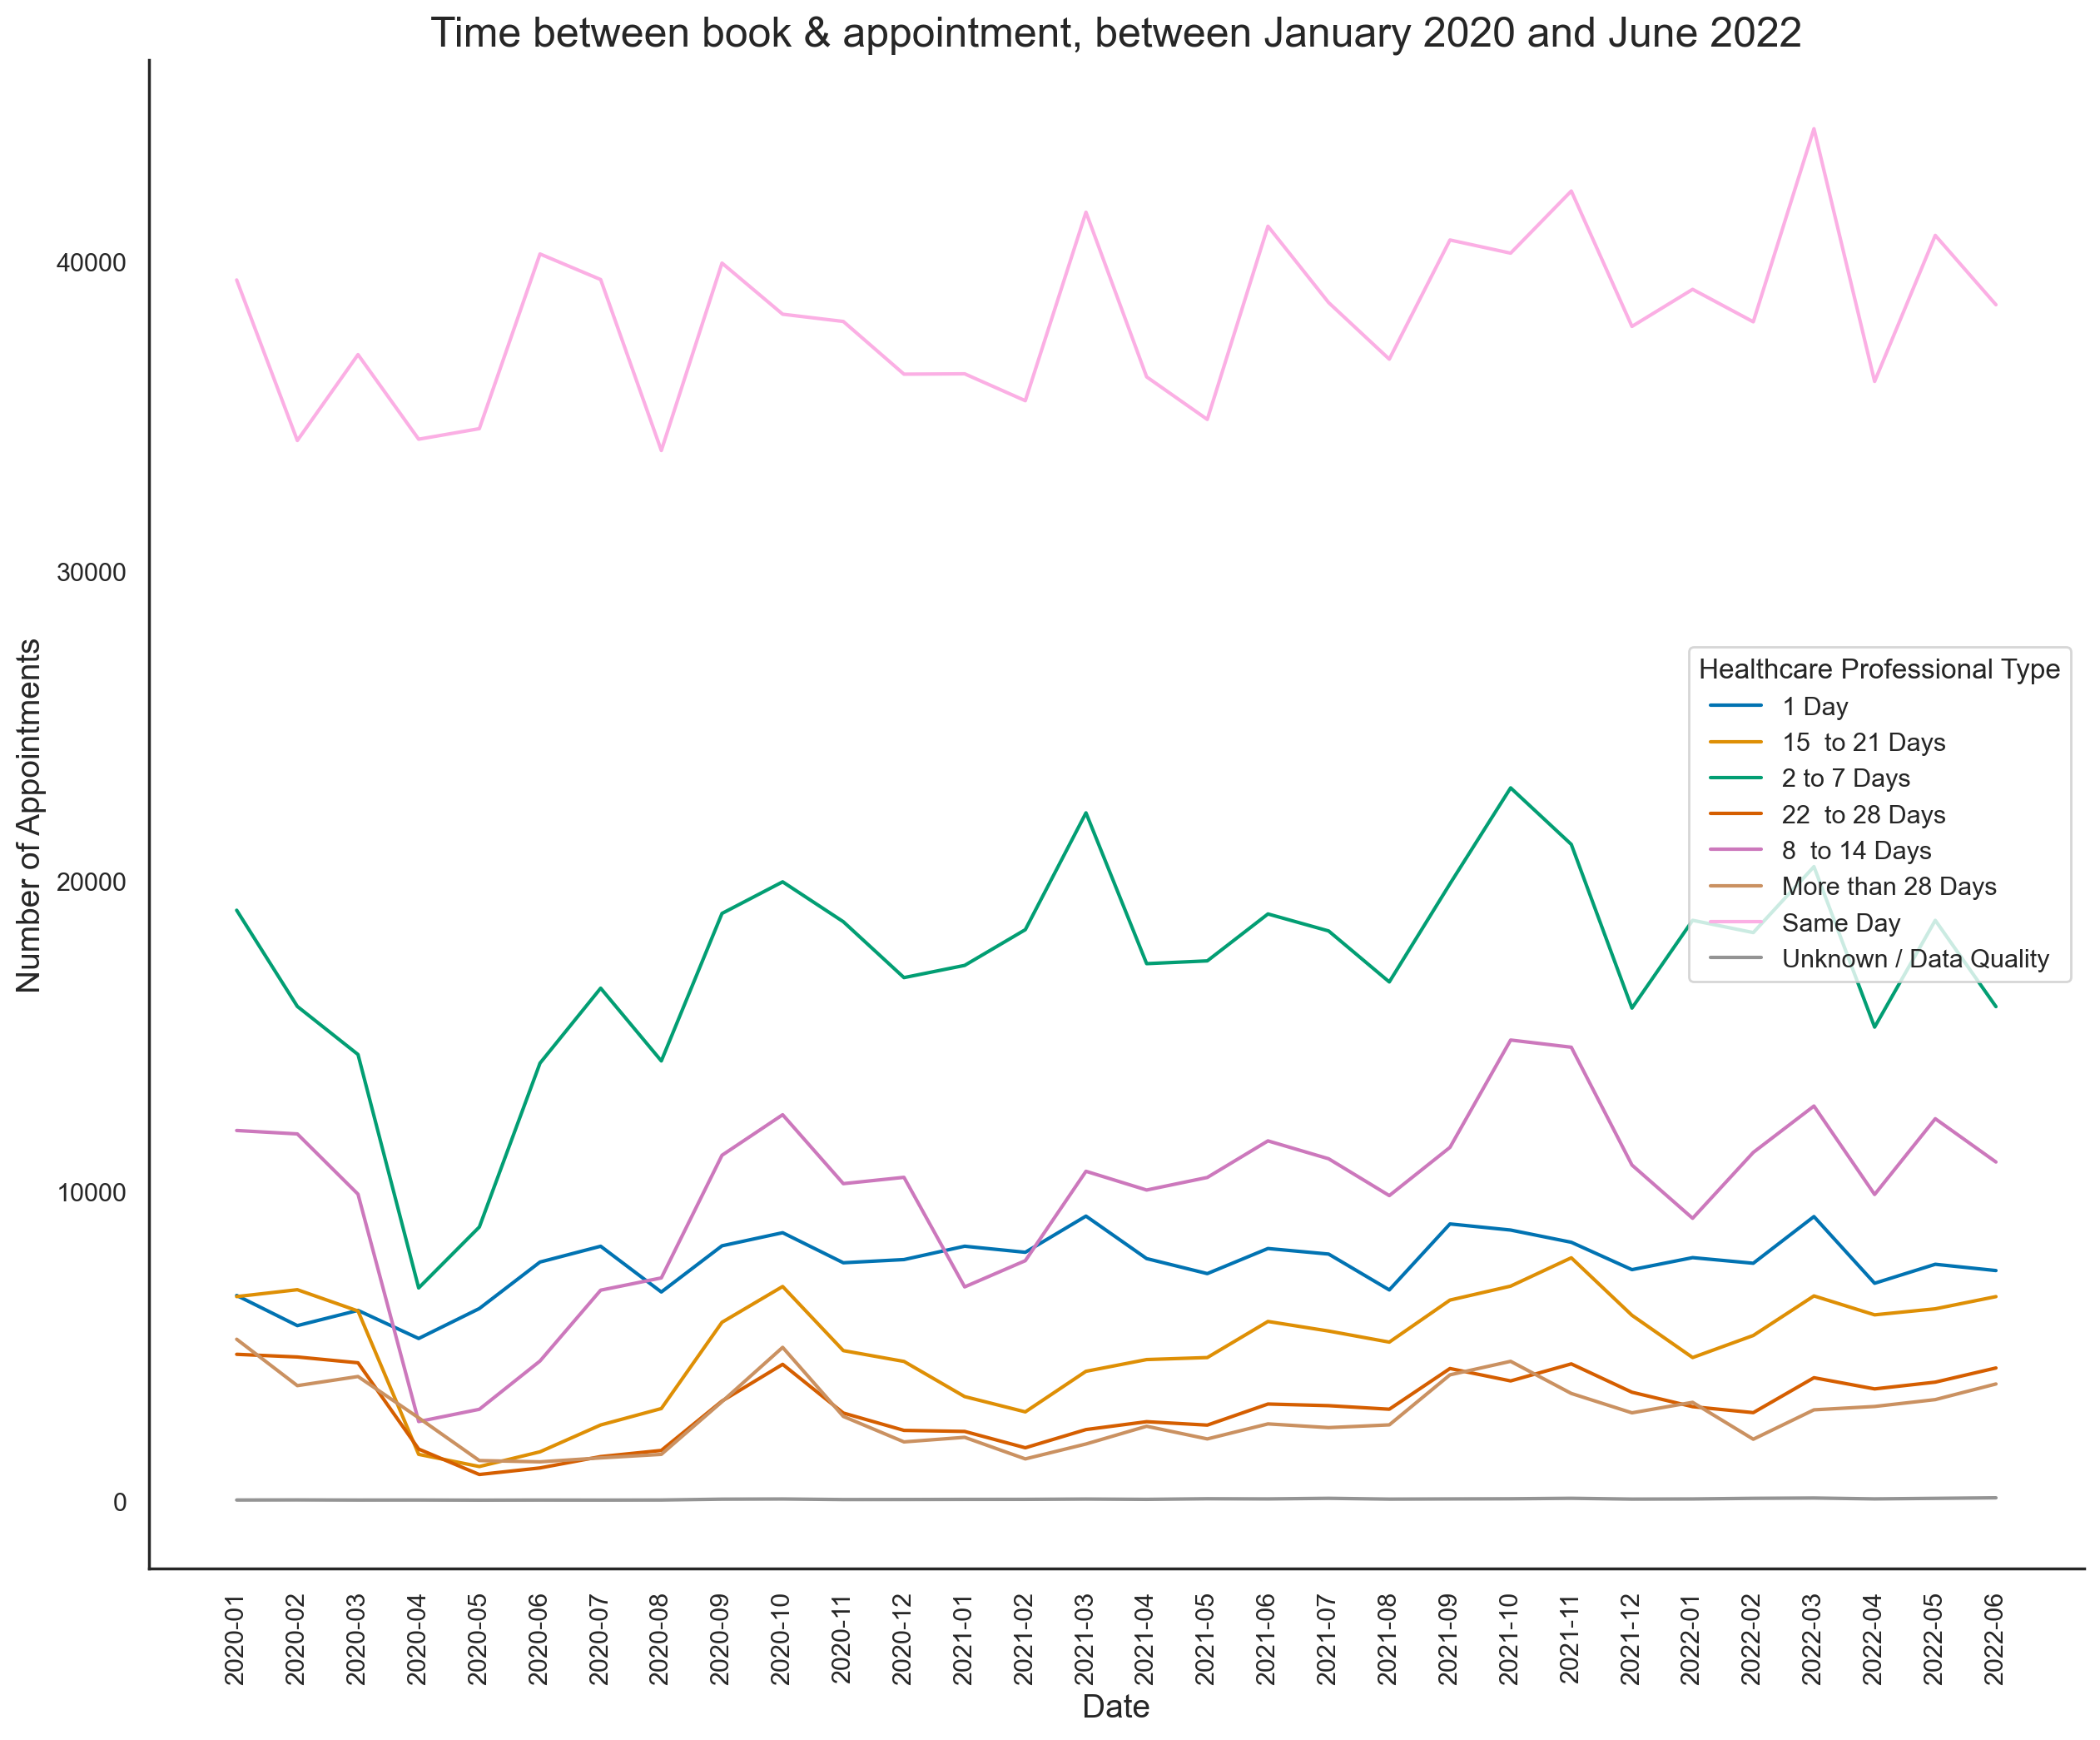

In [83]:
# Create a line plot to answer the question.
fig12, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', 
             hue='time_between_book_and_appointment', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Time between book & appointment, between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig12)

# Edit the legend
plt.legend(loc='right', title='Healthcare Professional Type')

# View the plot and save an image.
plt.show()
fig12.savefig('Time between book & appointment, between January 2020 and June 2022.jpg')

### Appointment status
#### Q: are there significant changes in whether or not visits are attended?

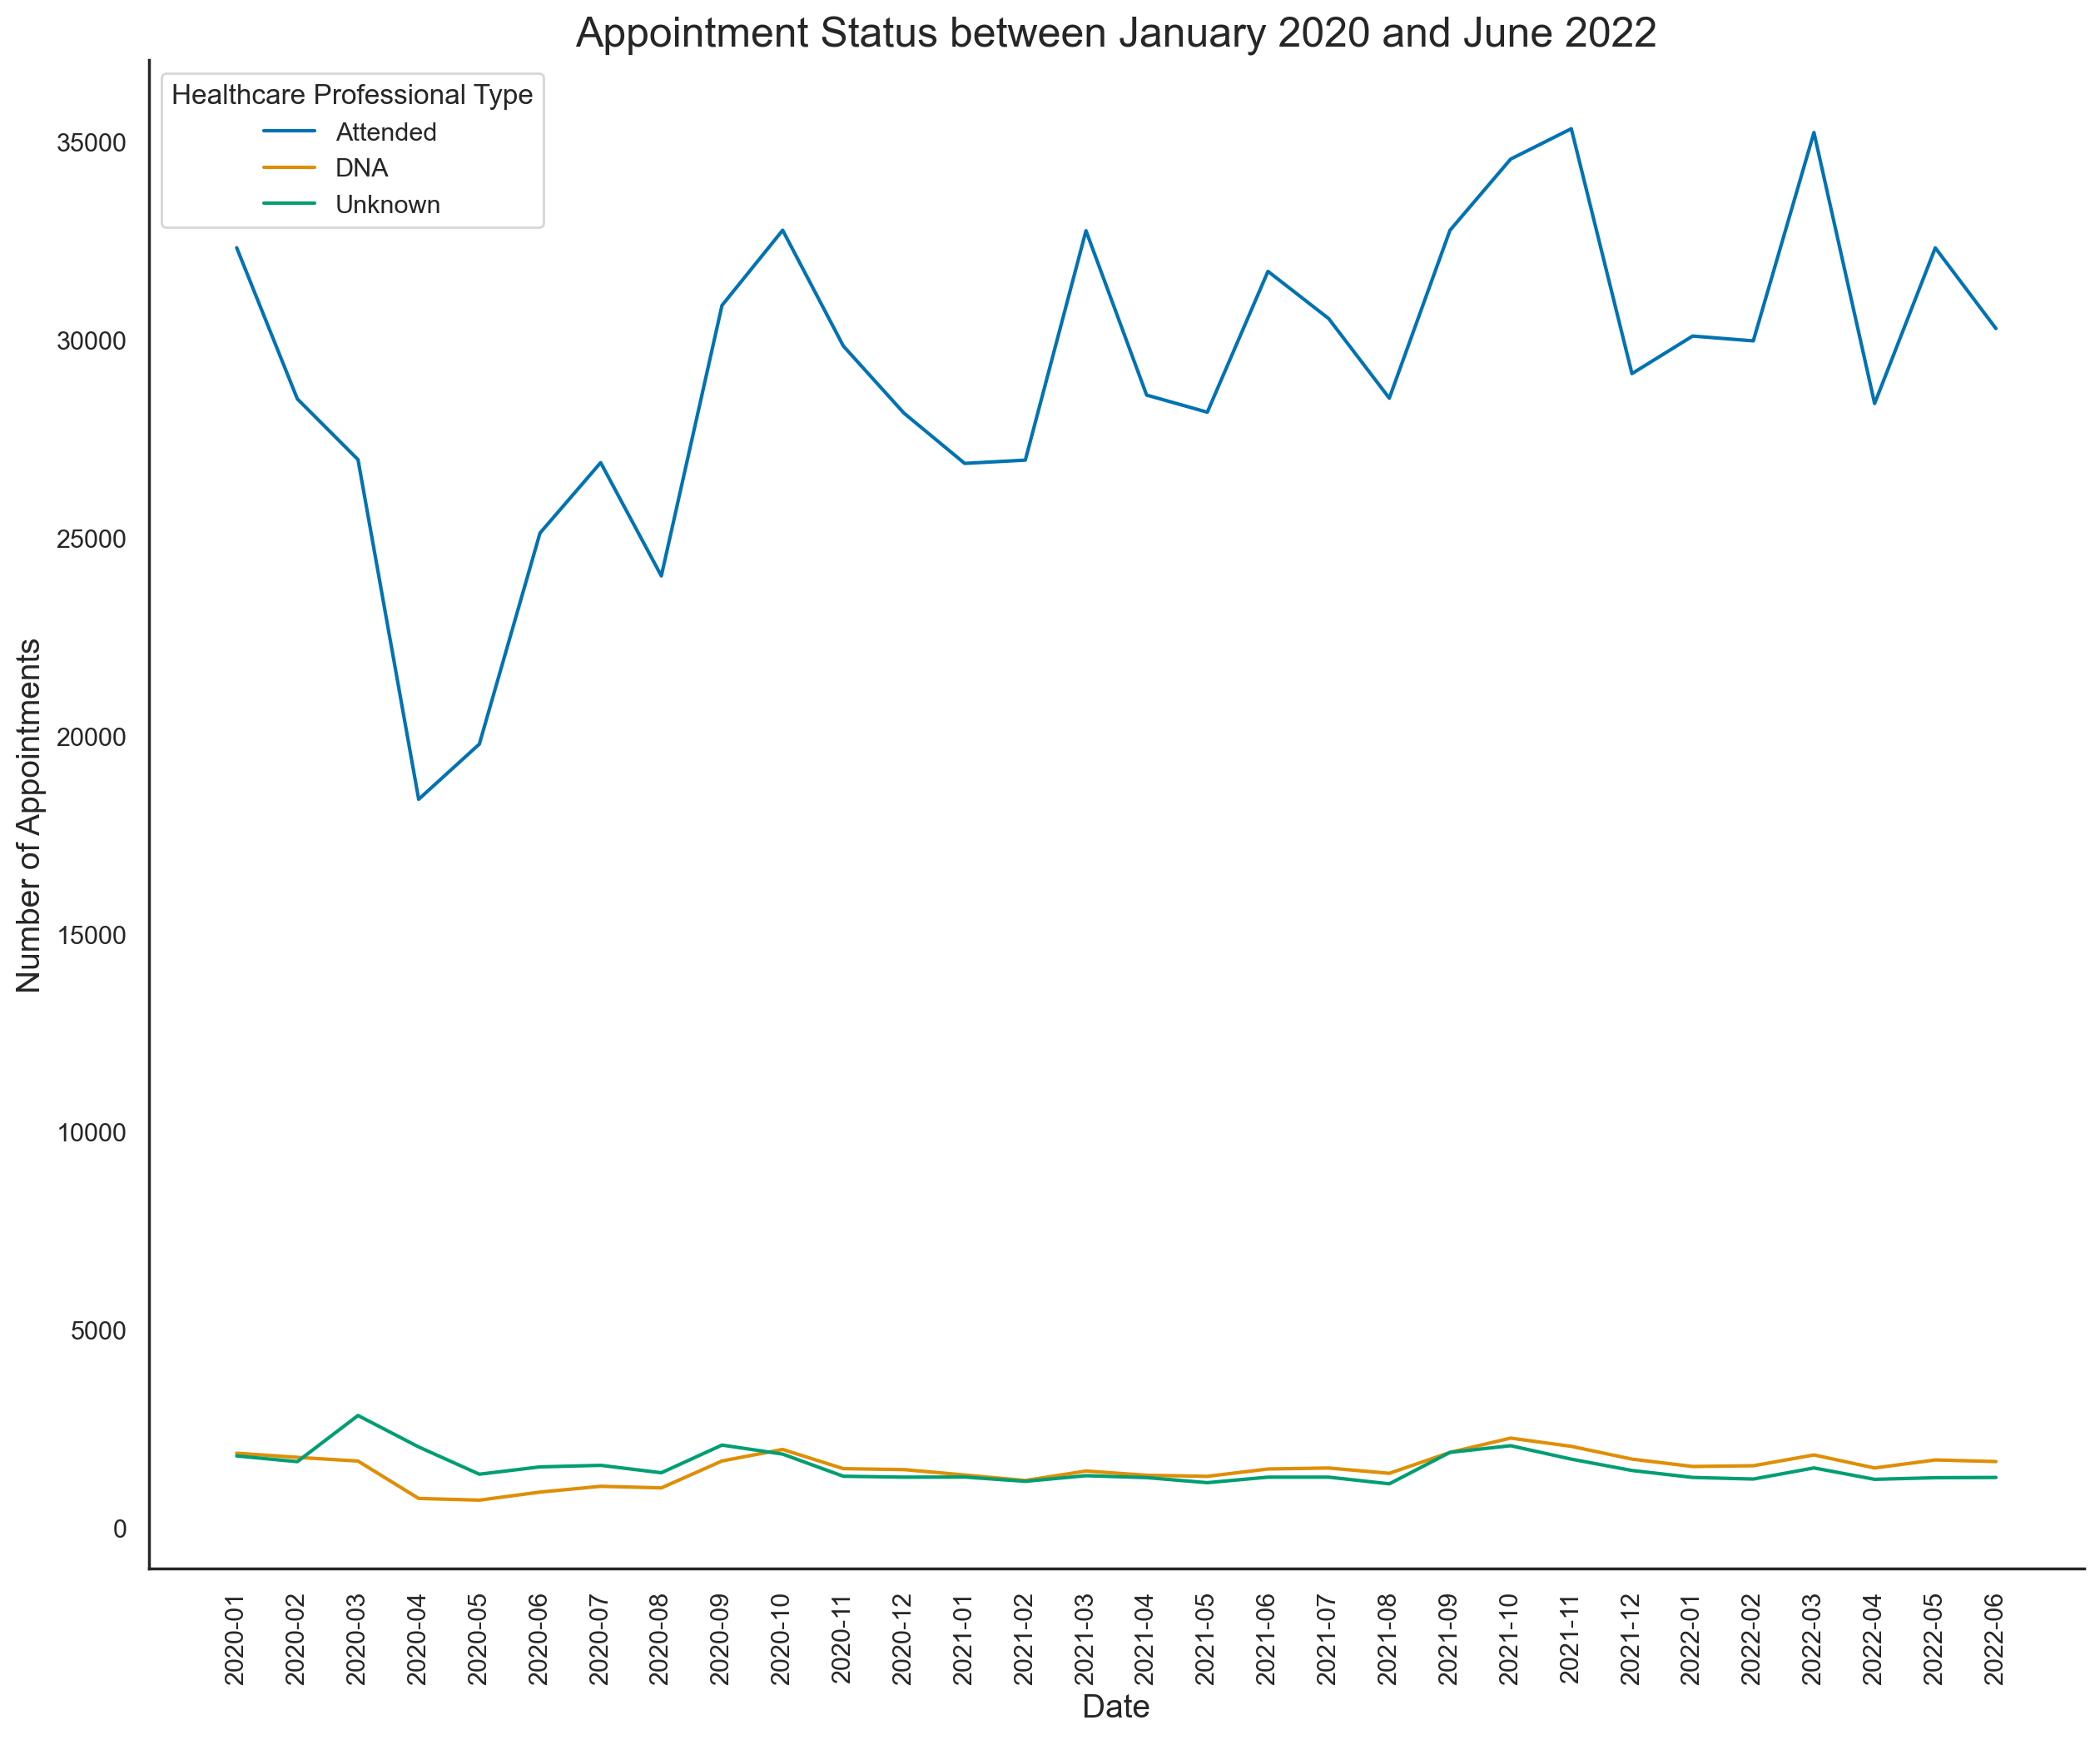

In [84]:
# Create a line plot to answer the question.
fig13, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', 
             hue='appointment_status', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Appointment Status between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig13)

# Edit the legend
plt.legend(loc='upper left', title='Healthcare Professional Type')

# View the plot and save an image.
plt.show()
fig13.savefig('Appointment Status between January 2020 and June 2022.jpg')

> Let's investigate the same question without "Attended" appointments to check for trends in the other two categories

In [85]:
# Create a separate dataset to look into the the appointment status without the attended ones. 
ar_agg_no_attended = ar_agg[ar_agg['appointment_status'] != 'Attended']

# View the output.
ar_agg_no_attended

appointment_month appointment_status hcp_type appointment_mode  \
759             2020-01                DNA       GP     Face-to-Face   
760             2020-01                DNA       GP     Face-to-Face   
761             2020-01                DNA       GP     Face-to-Face   
762             2020-01                DNA       GP     Face-to-Face   
763             2020-01                DNA       GP     Face-to-Face   
...                 ...                ...      ...              ...   
66147           2022-06            Unknown  Unknown          Unknown   
66148           2022-06            Unknown  Unknown          Unknown   
66149           2022-06            Unknown  Unknown          Unknown   
66150           2022-06            Unknown  Unknown          Unknown   
66151           2022-06            Unknown  Unknown     Video/Online   

      time_between_book_and_appointment  \
759                               1 Day   
760                               1 Day   
761                               1 Day   
762                               1 Day   
763                               1 Day   
...                                 ...   
66147            Unknown / Data Quality   
66148            Unknown / Data Quality   
66149            Unknown / Data Quality   
66150            Unknown / Data Quality   
66151                       2 to 7 Days   

                                         Region Name  count_of_appointments  
759             EAST OF ENGLAND COMMISSIONING REGION                   3149  
760                      LONDON COMMISSIONING REGION                   8578  
761                    MIDLANDS COMMISSIONING REGION                   6444  
762    NORTH EAST AND YORKSHIRE COMMISSIONING REGION                   4321  
763                  NORTH WEST COMMISSIONING REGION                   4586  
...                                              ...                    ...  
66147           EAST OF ENGLAND COMMISSIONING REGION                      8  
66148                    LONDON COMMISSIONING REGION                      1  
66149                  MIDLANDS COMMISSIONING REGION                     19  
66150  NORTH EAST AND YORKSHIRE COMMISSIONING REGION                     25  
66151                NORTH WEST COMMISSIONING REGION                      1  

[42967 rows x 7 columns]

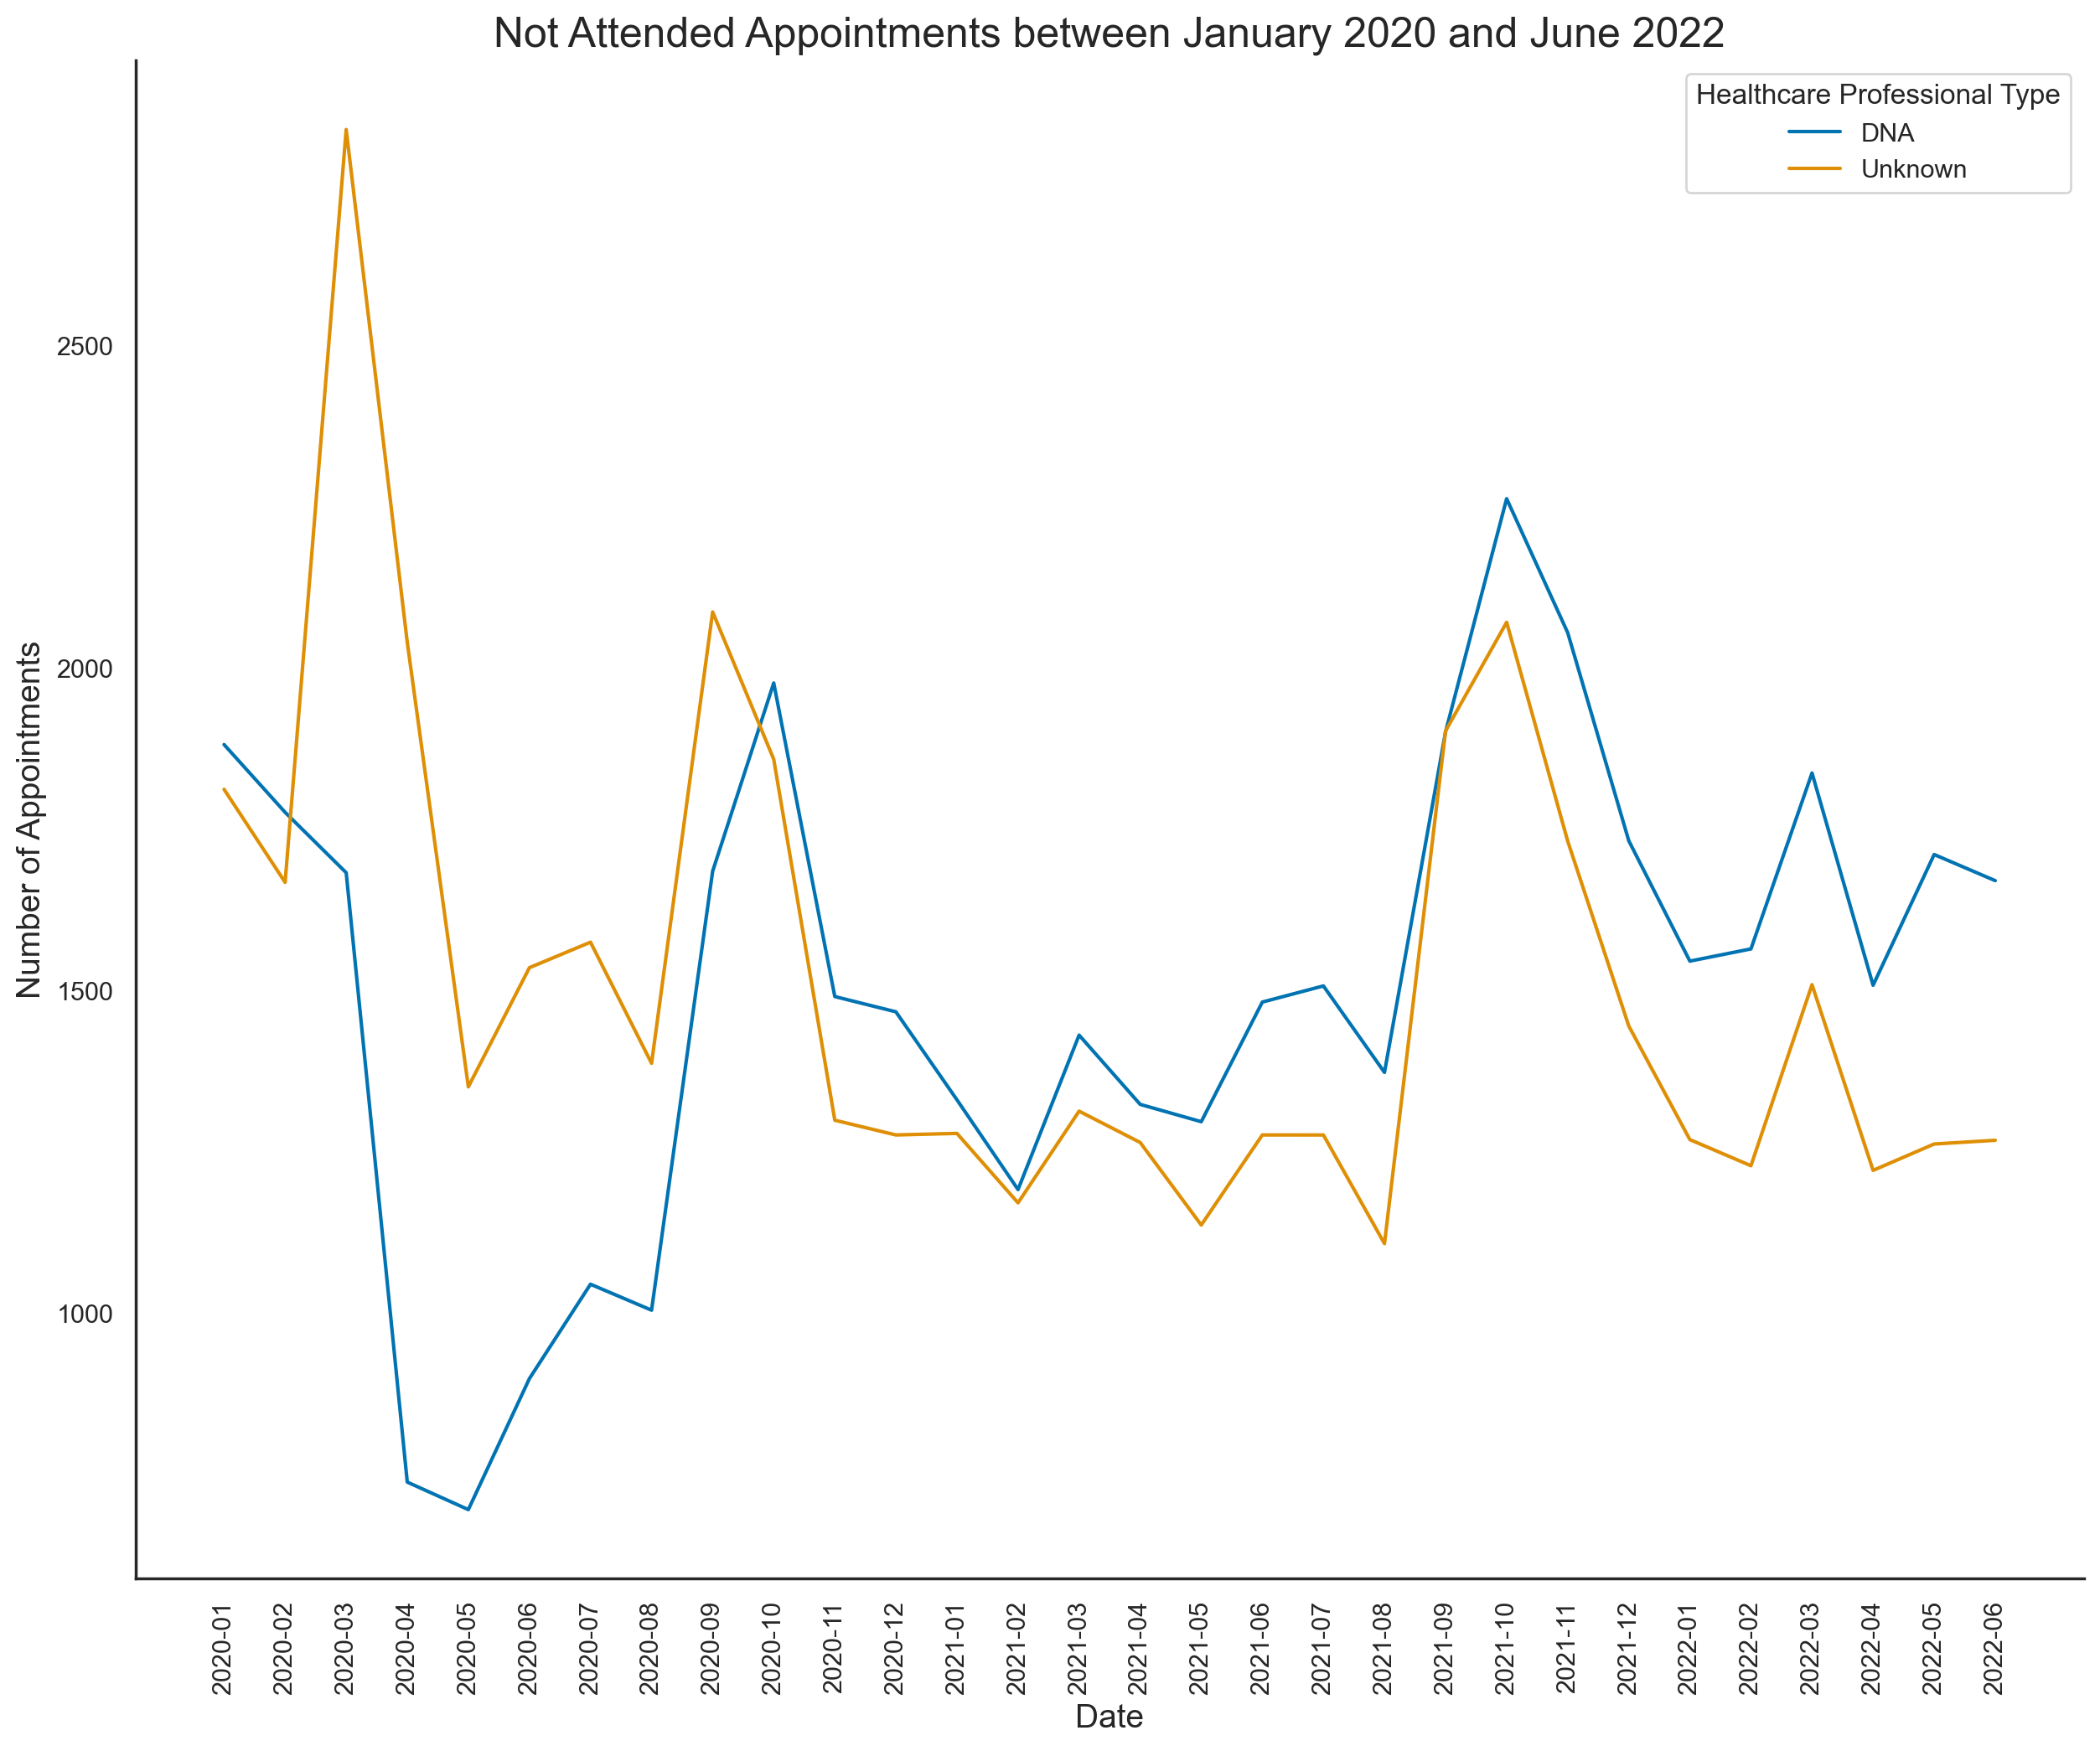

In [86]:
# Create a line plot to answer the question.
fig14, ax = plt.subplots(dpi=200)
sns.lineplot(data=ar_agg_no_attended, x='appointment_month', y='count_of_appointments', 
             hue='appointment_status', ci=None)

# Label axes and add a title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Not Attended Appointments between January 2020 and June 2022', fontsize=18)
plt.xticks(rotation=90)

# Remove the top and right spines from the plot.
sns.despine(fig14)

# Edit the legend
plt.legend(loc='upper right', title='Healthcare Professional Type')

# View the plot and save an image.
plt.show()
fig14.savefig('Not Attended Appointments between January 2020 and June 2022.jpg')

Not attended appointments went down at the beginning of the Covid19 pandemic, and probably the ones registered as unknown went up during the same period as NHS workers were unsure on how to register covid related cases.

# 

## Summary of findings and recommendations based on the analysis.

#### Limitations
- The quality of the data is not accurate and therefore these recommendations are not conclusive and further investigations are recommended.
- Too many unknowns and unmapped values makes the analysis weak. 
- This historical data only covers from January 2020 to June 2022, which is a limitation for the analysis for two reasons:
 - Limited period of time covered
 - Coincides with the Covid19 pandemic, and therefore the data could differ vastly from a normal period of time

#### Insights

Taking into account these quality considerations, we can conclude a few points for each of the main question the NHS posed at the beginning of this exercise.

1. Network Capacity
- GPs are under pressure in terms of number of appointments. Resources need to be better distributed to balance these demands between the service settings and professionals.
- Staff is at full capacity or beyond in certain periods of the year and needs to be reinforced (we have used 22 days per month to get the daily capacity utilisation due to discounting the weekends). These pressures could be affecting at:
 - their capacity to attend patients in a rigorous manner
 - having enough time to look at patient issues properly during appointments: we have discovered most of the appointments over the period of time studied lasted less than 10 minutes, with a percentage of them even less than 5 minutes. This can be another sign of potential staff shortage.
- The busiest NHS commissioning region is Midlands.
- Weekdays are more busy than weekends, while Mondays and Tuesdays are busier than Wednesdays, Thursdays and Fridays. 
 
2. Utilisation & Distribution of Resources
- Face-to-face and telephone appointments are the most used types by patients.
- Too many appointments have a period bigger than 8 days between the booking and the appointment, and this could be another sign of the pressure GPs are under, as well as potential staff shortage.
- October and November are the busiest months of the last two years, and it is when the most not attended appointments happen. More granular data is required to investigate why this is happening.

#### Recommendations
- NHS should start looking at hiring more staff.
- The current staff could be reorganised:
 - by region and
 - by day of the month

#### Possible next steps
- Standardisation of digital resources across the NHS network and staff training recommended to unify data collection.
- Collect patient data related to religion, childcare necessity, etc. (while respecting their privacy) to perform a sentiment analysis to look at potential personal reasons for missing appointments.
- Schedule a session to discuss data assumptions and potential further requirements.

## SOCIAL MEDIA: TWITTER 

### We have been given a dataset containing tweets from Twitter with hashtags related to healthcare in the UK. We will analyse it to see if we can discover any patterns.

In [87]:
# Load the data set.
tweets = pd.read_csv('AnguilVanier_Alejandra_DA201_Assignment_files/tweets.csv') 

# View the DataFrame.
tweets.head()

tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3  1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4  1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   

                                      tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, ...   
4  {'hashtags': [{'text': 'blogs', 'indices': [18...   

                             tweet_entities_hashtags  \
0                                        #Healthcare   
1                            #PremiseHealth, #hiring   
2                                        #Healthcare   
3                                               #NEW   
4  #blogs, #digitaltransformation, #cybersecurity...   

                                      tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 're...                    0   
1  {'iso_language_code': 'en', 'result_type': 're...                    2   
2  {'iso_language_code': 'en', 'result_type': 're...                   39   
3  {'iso_language_code': 'en', 'result_type': 're...                    5   
4  {'iso_language_code': 'en', 'result_type': 're...                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4                     0            False            False         en

In [88]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [89]:
# Explore the data set.
tweets.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [90]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
tags_series = pd.Series(tags)

In [91]:
# Display the first 30 records.
print(tags_series.info())
tags_series.head(30)

<class 'pandas.core.series.Series'>
RangeIndex: 4333 entries, 0 to 4332
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4333 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB
None


0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [92]:
# Convert the series to a DataFrame in preparation for visualisation.
data = tags_series.value_counts().reset_index()

# Rename the columns.
data = data.rename(columns = {'index':'word', 0:'count'})
data

word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]

In [93]:
# Display records where the count is larger than 10.
data2 = data[data['count'] > 10].sort_values('count', ascending=False)
data2

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
9                       #pharma     25
10                   #marketing     25
8                #digitalhealth     25
12                     #biotech     24
13     #competitiveintelligence     24
11                  #medtwitter     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
22                       #covid     16
23        #competitivemarketing     16
21             #womeninmedicine     16
20                 #coronavirus     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
33                      #foamed     13
35                   #education     13
34                 #patientcare     13
32                        #tech     13
31                 #healthcare.     13
30                #telemedicine     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

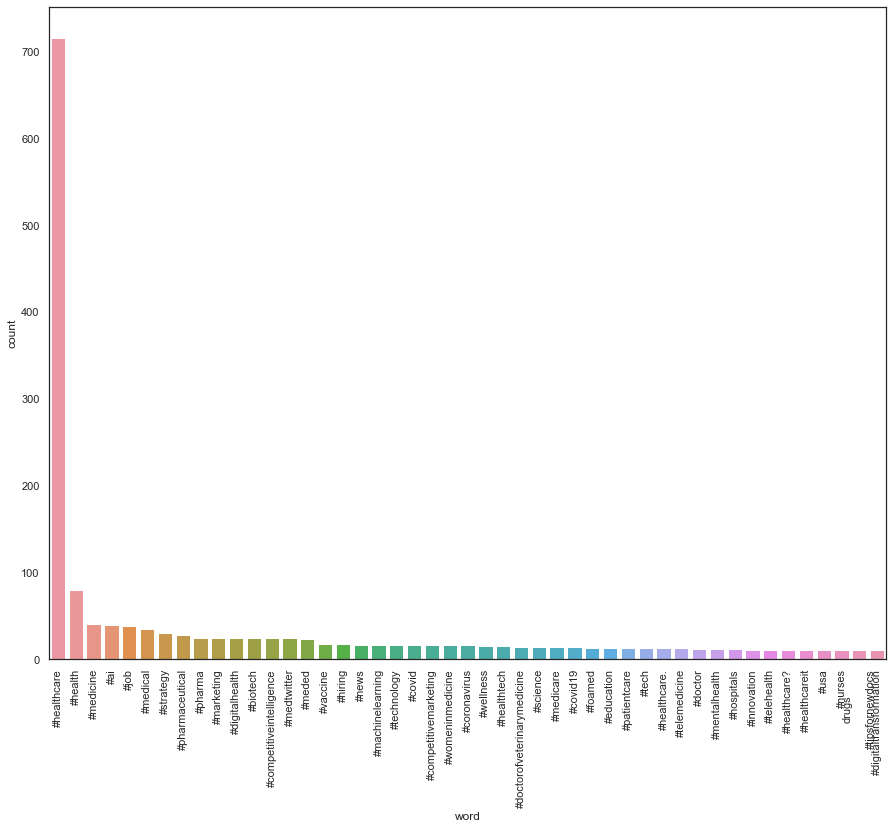

In [94]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(data=data2, x='word', y='count')
plt.xticks(rotation=90)
plt.show()

In [95]:
# Remove any overrepresented hashtags and create a Seaborn barplot displaying the remaining most frequently used hashtags (#).
data3 = data2[data2['word'] != '#healthcare']
data3

word  count
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
9                       #pharma     25
10                   #marketing     25
8                #digitalhealth     25
12                     #biotech     24
13     #competitiveintelligence     24
11                  #medtwitter     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
22                       #covid     16
23        #competitivemarketing     16
21             #womeninmedicine     16
20                 #coronavirus     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
33                      #foamed     13
35                   #education     13
34                 #patientcare     13
32                        #tech     13
31                 #healthcare.     13
30                #telemedicine     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

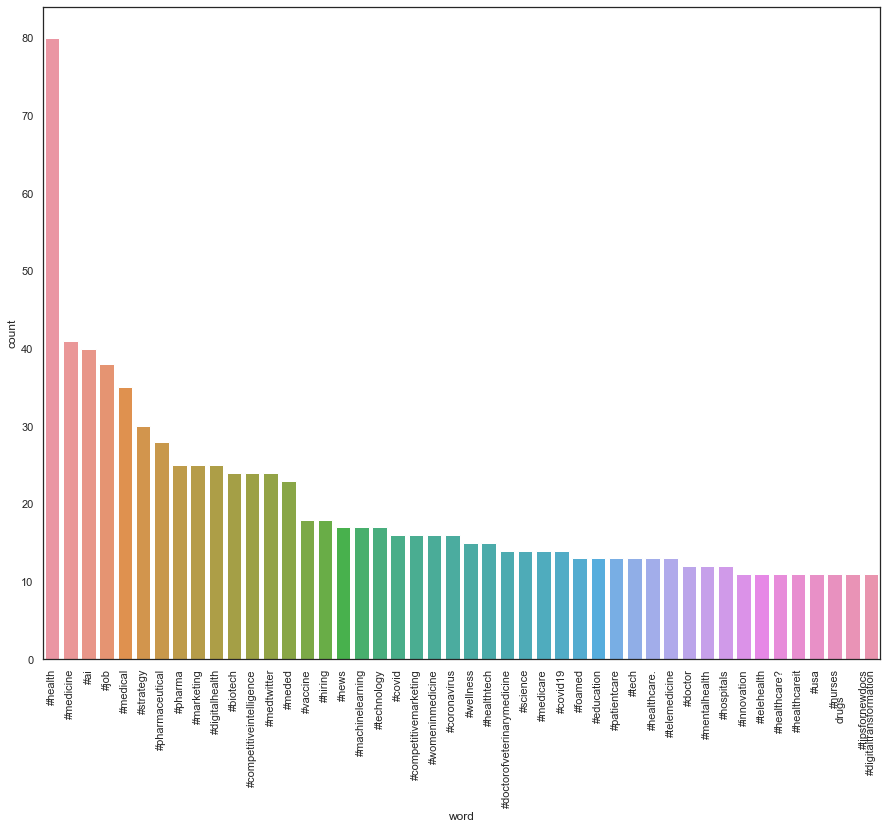

In [96]:
# Create the plot.
sns.barplot(data=data3, x='word', y='count')
plt.xticks(rotation=90)

# View the barplot.
plt.show()

> Let's explore how we can improve the visualisation by grouping similar themes to create a barplot with less bars that hopefully will be more informative. As we only have 46 topics, we could create a new dataframe by themes:

<img align="centre" width="800" height="800" src="AnguilVanier_Alejandra_DA201_Assignment_Hashtags Groups.png">

In [97]:
# Create a DataFrame with the new twitter groups as per the above.
grouped_data = pd.DataFrame({'Word':['Health', 'Medicine', 'Jobs', 'Tech', 'Pharma', 'Covid19', 'Health&Tech',  'News', 'USA'],
                             'Count':[201, 193, 178, 109, 64, 64, 64, 17, 11]},
                           index=[1, 2, 3, 4, 5, 6, 7, 8, 9])

# View the output
grouped_data

Word  Count
1       Health    201
2     Medicine    193
3         Jobs    178
4         Tech    109
5       Pharma     64
6      Covid19     64
7  Health&Tech     64
8         News     17
9          USA     11

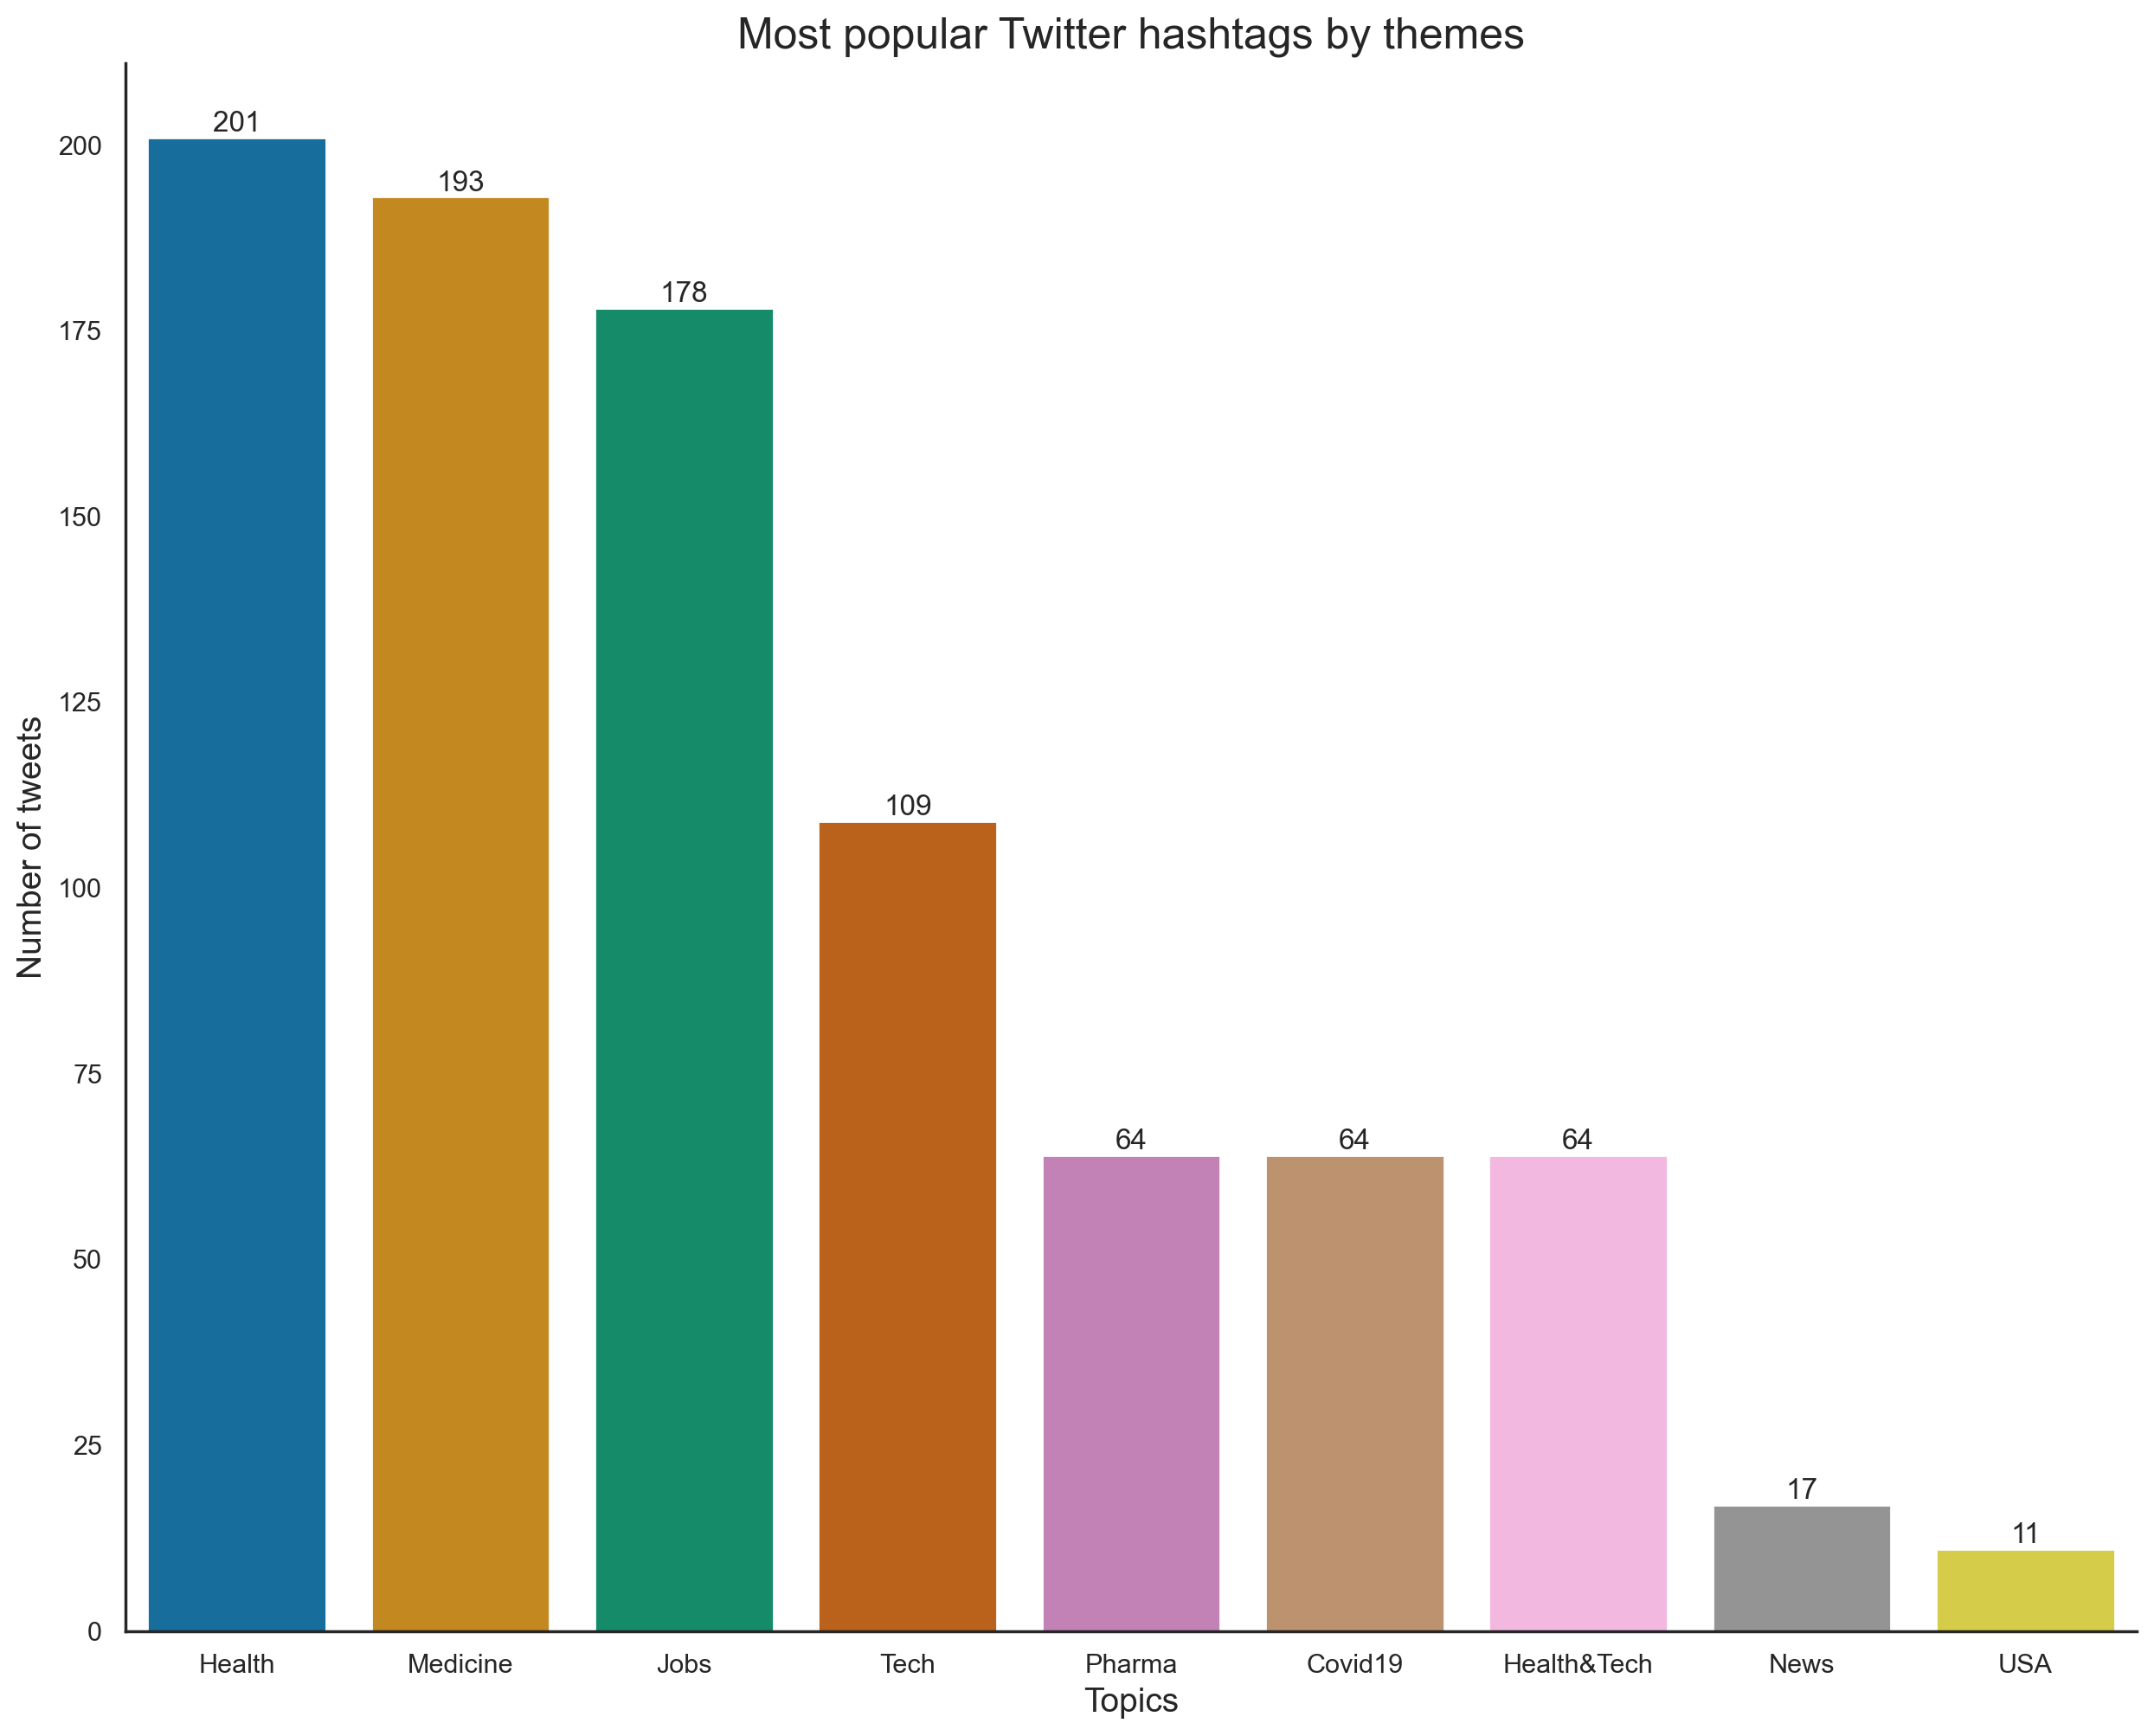

In [98]:
# Create a plot with the new grouped data.
fig15, ax = plt.subplots(dpi=200)
grouped_data_plot = sns.barplot(data=grouped_data, x='Word', y='Count')

# Label axes and add a title
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
plt.title('Most popular Twitter hashtags by themes', fontsize=18)

# Add a value to each bar.
grouped_data_plot.bar_label(grouped_data_plot.containers[0], label_type='edge')

# Remove the top and right spines from the plot.
sns.despine(fig15)

# View the barplot.
plt.show()
fig15.savefig('Most popular Twitter hashtags by themes.jpg')

> Here we can see the most used hashtags by groups. However, we believe this data is biased as all # are about healthcare and therefore we can't be sure how healthcare topics are more or less popular than others. 
> It is recommended that a more comprehensive collection of social media data is carried out to be able to draw more accurate conclusions.

# 